<div class="alert alert-block alert-info">
<h1>Machine Learning Project 2023/2024 </h1>
<h2>Examining Hospital Readmissions </h2>
<br>
<h3>GROUP 11</h3>


</div>


| Student Name         | Student Number |
| :-                   | :-             |
| Alexandre Spagnol    | 20230434       |
| Ana Rita Silva       | 20230444       |
| Guilherme Moreira    | 20230538       |
| José Marçal          | 20201581       |
| Ugochukwu Onyeri     | 20230817       |

# The Problem

Hospital readmissions represent a significant challenge in the healthcare sector, both as an indicator of care quality and a driver of escalating costs.  
When a patient is re-admitted to the hospital within a short period after discharge, it not only indicates potential gaps in care but also adds to the financial burden on the healthcare system.  
In particular, readmissions of diabetic patients have been noted to contribute significantly to these costs.  
Therefore, being able to predict such readmissions can lead to improved patient care and substantial cost savings.

# The Goal

The goal of your project is two-fold:  
- **Binary Classification:** Create a classification model that can accurately predict if a patient will be readmitted to the hospital within 30 days of being discharged. A robust prediction can enable healthcare providers to implement preventive measures and provide timely intervention, potentially saving millions of dollars in healthcare costs.  

- **Multiclass Classification:** The second objective is to develop a multiclass classifier that predicts the timeframe of a patient’s readmission, with the classes being “No”, “<30 days”, “>30 days”. This model can provide more nuanced insights into patient risk levels and help hospitals tailor their post-discharge care and follow-up procedures accordingly.

# Understanding the Data

| Column                                 | Description                                                                                              |
|----------------------------------------|----------------------------------------------------------------------------------------------------------|
| encounter_id                           | Unique identifier of the encounter                                                                       |
| country                                | Country                                                                                                  |
| patient_id                             | Identifier of the patient                                                                               |
| race                                   | Patient’s race                                                                                          |
| gender                                 | Patient’s gender                                                                                        |
| age                                    | Patient’s age bracket                                                                                   |
| weight                                 | Patient’s weight                                                                                        |
| payer_code                             | Code of the health insurance provider (if there is one)                                                |
| outpatient_visits_in_previous_year    | Number of outpatient visits in the year preceding the encounter                                          |
| emergency_visits_in_previous_year      | Number of emergency visits in the year preceding the encounter                                            |
| inpatient_visits_in_previous_year      | Number of inpatient visits in the year preceding the encounter                                           |
| admission_type                         | Type of admission of the patient                                                                        |
| medical_specialty                      | Medical specialty on which the patient was admitted                                                      |
| average_pulse_bpm                      | Average pulse of the patient during their stay in the hospital in beats per minute                         |
| discharge_disposition                  | Destination given to the patient after being discharged                                                 |
| admission_source                       | Source of the patient before being admitted in the current encounter                                     |
| length_of_stay_in_hospital              | Number of days between admission and discharge                                                           |
| number_lab_tests                       | Number of lab tests performed during the encounter                                                       |
| non_lab_procedures                     | Number of non-lab procedures performed during the encounter                                              |
| number_of_medications                  | Number of distinct types of medication administered during the encounter                                 |
| primary_diagnosis                      | Primary diagnosis (coded as first three digits of ICD9)                                                  |
| secondary_diagnosis                    | Secondary diagnosis (first three digits of ICD9)                                                          |
| additional_diagnosis                   | Additional secondary diagnosis (first three digits of ICD9)                                              |
| number_diagnoses                       | Number of diagnoses entered into the system                                                              |
| glucose_test_result                    | Range of the glucose test results or if the test was not taken                                           |
| a1c_test_result                        | Range of the A1C test results or if the test was not taken                                               |
| change_in_meds_during_hospitalization  | Indicates if there was a change in diabetic medications during hospitalization                            |
| prescribed_diabetes_meds               | Yes if the patient has diabetes medication prescribed, No otherwise                                      |
| medication                             | List containing all generic names for the medications prescribed to the patient during the encounter     |
| readmitted_binary                      | Binary target: Yes if the patient was readmitted in less than 30 days, No otherwise                       |
| readmitted_multiclass                  | Multiclass target: “<30 days” if patient was readmitted in less than 30 days after being discharged. “>30 days if patient was readmitted to the hospital but only after more than 30 days after the current discharge. No otherwise. |


Notebook takes around 2 minutes to run.

# Initial Setup

## Import Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import time
import graphviz
import pydotplus
sns.set()
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.svm import SVC, NuSVC
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, multilabel_confusion_matrix, roc_auc_score, recall_score, precision_score, balanced_accuracy_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, OneSidedSelection, NearMiss
from imblearn.combine import SMOTETomek
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [133]:
train = pd.read_csv('train.csv', delimiter = ',')

In [134]:
test = pd.read_csv('test.csv', delimiter = ',')

# Data Exploration

## General Information

In [135]:
#train.shape

(71236, 31)

In [136]:
#test.shape

(30530, 29)

In [137]:
#train.head()

encounter_id country  patient_id             race  gender      age weight  \
0        533253     USA       70110        Caucasian  Female  [70-80)      ?   
1        426224     USA    29775006  AfricanAmerican    Male  [50-60)      ?   
2        634063     USA    80729253        Caucasian  Female  [60-70)      ?   
3        890610     USA     2919042  AfricanAmerican    Male  [60-70)      ?   
4        654194     USA    84871971        Caucasian  Female  [70-80)      ?   

  payer_code  outpatient_visits_in_previous_year  \
0          ?                                   0   
1          ?                                   0   
2          ?                                   0   
3         MC                                   0   
4         HM                                   1   

   emergency_visits_in_previous_year  ...  secondary_diagnosis  \
0                                  0  ...                  276   
1                                  0  ...                  785   
2                                  0  ...                  135   
3                                  0  ...                  562   
4                                  0  ...                  599   

  additional_diagnosis number_diagnoses  glucose_test_result a1c_test_result  \
0                  466                8                  NaN             NaN   
1                  162                9                  NaN             NaN   
2                  250                6                  NaN             NaN   
3                  455                5                  NaN             NaN   
4                  428                9                  NaN             NaN   

  change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
0                                    No                        No   
1                                    No                       Yes   
2                                    Ch                       Yes   
3                                    No                        No   
4                                    No                        No   

                   medication  readmitted_binary  readmitted_multiclass  
0                          []                 No               >30 days  
1                 ['insulin']                 No                     No  
2  ['glimepiride', 'insulin']                 No                     No  
3                          []                 No                     No  
4                          []                 No               >30 days  

[5 rows x 31 columns]

In [138]:
#test.head()

encounter_id country  patient_id             race gender      age weight  \
0        499502     USA   103232799        Caucasian   Male  [80-90)      ?   
1        447319     USA    93395304        Caucasian   Male  [20-30)      ?   
2        309126     USA     6281586  AfricanAmerican   Male  [30-40)      ?   
3        181183     USA    67381308        Caucasian   Male  [50-60)      ?   
4        359339     USA    71670204        Caucasian   Male  [60-70)      ?   

  payer_code  outpatient_visits_in_previous_year  \
0         HM                                   0   
1         HM                                   0   
2          ?                                   0   
3         BC                                   0   
4          ?                                   0   

   emergency_visits_in_previous_year  ...  number_of_medications  \
0                                  0  ...                     14   
1                                  0  ...                      7   
2                                  0  ...                     12   
3                                  0  ...                     16   
4                                  0  ...                     10   

  primary_diagnosis secondary_diagnosis  additional_diagnosis  \
0               491                 414                   250   
1            250.13                  70                   794   
2               786               250.6                   536   
3               820                 873                  E884   
4               599                 427                   414   

  number_diagnoses glucose_test_result  a1c_test_result  \
0                6                 NaN              NaN   
1                7                >300              NaN   
2                6                 NaN              NaN   
3                9                 NaN              NaN   
4                9                 NaN              NaN   

   change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
0                                     No                       Yes   
1                                     No                        No   
2                                     No                       Yes   
3                                     Ch                       Yes   
4                                     No                       Yes   

                              medication  
0                          ['metformin']  
1                                     []  
2                            ['insulin']  
3  ['metformin', 'glyburide', 'insulin']  
4                          ['metformin']  

[5 rows x 29 columns]

In [139]:
#train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

## Duplicates

In [140]:
#print('Duplicates in Train:', train.duplicated().sum())

Duplicates in Train: 0


In [141]:
#print('Duplicates in Test:', test.duplicated().sum())

Duplicates in Test: 0


## Unique Values

In [142]:
#print('Unique values in Train:')
#print(train.nunique())

Unique values in Train:
encounter_id                             71236
country                                      1
patient_id                               53985
race                                         6
gender                                       3
age                                         10
weight                                      10
payer_code                                  18
outpatient_visits_in_previous_year          38
emergency_visits_in_previous_year           30
inpatient_visits_in_previous_year           21
admission_type                               7
medical_specialty                           69
average_pulse_bpm                           80
discharge_disposition                       25
admission_source                            16
length_of_stay_in_hospital                  14
number_lab_tests                           114
non_lab_procedures                           7
number_of_medications                       72
primary_diagnosis                   

## Missing Values

In [143]:
#train.isna().sum()

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      3554
gender                                       0
age                                       3557
weight                                       0
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_dia

In [144]:
#na_columns = train.columns[train.isna().any()].tolist()
#missing_val = pd.DataFrame(train[na_columns].isna().sum(), columns=['Number_missing'])
#missing_val['Percentage_missing'] = np.round(100*missing_val['Number_missing']/len(train),2)
#missing_val

Number_missing  Percentage_missing
race                             3554                4.99
age                              3557                4.99
admission_type                   3706                5.20
discharge_disposition            2590                3.64
admission_source                 4718                6.62
glucose_test_result             67548               94.82
a1c_test_result                 59320               83.27

As we can observe, there are 7 columns with missing values, were 2 have over 80% of N/a. We need to have a closer look into them and decide how to proceed.

## Descriptive Statistics

In [145]:
#train.describe().T

count          mean           std  \
encounter_id                        71236.0  5.487986e+05  2.597047e+05   
patient_id                          71236.0  5.430228e+07  3.879585e+07   
outpatient_visits_in_previous_year  71236.0  3.695884e-01  1.287469e+00   
emergency_visits_in_previous_year   71236.0  1.962491e-01  9.108537e-01   
inpatient_visits_in_previous_year   71236.0  6.401539e-01  1.267271e+00   
average_pulse_bpm                   71236.0  9.961122e+01  2.304052e+01   
length_of_stay_in_hospital          71236.0  4.391024e+00  2.988739e+00   
number_lab_tests                    71236.0  4.309565e+01  1.964292e+01   
non_lab_procedures                  71236.0  1.340923e+00  1.706664e+00   
number_of_medications               71236.0  1.599545e+01  8.122347e+00   
number_diagnoses                    71236.0  7.421023e+00  1.937809e+00   

                                         min          25%         50%  \
encounter_id                        100000.0    323118.50    548370.0   
patient_id                             135.0  23396510.25  45305631.0   
outpatient_visits_in_previous_year       0.0         0.00         0.0   
emergency_visits_in_previous_year        0.0         0.00         0.0   
inpatient_visits_in_previous_year        0.0         0.00         0.0   
average_pulse_bpm                       60.0        80.00       100.0   
length_of_stay_in_hospital               1.0         2.00         4.0   
number_lab_tests                         1.0        31.00        44.0   
non_lab_procedures                       0.0         0.00         1.0   
number_of_medications                    1.0        10.00        15.0   
number_diagnoses                         1.0         6.00         8.0   

                                            75%          max  
encounter_id                          774058.50     999980.0  
patient_id                          87558374.25  189502619.0  
outpatient_visits_in_previous_year         0.00         42.0  
emergency_visits_in_previous_year          0.00         76.0  
inpatient_visits_in_previous_year          1.00         21.0  
average_pulse_bpm                        119.00        139.0  
length_of_stay_in_hospital                 6.00         14.0  
number_lab_tests                          57.00        121.0  
non_lab_procedures                         2.00          6.0  
number_of_medications                     20.00         75.0  
number_diagnoses                           9.00         16.0

At first glance these variables seem alright.  
We decided that Encounter ID and Patient ID won't impact the target, so we will drop them as soon as possible.

In [146]:
#train.describe(include =['O']).T.sort_values(by = 'unique')

count unique                 top   freq
country                                71236      1                 USA  71236
prescribed_diabetes_meds               71236      2                 Yes  54890
change_in_meds_during_hospitalization  71236      2                  No  38326
readmitted_binary                      71236      2                  No  63286
a1c_test_result                        11916      3                  >8   5705
glucose_test_result                     3688      3                Norm   1806
readmitted_multiclass                  71236      3                  No  38405
gender                                 71236      3              Female  38228
race                                   67682      6           Caucasian  50693
admission_type                         67530      7           Emergency  37742
weight                                 71236     10                   ?  68990
age                                    67679     10             [70-80)  17359
admission_source                       66518     16      Emergency Room  40319
payer_code                             71236     18                   ?  28201
discharge_disposition                  68646     25  Discharged to home  42256
medical_specialty                      71236     69                   ?  34922
medication                             71236    303         ['insulin']  21715
primary_diagnosis                      71236    687                 428   4776
secondary_diagnosis                    71236    699                 276   4694
additional_diagnosis                   71236    747                 250   8070

__Notes:__
> 1 - __'country'__ can be droped since it's only a unique value, so it won't be important <p>
> 2 - __'prescribed_diabetes_meds'__ and 'change_in_meds_during_hospitalization' are categorical binary variables, so they will easily be encoded <p>
> 3 - __'a1c_test_result'__and __'glucose_test_result'__ have a low number of unique values so we can also easily encode them with a OneHotEncoder, for example <p>
> 4 - The rest of the variables have a few different values, so we need to analyse how to deal with them; <p>
> 5 - __'readmitted_binary'__ and __'readmitted_multiclass'__ are the target variables. <p>
> 6 - __'weight'__, __'payer_code'__and __'medical_specialty'__ have '?' as values, and this shouldn't happen. At first glance 'weight' and 'medical_specialty' will be droped due to the huge amount of '?'.

In [147]:
train.drop(columns = ['country'], inplace = True)
test.drop(columns = ['country'], inplace = True)

## Visual EDA

In [148]:
#train_num = train.select_dtypes(include=np.number).set_index(train.index)
#train_cat = train.select_dtypes(exclude=np.number).set_index(train.index)

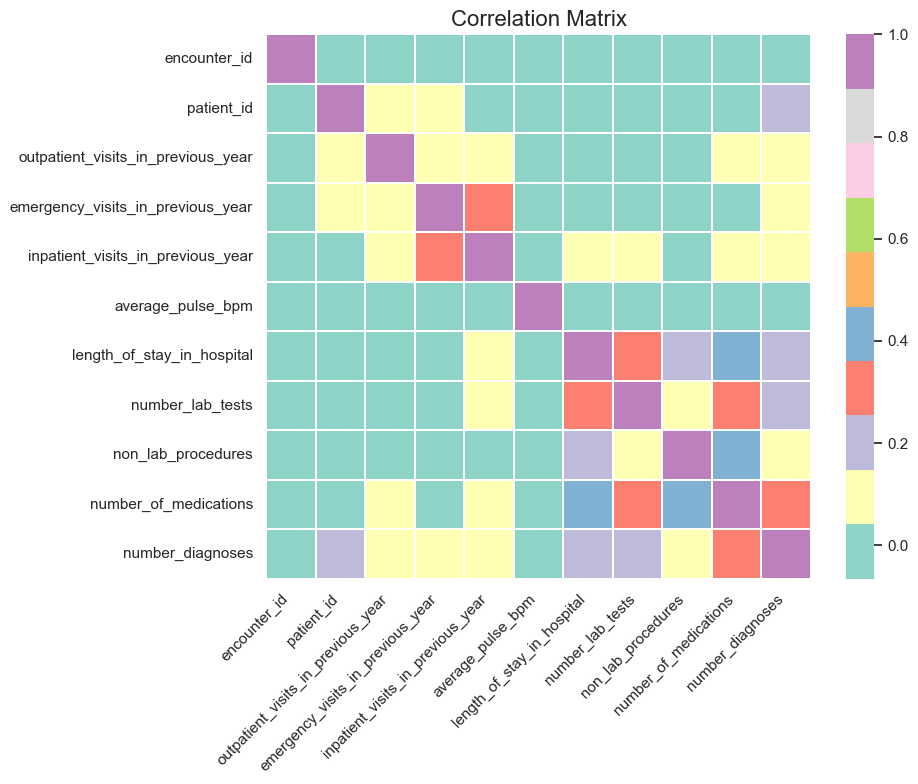

In [149]:
#corr = train_num.corr()

#palette = sns.color_palette("Set3", 10)

#sns.set(style="whitegrid")

#fig, ax = plt.subplots(figsize=(10, 8))

#sns.heatmap(corr, cmap = palette, annot=False, linewidths=0.1, square=True)

#plt.title("Correlation Matrix", fontsize=16)
#plt.xticks(rotation=45, ha='right')

#plt.tight_layout()

#plt.show()

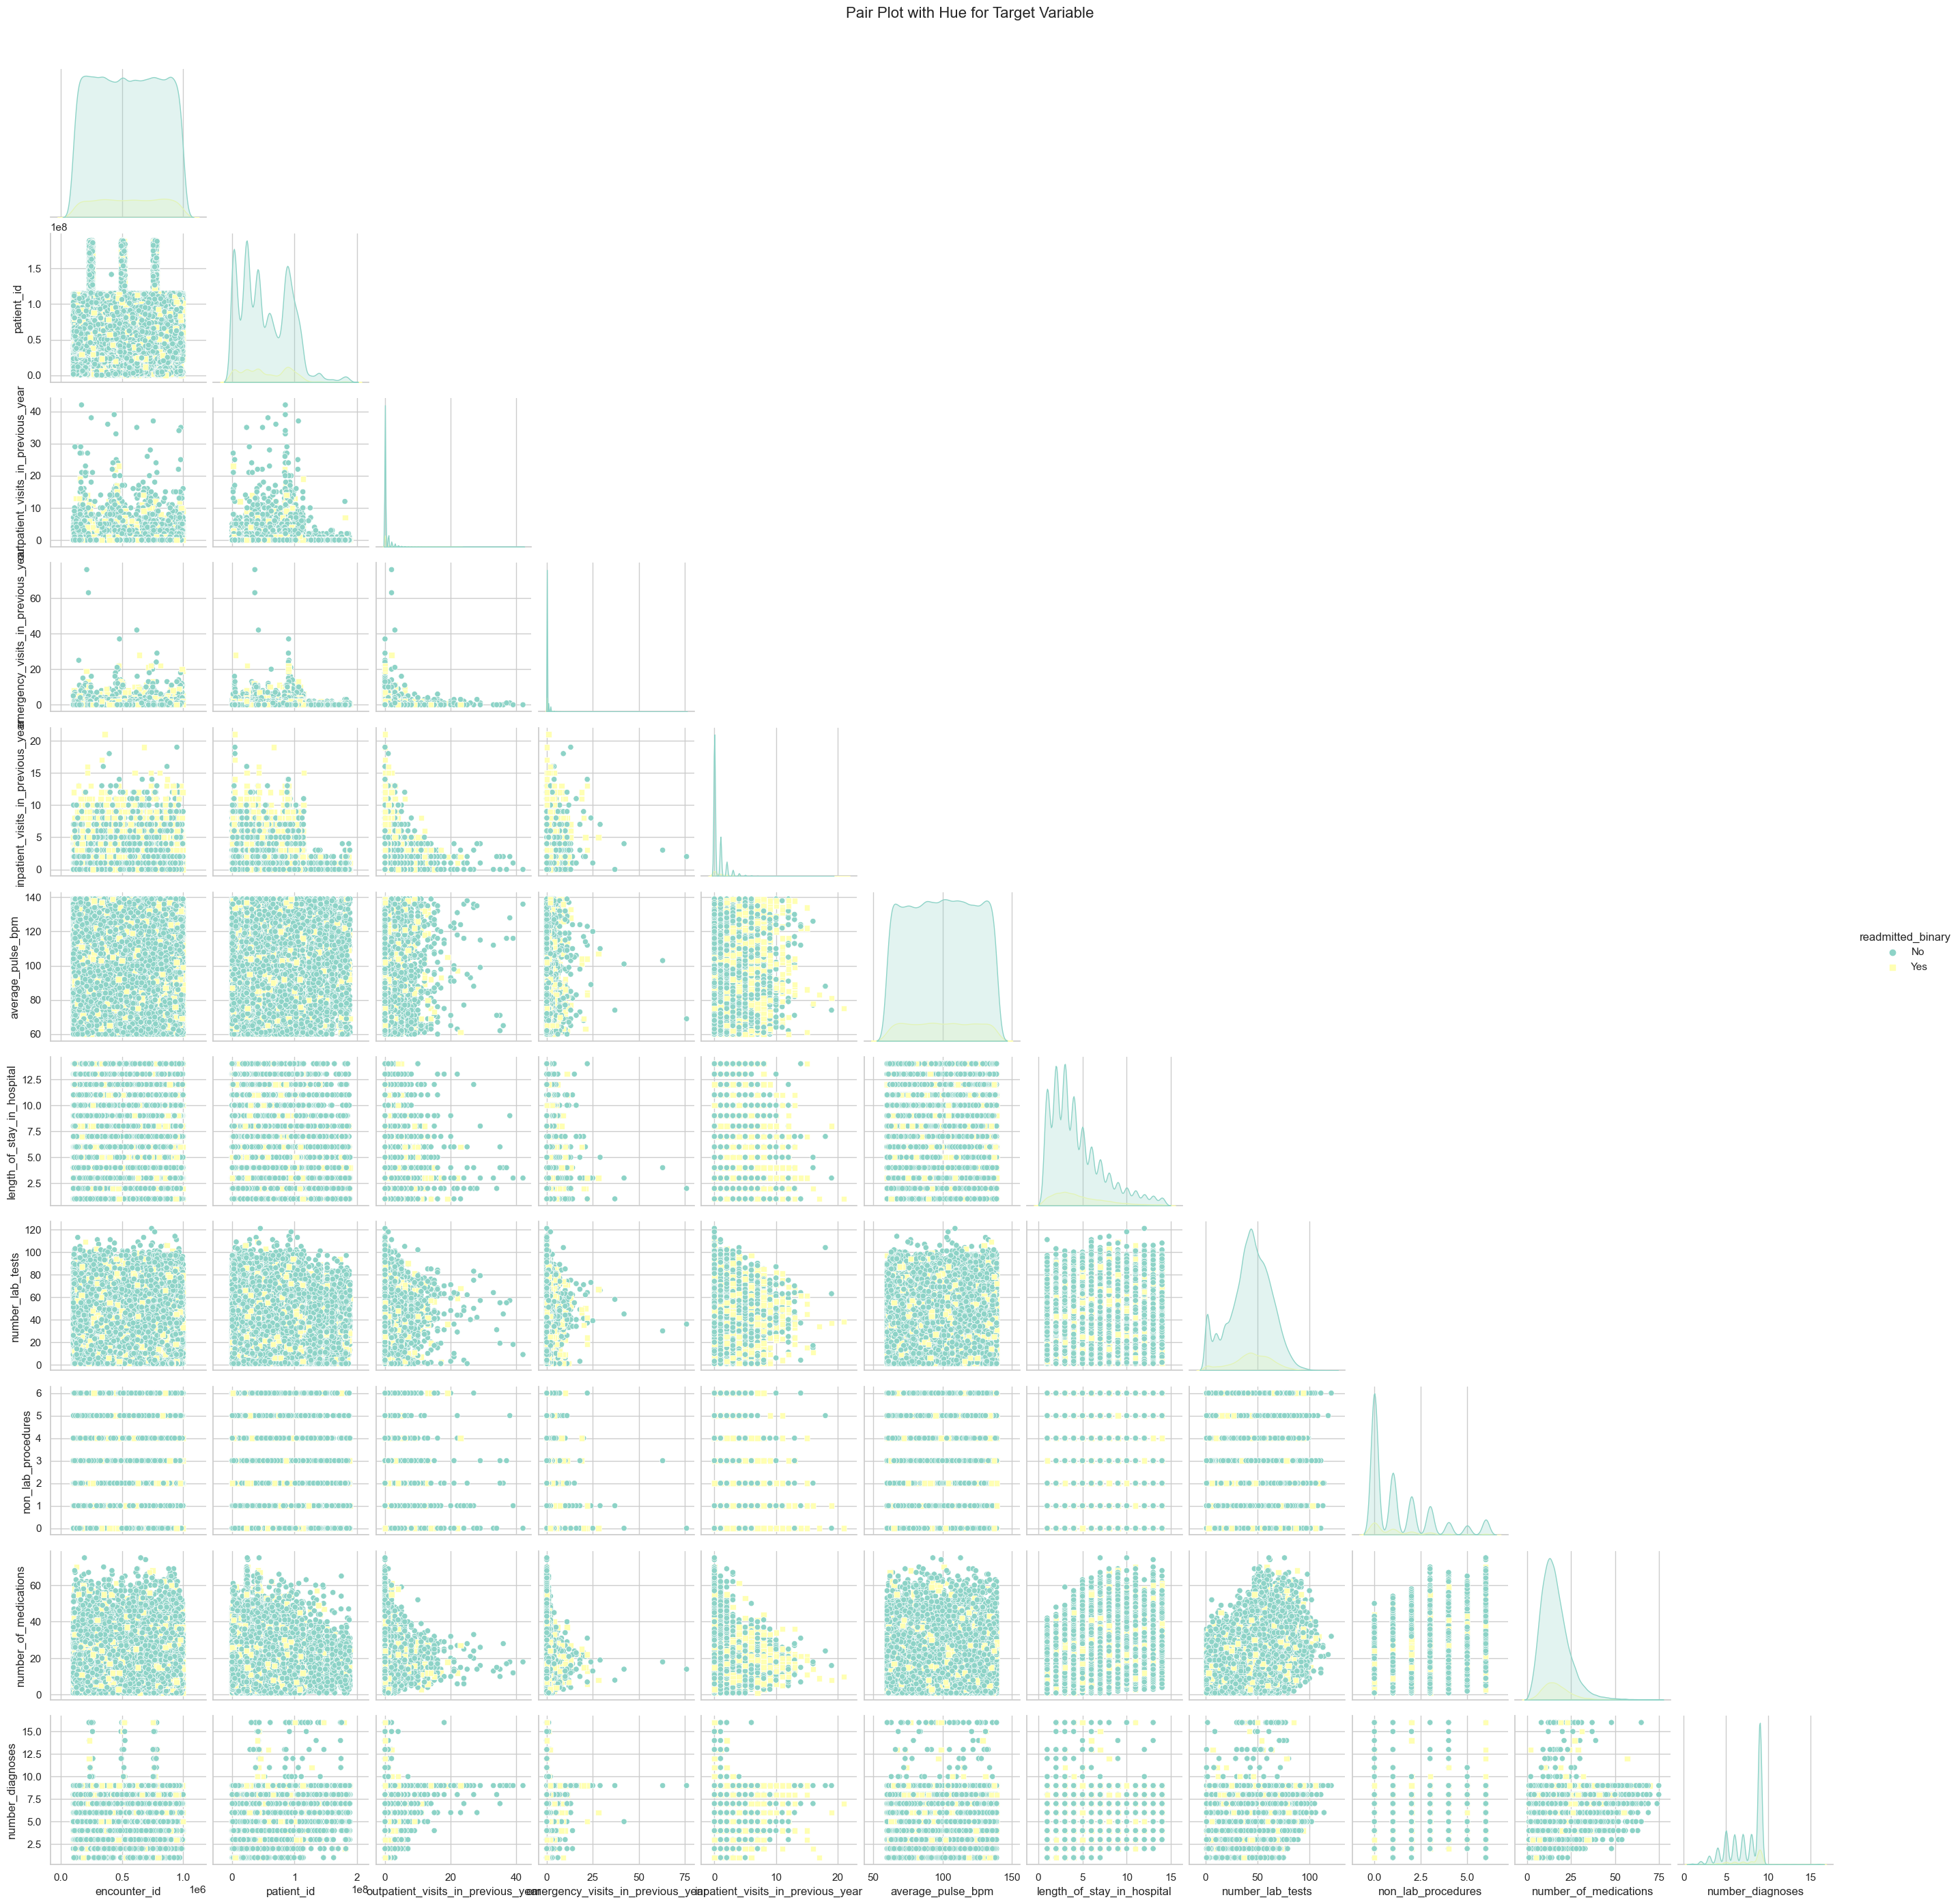

In [150]:
#sns.set(style="whitegrid")

#palette = sns.color_palette("Set3", 10)

#ax = sns.pairplot(train, diag_kind='kde', corner=True, hue='readmitted_binary', palette = palette, markers=["o", "s"], height=2.5)

#plt.suptitle("Pair Plot with Hue for Target Variable", y=1.02, fontsize=16)

#plt.xticks(rotation=45, ha='right')

#plt.show()

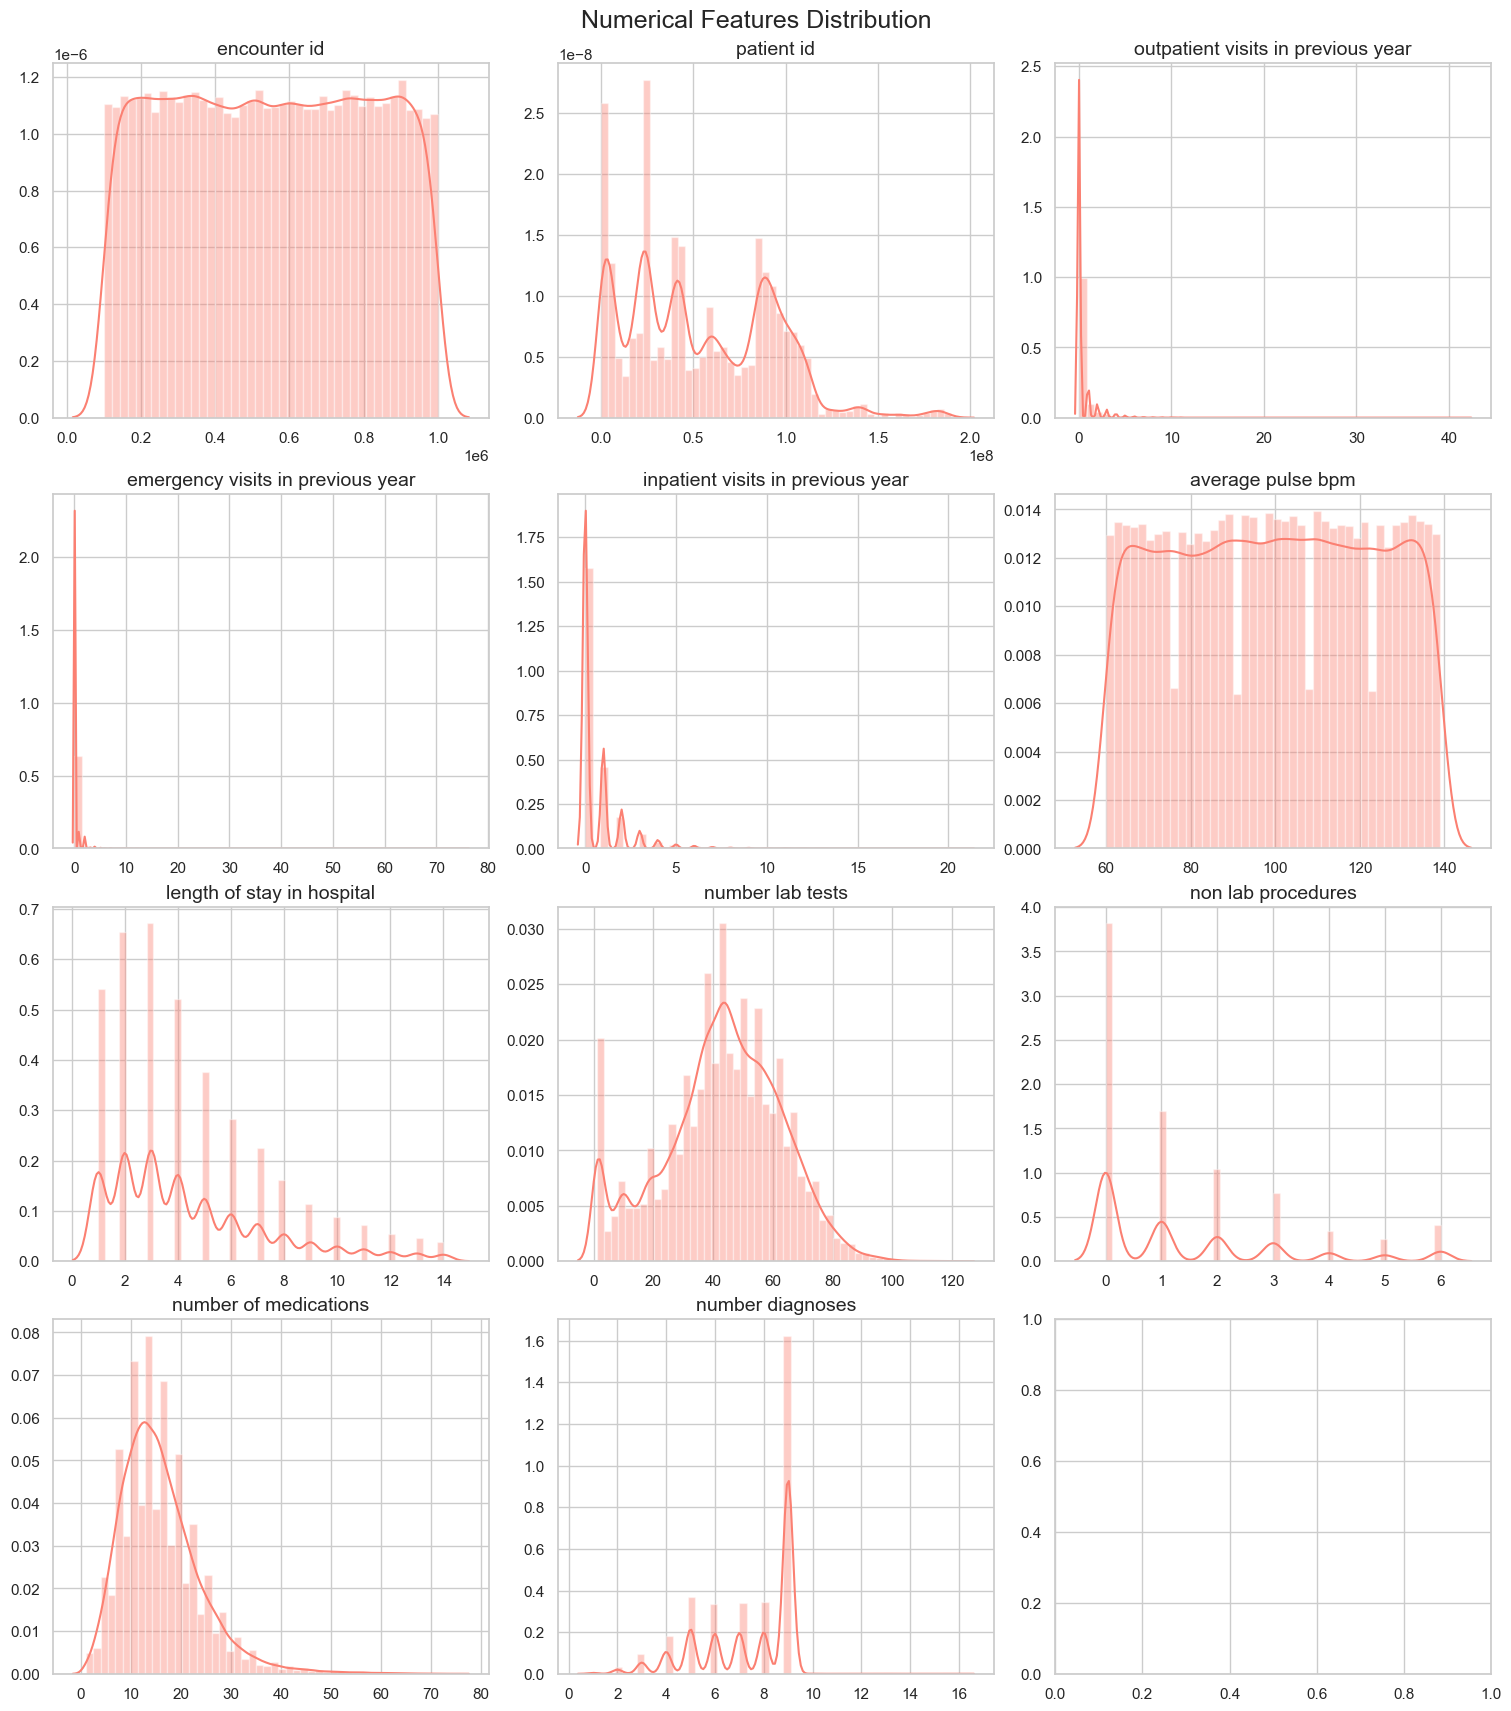

In [151]:
#fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15,17), constrained_layout = True)

#for ax, col in zip(axes.flatten(), train_num):
#    palette = sns.color_palette("Set3", 10)
#    sns.distplot(train[col], hist=True, color = palette[3], ax=ax)
#    ax.set_title(col.replace('_', ' '), y = 1, fontsize=14)
#    ax.set_xlabel('')
#    ax.set_ylabel('')

#plt.suptitle('Numerical Features Distribution', fontsize = 18) 

#plt.show()

__Notes:__ 
>1 - __Patient ID__: The distribution of this feature is positively skewed, indicating that there are some patients with a high number of records in the dataset.<p>
2 - __Time in Hospital__: This feature is positively skewed, indicating that most patients spend a short time in the hospital, but there are some cases where patients spend a longer time.<p>
3 - __Number of Medications__: The distribution of this feature is positively skewed, suggesting that most patients are on a few medications, but there are some patients on many medications.<p>
4 - __Number of Lab Procedures__: This feature appears to follow a normal distribution, indicating that most patients undergo a moderate number of lab procedures.<p>
5 - __Number of Procedures__: This feature is positively skewed, suggesting that most patients undergo a few procedures, but there are some patients who undergo many procedures.<p>
6 - __Number of Diagnoses__: The distribution of this feature is positively skewed, indicating that most patients have a few diagnoses, but there are some patients with many diagnoses.<p>
7 - __Number of Outpatient Visits__: This feature is positively skewed, suggesting that most patients have a few outpatient visits, but there are some patients with many visits.<p>


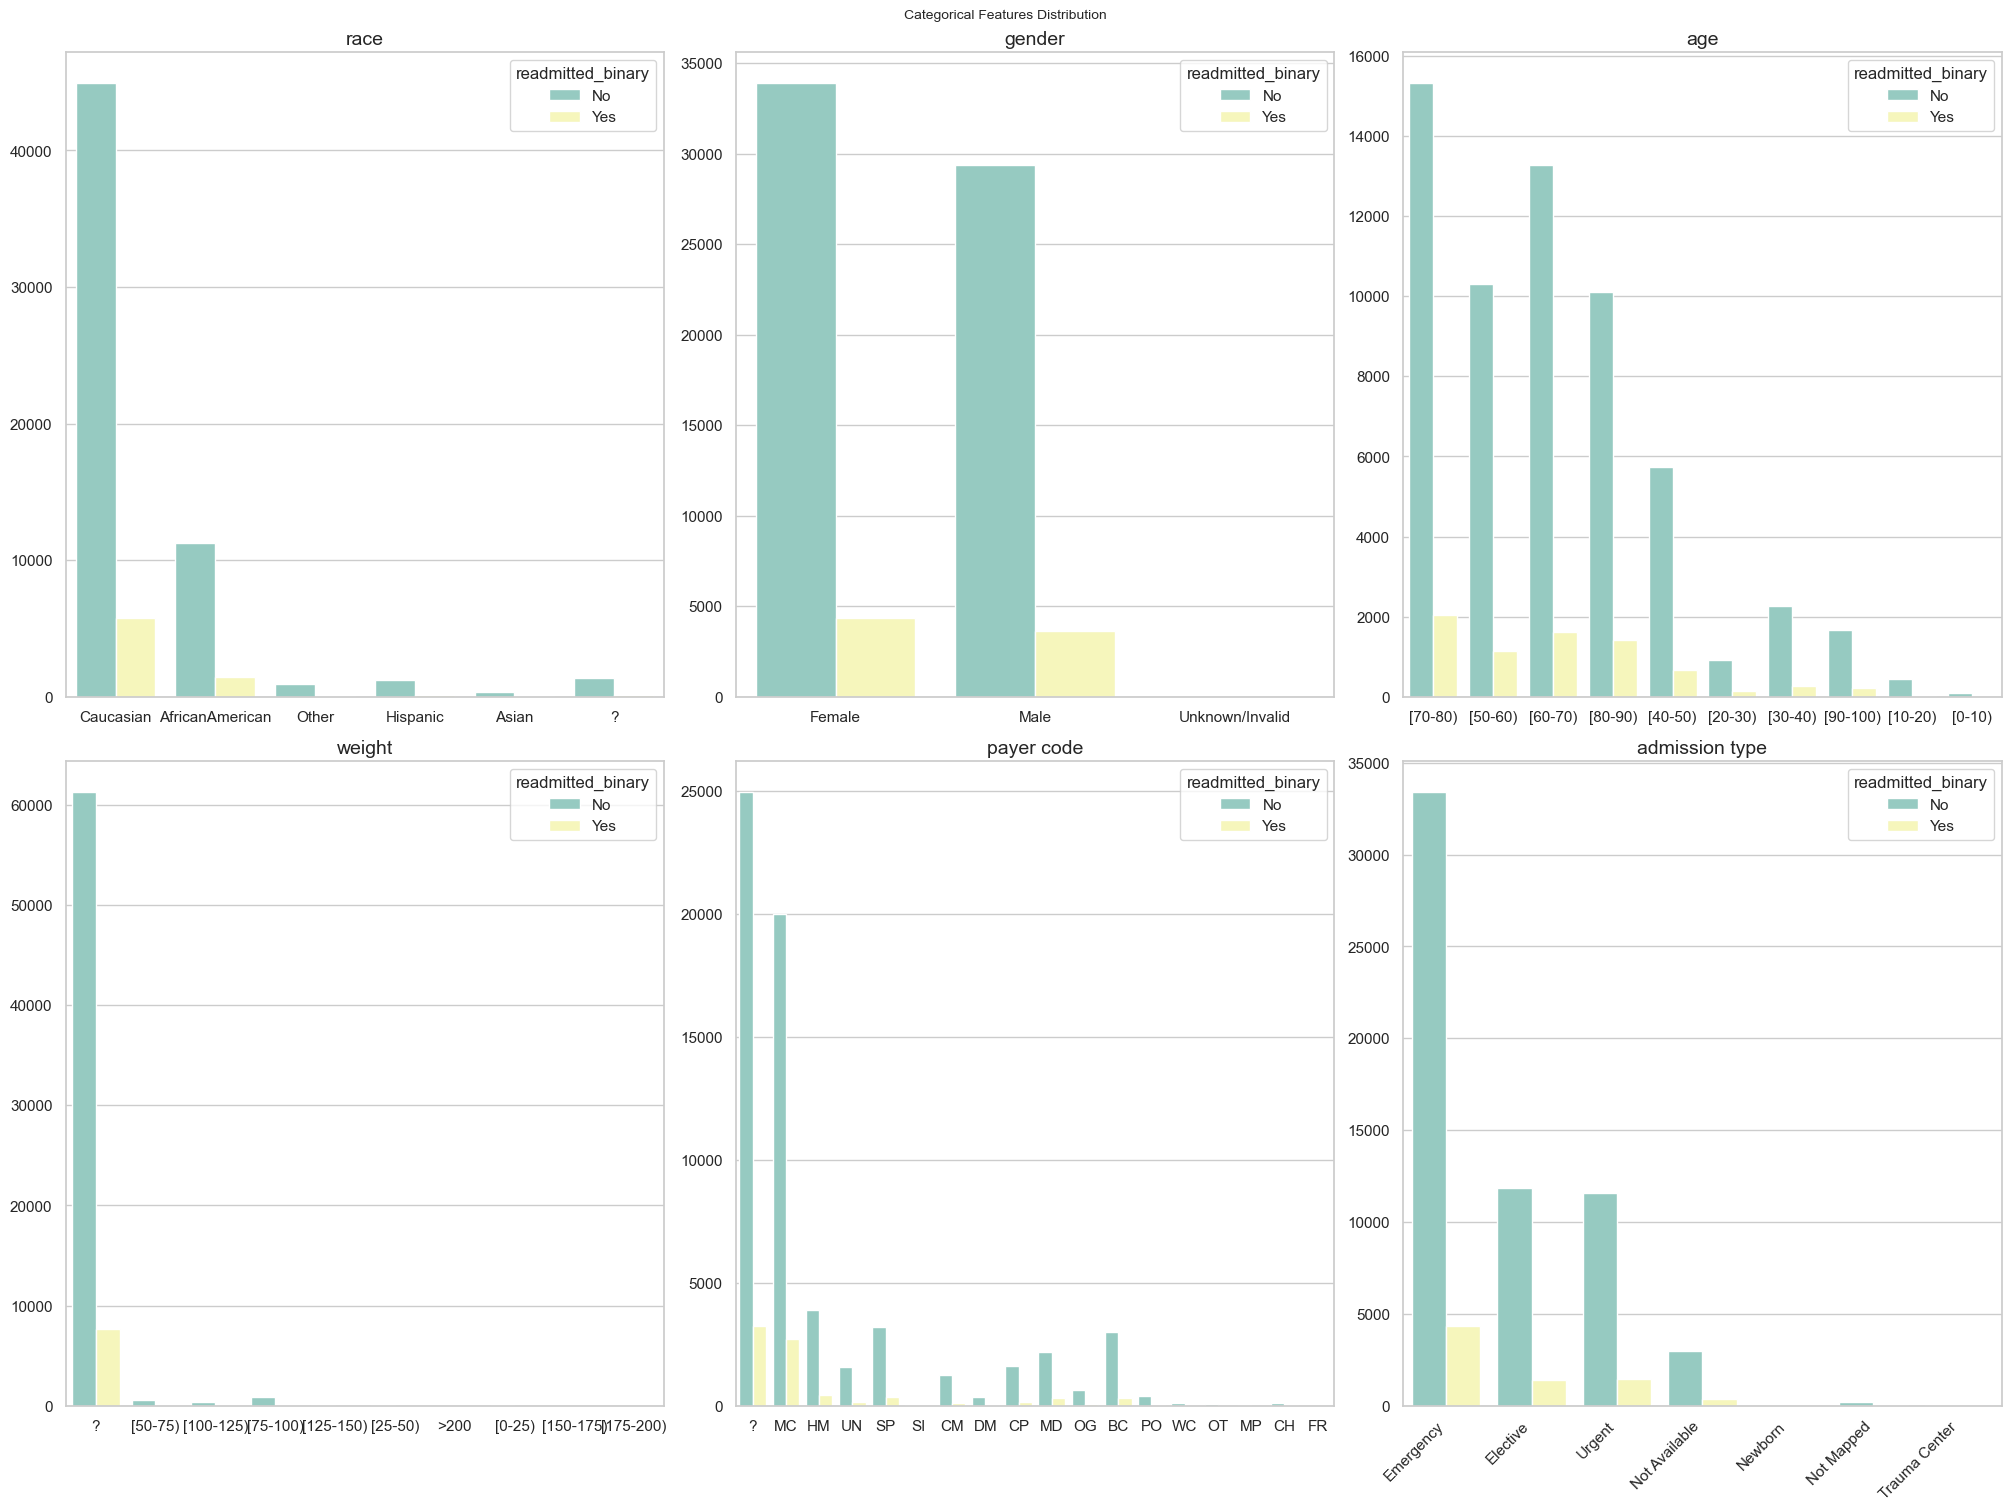

In [152]:
#fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15), constrained_layout=True)

#for ax, col in zip(axes.flatten(), train_cat.columns):
#    palette = sns.color_palette("Set3", 10)
#    sns.countplot(data=train_cat, x=col, palette=palette, ax=ax, hue='readmitted_binary')
#    ax.set_title(col.replace('_', ' '), y=1, fontsize=14)
#    ax.set_xlabel('')
#    ax.set_ylabel('')
#    plt.xticks(rotation=45, ha='right')
    
#plt.suptitle('Categorical Features Distribution', fontsize=10)

#plt.show()

We can't forget that the data is unbalanced, so taking conclusions based on these graphs wouldn't be correct. We just wanted to plot the categorical features, do see if there were strange thing, like we can see in race for example, were there are '?'.

# Data Preprocessing

## Data Spliting

In [153]:
X = train.drop(columns=['readmitted_multiclass','readmitted_binary'])
y = train[['readmitted_multiclass','readmitted_binary']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [154]:
#X_train

encounter_id  patient_id             race  gender      age weight  \
34735        739415    35095383        Caucasian    Male  [50-60)      ?   
16245        123949    23817699  AfricanAmerican  Female  [80-90)      ?   
18564        806562      722772              NaN  Female      NaN      ?   
11456        112455    27727578  AfricanAmerican    Male  [60-70)      ?   
9623         224301    45890226        Caucasian    Male  [70-80)      ?   
...             ...         ...              ...     ...      ...    ...   
41774        348053      118809  AfricanAmerican  Female  [50-60)      ?   
68858        907120    25069554              NaN    Male  [40-50)      ?   
11943        321922      677772  AfricanAmerican  Female  [70-80)      ?   
36866        609598     6605037        Caucasian  Female  [40-50)      ?   
9276         121794    43584786        Caucasian    Male  [40-50)      ?   

      payer_code  outpatient_visits_in_previous_year  \
34735         CP                                   0   
16245         MC                                   0   
18564          ?                                   0   
11456         MD                                   0   
9623          SP                                   0   
...          ...                                 ...   
41774         MD                                   0   
68858         CP                                   0   
11943          ?                                   0   
36866         MD                                   0   
9276          SP                                   0   

       emergency_visits_in_previous_year  inpatient_visits_in_previous_year  \
34735                                  0                                  0   
16245                                  1                                  3   
18564                                  0                                  0   
11456                                  0                                  0   
9623                                   0                                  0   
...                                  ...                                ...   
41774                                  0                                  0   
68858                                  1                                  0   
11943                                  0                                  0   
36866                                  0                                  0   
9276                                   0                                  0   

       ... number_of_medications primary_diagnosis  secondary_diagnosis  \
34735  ...                    23               444                  305   
16245  ...                    11               780                  276   
18564  ...                    20               682                  427   
11456  ...                    17               780                  401   
9623   ...                    14               414                  413   
...    ...                   ...               ...                  ...   
41774  ...                    20             250.6                  486   
68858  ...                     8             250.6                  536   
11943  ...                    27               618                  620   
36866  ...                    15               575                  577   
9276   ...                     8            250.01                  786   

      additional_diagnosis number_diagnoses  glucose_test_result  \
34735                  401                9                  NaN   
16245                  401                7                  NaN   
18564                  427                9                  NaN   
11456                  414                9                  NaN   
9623                   278                9                  NaN   
...                    ...              ...                  ...   
41774                  428                5                  NaN   
68858                  530 

In [155]:
#y_train

readmitted_multiclass readmitted_binary
34735              >30 days                No
16245                    No                No
18564              >30 days                No
11456              >30 days                No
9623                     No                No
...                     ...               ...
41774              >30 days                No
68858              >30 days                No
11943                    No                No
36866                    No                No
9276               >30 days                No

[56988 rows x 2 columns]

## Missing Values

### Glucose Test Result And A1C Test Result

We can assume that the lack of glucose and A1C test implies that the patient didn't need it.  
Therefore, we replace the missing values with Norm, meaning the levels were normal. This way the result are easier to understand

In [156]:
X_train['glucose_test_result'].fillna('Norm', inplace = True)
X_train['a1c_test_result'].fillna('Norm', inplace = True)

X_val['glucose_test_result'].fillna('Norm', inplace = True)
X_val['a1c_test_result'].fillna('Norm', inplace = True)

test['glucose_test_result'].fillna('Norm', inplace = True)
test['a1c_test_result'].fillna('Norm', inplace = True)

print('Missing values in glucose test:', X_train['glucose_test_result'].isna().sum(),
      '\nMissing values in a1c test:', X_train['a1c_test_result'].isna().sum())

Missing values in glucose test: 0 
Missing values in a1c test: 0


### Race and Age

In [157]:
#print('___________________________ \n',
#      X_train['race'].value_counts())
#print('___________________________ \n',
#      X_train['age'].value_counts(),
#      '\n___________________________')

___________________________ 
 race
Caucasian          40588
AfricanAmerican    10106
?                   1209
Hispanic            1117
Other                795
Asian                338
Name: count, dtype: int64
___________________________ 
 age
[70-80)     13875
[60-70)     11923
[80-90)      9225
[50-60)      9123
[40-50)      5149
[30-40)      2017
[90-100)     1497
[20-30)       864
[10-20)       384
[0-10)         90
Name: count, dtype: int64 
___________________________


As we can see there are hidden missing values in race and age, so we also need to deal with them. Let´s fill Age and Race with the mode, since the amount of missing values is relatively small, and to the same for the '?'.

In [158]:
X_train['race'].replace('?', X_train['race'].mode()[0], inplace = True)
X_train['race'].fillna(X_train['race'].mode()[0], inplace = True)
X_train['age'].replace('?', X_train['age'].mode()[0], inplace = True)
X_train['age'].fillna(X_train['age'].mode()[0], inplace = True)

X_val['race'].replace('?', X_train['race'].mode()[0], inplace = True)
X_val['race'].fillna(X_train['race'].mode()[0], inplace = True)
X_val['age'].replace('?', X_train['age'].mode()[0], inplace = True)
X_val['age'].fillna(X_train['age'].mode()[0], inplace = True)

test['race'].replace('?', X_train['race'].mode()[0], inplace = True)
test['race'].fillna(X_train['race'].mode()[0], inplace = True)
test['age'].replace('?', X_train['age'].mode()[0], inplace = True)
test['age'].fillna(X_train['age'].mode()[0], inplace = True)

print('Missing values in race:', X_train['race'].isna().sum(),
      '\nMissing values in age:', X_train['age'].isna().sum())

Missing values in race: 0 
Missing values in age: 0


### Admission Type, Admission Source And Discharge Disposition

Some variables have "Not Available" or "Not Mapped" as one of the options, yet have missing values or typos such as "Not Avaiable"

In [159]:
X_train['admission_type'].fillna('Not Available', inplace = True)
#X_train['admission_type'].replace('Not Avaiable', 'Not Available', inplace = True)
X_train['admission_source'].fillna('Not Available', inplace = True)
#X_train['admission_source'].replace(' Not Available', 'Not Available', inplace = True)
X_train['discharge_disposition'].fillna('Not Available', inplace = True)
#X_train['discharge_disposition'].replace('Not Avaiable', 'Not Available', inplace = True)

X_val['admission_type'].fillna('Not Available', inplace = True)
#X_val['admission_type'].replace('Not Avaiable', 'Not Available', inplace = True)
X_val['admission_source'].fillna('Not Available', inplace = True)
#X_val['admission_source'].replace(' Not Available', 'Not Available', inplace = True)
X_val['discharge_disposition'].fillna('Not Available', inplace = True)
#X_val['discharge_disposition'].replace('Not Avaiable', 'Not Available', inplace = True)

test['admission_type'].fillna('Not Available', inplace = True)
#test['admission_type'].replace('Not Avaiable', 'Not Available', inplace = True)
test['admission_source'].fillna('Not Available', inplace = True)
#test['admission_source'].replace(' Not Available', 'Not Available', inplace = True)
test['discharge_disposition'].fillna('Not Available', inplace = True)
#test['discharge_disposition'].replace('Not Avaiable', 'Not Available', inplace = True)

print('Missing values in admission type:', X_train['admission_type'].isna().sum(),
      '\nMissing values in admission source:', X_train['admission_source'].isna().sum(),
      '\nMissing values in discharge_disposition:', X_train['discharge_disposition'].isna().sum()
     )

Missing values in admission type: 0 
Missing values in admission source: 0 
Missing values in discharge_disposition: 0


Let's make sure all the missing values are gone.

### Payer Code

In [160]:
#X_train['payer_code'].value_counts()

payer_code
?     22562
MC    18166
HM     3446
SP     2842
BC     2603
MD     1982
CP     1417
UN     1361
CM     1087
OG      602
PO      343
DM      297
CH       84
WC       74
MP       44
OT       39
SI       38
FR        1
Name: count, dtype: int64

Payer code has no missing values, but there are a lot of '?'.  
This could mean that those people didnt have insurance, so they didn't know what to say. Assuming this, it would be safe to assume that the answer is 'no insurance'.  
This will make thing easier to understand.

In [161]:
#X_train.isna().sum()

encounter_id                             0
patient_id                               0
race                                     0
gender                                   0
age                                      0
weight                                   0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_tes

In [162]:
X_train['payer_code'].replace('?', 'No Insurance', inplace = True)

X_val['payer_code'].replace('?', 'No Insurance', inplace = True)

test['payer_code'].replace('?', 'No Insurance', inplace = True)

### Medical Specialty and Weight

In [163]:
#X_train['medical_specialty'].value_counts()

medical_specialty
?                                  27982
InternalMedicine                    8164
Emergency/Trauma                    4263
Family/GeneralPractice              4195
Cardiology                          2962
                                   ...  
Proctology                             1
Neurophysiology                        1
Pediatrics-AllergyandImmunology        1
Pediatrics-InfectiousDiseases          1
SportsMedicine                         1
Name: count, Length: 67, dtype: int64

In [164]:
#X_train['weight'].value_counts()

weight
?            55216
[75-100)       729
[50-75)        509
[100-125)      356
[125-150)       73
[25-50)         53
[0-25)          30
[150-175)       14
[175-200)        6
>200             2
Name: count, dtype: int64

We saw that medical_specialty and weight have a huge amount of '?', counting as missing data in our opinion, so we decided that the best would be do drop them.

In [165]:
X_train.drop(columns=['weight','medical_specialty'], inplace = True)
X_val.drop(columns=['weight','medical_specialty'], inplace = True)
test.drop(columns=['weight','medical_specialty'], inplace = True)

### Encounter ID and Patient ID

In [166]:
X_train['number_of_visits'] = X_train['patient_id'].map(X_train['patient_id'].value_counts())
X_val['number_of_visits'] = X_val['patient_id'].map(X_val['patient_id'].value_counts())
test['number_of_visits'] = test['patient_id'].map(test['patient_id'].value_counts())

In [167]:
X_train.drop(columns = ['encounter_id','patient_id'], inplace = True)
X_val.drop(columns = ['encounter_id','patient_id'], inplace = True)
test.drop(columns = ['encounter_id','patient_id'], inplace = True)

## Outlier Removal

First let's separate our data by data type.

In [168]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

test_num = test.select_dtypes(include=np.number).set_index(test.index)
test_cat = test.select_dtypes(exclude=np.number).set_index(test.index)


In [169]:
#X_train_num.dtypes

outpatient_visits_in_previous_year    int64
emergency_visits_in_previous_year     int64
inpatient_visits_in_previous_year     int64
average_pulse_bpm                     int64
length_of_stay_in_hospital            int64
number_lab_tests                      int64
non_lab_procedures                    int64
number_of_medications                 int64
number_diagnoses                      int64
number_of_visits                      int64
dtype: object

In [170]:
#X_train_cat.dtypes

race                                     object
gender                                   object
age                                      object
payer_code                               object
admission_type                           object
discharge_disposition                    object
admission_source                         object
primary_diagnosis                        object
secondary_diagnosis                      object
additional_diagnosis                     object
glucose_test_result                      object
a1c_test_result                          object
change_in_meds_during_hospitalization    object
prescribed_diabetes_meds                 object
medication                               object
dtype: object

Let's plot the numerical features in order to try and visualize outliers

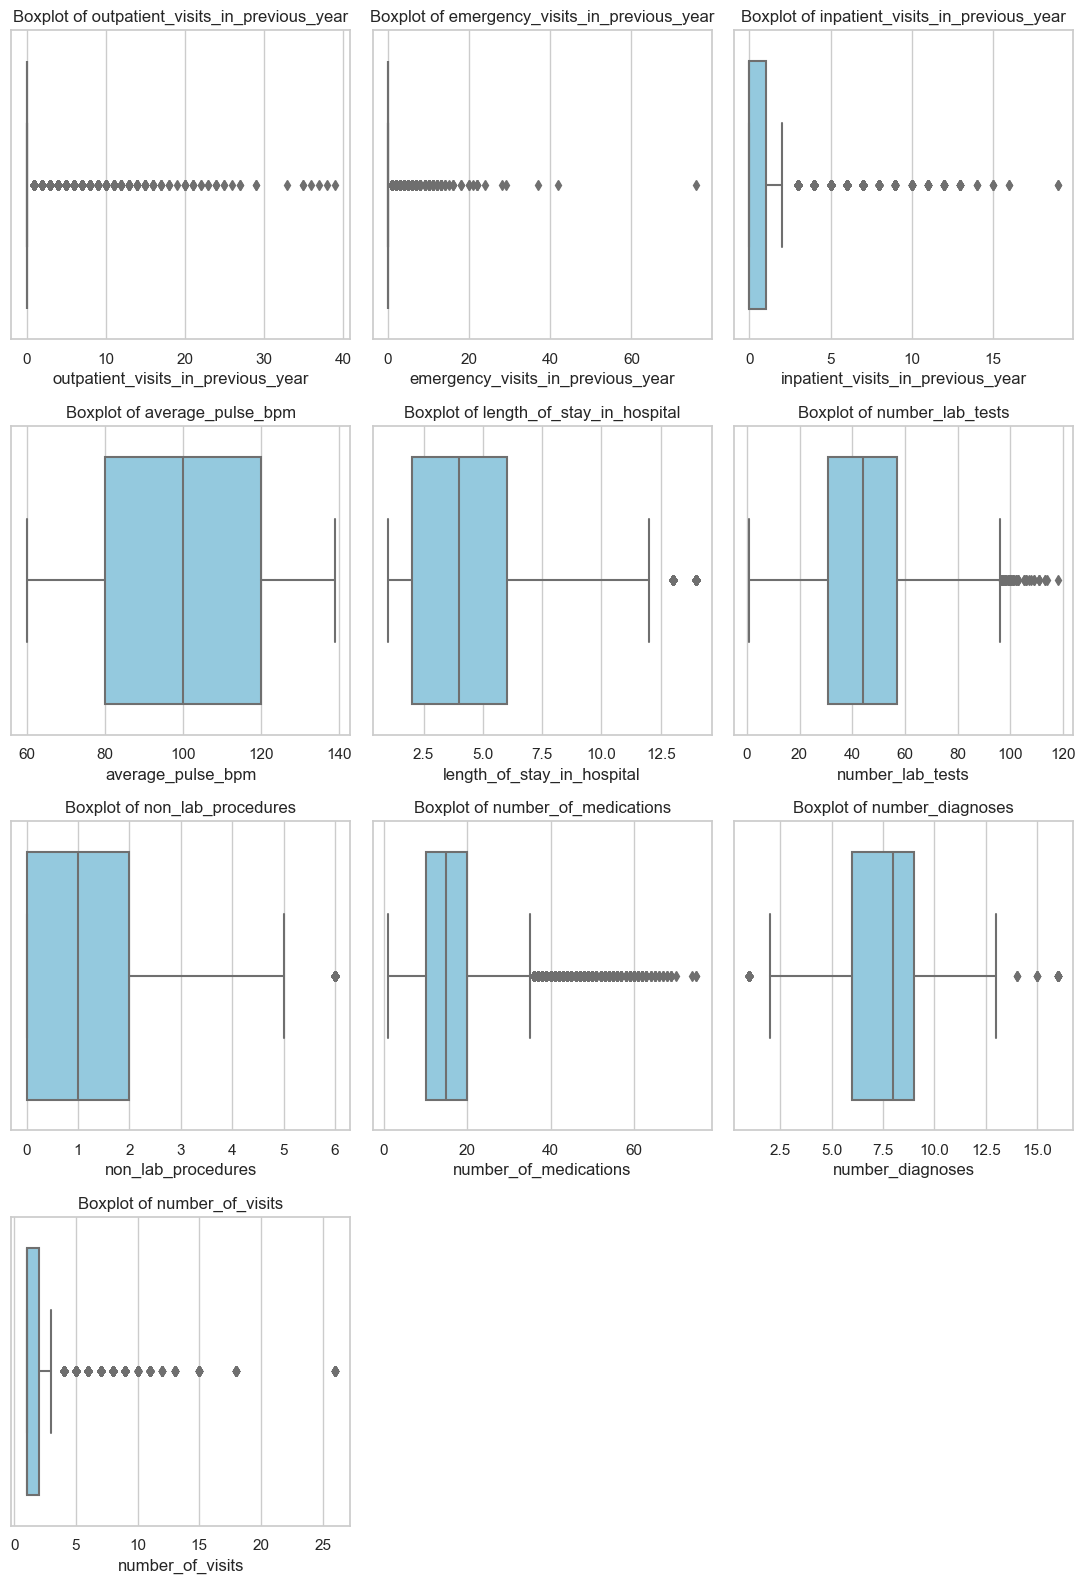

In [171]:
#num_columns = X_train_num.shape[1]
#num_rows = (num_columns // 3) + (num_columns % 3)

#plt.figure(figsize=(11, 4 * num_rows))

#for i, column in enumerate(X_train_num.columns):
#    plt.subplot(num_rows, 3, i+1)
#    sns.boxplot(x=X_train_num[column], orient="h", color="skyblue")
#    plt.title(f"Boxplot of {column}")

#plt.tight_layout()
#plt.show()

### Manual Method

In [172]:
filters1 = (
    (X_train['outpatient_visits_in_previous_year']<=35)
    &
    (X_train['emergency_visits_in_previous_year']<=35)
    &
    (X_train['inpatient_visits_in_previous_year']<=17)
    &
    (X_train['length_of_stay_in_hospital']<=12)
    &
    (X_train['non_lab_procedures']<=5)
    &
    (X_train['number_of_medications']<=75)
    &
    (X_train['number_diagnoses']<=15)
    &
    (X_train['number_diagnoses']>=2)
    &
    (X_train['number_of_visits']<=15)
)

fil_1 = X_train[filters1]

print('Percentage of data kept after removing outliers:', np.round(fil_1.shape[0] / X_train.shape[0], 4)*100,'%')

Percentage of data kept after removing outliers: 92.82000000000001 %


### IQR Method

As saw before, the data is not centered so, we need to ajust the IQR to fit our dataset.

In [173]:
q25 = X_train_num.quantile(.25)
q75 = X_train_num.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 4.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in X_train_num:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(X_train[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
fil_2 = X_train.reset_index(drop = True)[filters2]
print('Percentage of data kept after removing outliers:', np.round(fil_2.shape[0] / X_train.shape[0], 4)*100,'%')


Percentage of data kept after removing outliers: 75.07000000000001 %


### Log Transformation Method

In [174]:
#log_train = X_train.copy()

#for col in X_train_num:
#    log_train[col]=np.log(1+log_train[col])

#print('Percentage of data kept after removing outliers:', np.round(log_train.shape[0] / X_train.shape[0], 4)*100,'%')

Percentage of data kept after removing outliers: 100.0 %


### Manual + IQR

In [175]:
fil_3 = X_train[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(fil_3.shape[0] / X_train.shape[0], 4)*100,'%')

Percentage of data kept after removing outliers: 97.09 %


In [176]:
X_train = fil_3.copy()
X_train.shape

(55330, 25)

In [177]:
#y_train.shape

(56988, 2)

In [178]:
y_train = y_train.loc[X_train.index]
y_train.shape

(55330, 2)

# Data Type Correction and Optimization

We saw before that 'change_in_meds_during_hospitalization' and 'prescribed_diabetes_meds' were binary variables, so let's encode them were no equals to 0 and yes equals to 1.

In [179]:
X_train['change_in_meds_during_hospitalization'] = X_train['change_in_meds_during_hospitalization'].replace({'No': 0, 'Ch': 1})
X_val['change_in_meds_during_hospitalization'] = X_val['change_in_meds_during_hospitalization'].replace({'No': 0, 'Ch': 1})
test['change_in_meds_during_hospitalization'] = test['change_in_meds_during_hospitalization'].replace({'No': 0, 'Ch': 1})


X_train['prescribed_diabetes_meds'] = X_train['prescribed_diabetes_meds'].replace({'No': 0, 'Yes': 1})
X_val['prescribed_diabetes_meds'] = X_val['prescribed_diabetes_meds'].replace({'No': 0, 'Yes': 1})
test['prescribed_diabetes_meds'] = test['prescribed_diabetes_meds'].replace({'No': 0, 'Yes': 1})

We decided that dividing age in 4 categories could be helpfull, so created new bins for each age.   
This will also make it easier to encode.
We have that:
- People between 0 and 10 are children;
- People between 10 and 40 are young;
- People between 40 and 70 are middle;
- People between 70 and 100 are old.

In [180]:
#X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55330 entries, 34735 to 9276
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   race                                   55330 non-null  object
 1   gender                                 55330 non-null  object
 2   age                                    55330 non-null  object
 3   payer_code                             55330 non-null  object
 4   outpatient_visits_in_previous_year     55330 non-null  int64 
 5   emergency_visits_in_previous_year      55330 non-null  int64 
 6   inpatient_visits_in_previous_year      55330 non-null  int64 
 7   admission_type                         55330 non-null  object
 8   average_pulse_bpm                      55330 non-null  int64 
 9   discharge_disposition                  55330 non-null  object
 10  admission_source                       55330 non-null  object
 11  length_of_stay_in

In [181]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

test_num = test.select_dtypes(include=np.number).set_index(test.index)
test_cat = test.select_dtypes(exclude=np.number).set_index(test.index)


We want to try an see if optimizing the type of data will be more computational efficient.

In [182]:
#X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55330 entries, 34735 to 9276
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   outpatient_visits_in_previous_year     55330 non-null  int64
 1   emergency_visits_in_previous_year      55330 non-null  int64
 2   inpatient_visits_in_previous_year      55330 non-null  int64
 3   average_pulse_bpm                      55330 non-null  int64
 4   length_of_stay_in_hospital             55330 non-null  int64
 5   number_lab_tests                       55330 non-null  int64
 6   non_lab_procedures                     55330 non-null  int64
 7   number_of_medications                  55330 non-null  int64
 8   number_diagnoses                       55330 non-null  int64
 9   change_in_meds_during_hospitalization  55330 non-null  int64
 10  prescribed_diabetes_meds               55330 non-null  int64
 11  number_of_visits              

In [183]:
#X_train_num.describe().T

count       mean        std   min  \
outpatient_visits_in_previous_year     55330.0   0.373974   1.297813   0.0   
emergency_visits_in_previous_year      55330.0   0.194668   0.815081   0.0   
inpatient_visits_in_previous_year      55330.0   0.641515   1.258910   0.0   
average_pulse_bpm                      55330.0  99.617875  23.033542  60.0   
length_of_stay_in_hospital             55330.0   4.293783   2.854194   1.0   
number_lab_tests                       55330.0  42.917097  19.639597   1.0   
non_lab_procedures                     55330.0   1.245129   1.590586   0.0   
number_of_medications                  55330.0  15.757329   7.834141   1.0   
number_diagnoses                       55330.0   7.408332   1.936388   1.0   
change_in_meds_during_hospitalization  55330.0   0.461395   0.498512   0.0   
prescribed_diabetes_meds               55330.0   0.769601   0.421092   0.0   
number_of_visits                       55330.0   1.706904   1.445572   1.0   

                                        25%    50%    75%    max  
outpatient_visits_in_previous_year      0.0    0.0    0.0   39.0  
emergency_visits_in_previous_year       0.0    0.0    0.0   37.0  
inpatient_visits_in_previous_year       0.0    0.0    1.0   19.0  
average_pulse_bpm                      80.0  100.0  120.0  139.0  
length_of_stay_in_hospital              2.0    4.0    6.0   14.0  
number_lab_tests                       31.0   44.0   57.0  118.0  
non_lab_procedures                      0.0    1.0    2.0    6.0  
number_of_medications                  10.0   15.0   20.0   75.0  
number_diagnoses                        6.0    8.0    9.0   16.0  
change_in_meds_during_hospitalization   0.0    0.0    1.0    1.0  
prescribed_diabetes_meds                1.0    1.0    1.0    1.0  
number_of_visits                        1.0    1.0    2.0   26.0

In [184]:
X_train[['outpatient_visits_in_previous_year','emergency_visits_in_previous_year','inpatient_visits_in_previous_year',
        'average_pulse_bpm','length_of_stay_in_hospital','number_lab_tests','non_lab_procedures','number_of_medications',
        'number_diagnoses','change_in_meds_during_hospitalization','prescribed_diabetes_meds']] = X_train[['outpatient_visits_in_previous_year','emergency_visits_in_previous_year','inpatient_visits_in_previous_year',
        'average_pulse_bpm','length_of_stay_in_hospital','number_lab_tests','non_lab_procedures','number_of_medications',
        'number_diagnoses','change_in_meds_during_hospitalization','prescribed_diabetes_meds']].astype('int16') 

The max value is over 127 (8bit) but way under 32767 (16bit), so let's change all of them to 16 bit.

In [185]:
#X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55330 entries, 34735 to 9276
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   race                                   55330 non-null  object
 1   gender                                 55330 non-null  object
 2   age                                    55330 non-null  object
 3   payer_code                             55330 non-null  object
 4   outpatient_visits_in_previous_year     55330 non-null  int16 
 5   emergency_visits_in_previous_year      55330 non-null  int16 
 6   inpatient_visits_in_previous_year      55330 non-null  int16 
 7   admission_type                         55330 non-null  object
 8   average_pulse_bpm                      55330 non-null  int16 
 9   discharge_disposition                  55330 non-null  object
 10  admission_source                       55330 non-null  object
 11  length_of_stay_in

In [186]:
#X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55330 entries, 34735 to 9276
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   race                   55330 non-null  object
 1   gender                 55330 non-null  object
 2   age                    55330 non-null  object
 3   payer_code             55330 non-null  object
 4   admission_type         55330 non-null  object
 5   discharge_disposition  55330 non-null  object
 6   admission_source       55330 non-null  object
 7   primary_diagnosis      55330 non-null  object
 8   secondary_diagnosis    55330 non-null  object
 9   additional_diagnosis   55330 non-null  object
 10  glucose_test_result    55330 non-null  object
 11  a1c_test_result        55330 non-null  object
 12  medication             55330 non-null  object
dtypes: object(13)
memory usage: 5.9+ MB


Right before the models, we are going to confirm and look for more optimization.

# Feature Engineering And Selection

## Age

In [187]:
# convert column from ranges to 'young', 'middle', 'old'
X_train['age'] = X_train['age'].replace({'[0-10)': 'child', 
                                         '[10-20)': 'young', '[20-30)': 'young', '[30-40)': 'young', 
                                         '[40-50)': 'middle', '[50-60)': 'middle', '[60-70)': 'middle', 
                                         '[70-80)': 'old', '[80-90)': 'old', '[90-100)': 'old'})

X_val['age'] = X_val['age'].replace({'[0-10)': 'child', 
                                         '[10-20)': 'young', '[20-30)': 'young', '[30-40)': 'young', 
                                         '[40-50)': 'middle', '[50-60)': 'middle', '[60-70)': 'middle', 
                                         '[70-80)': 'old', '[80-90)': 'old', '[90-100)': 'old'})

test['age'] = test['age'].replace({'[0-10)': 'child', 
                                         '[10-20)': 'young', '[20-30)': 'young', '[30-40)': 'young', 
                                         '[40-50)': 'middle', '[50-60)': 'middle', '[60-70)': 'middle', 
                                         '[70-80)': 'old', '[80-90)': 'old', '[90-100)': 'old'})

- Created a total number of visit in previous year;
- Total procedures the patient was submitted during the stay;
- The number of medication the patient was submitted per day of stay;
- The number of procedures the patient was submitted per day of stay;
- A ratio between number of procedures and diagnoses.

## New Features

In [188]:
X_train['total_visits_in_previous_year'] = X_train[['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year']].sum(axis=1)
X_val['total_visits_in_previous_year'] = X_val[['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year']].sum(axis=1)
test['total_visits_in_previous_year'] = test[['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year']].sum(axis=1)

In [189]:
X_train['total_procedures_during_stay'] = X_train[['number_lab_tests', 'non_lab_procedures']].sum(axis=1)
X_val['total_procedures_during_stay'] = X_val[['number_lab_tests', 'non_lab_procedures']].sum(axis=1)
test['total_procedures_during_stay'] = test[['number_lab_tests', 'non_lab_procedures']].sum(axis=1)

In [190]:
X_train['medication_per_day_of_stay'] = X_train['number_of_medications'] /X_train['length_of_stay_in_hospital']
X_val['medication_per_day_of_stay'] = X_val['number_of_medications'] /X_val['length_of_stay_in_hospital']
test['medication_per_day_of_stay'] = test['number_of_medications'] /test['length_of_stay_in_hospital']

In [191]:
X_train['procedures_per_day_of_stay'] = X_train['total_procedures_during_stay'] /X_train['length_of_stay_in_hospital']
X_val['procedures_per_day_of_stay'] = X_val['total_procedures_during_stay'] /X_val['length_of_stay_in_hospital']
test['procedures_per_day_of_stay'] = test['total_procedures_during_stay'] /test['length_of_stay_in_hospital']

In [192]:
X_train['procedure_diagnoses_ratio'] = X_train['total_procedures_during_stay'] /X_train['number_diagnoses']
X_val['procedure_diagnoses_ratio'] = X_val['total_procedures_during_stay'] /X_val['number_diagnoses']
test['procedure_diagnoses_ratio'] = test['total_procedures_during_stay'] /test['number_diagnoses']

In [193]:
#X_train

race  gender     age    payer_code  \
34735        Caucasian    Male  middle            CP   
16245  AfricanAmerican  Female     old            MC   
18564        Caucasian  Female     old  No Insurance   
11456  AfricanAmerican    Male  middle            MD   
9623         Caucasian    Male     old            SP   
...                ...     ...     ...           ...   
41774  AfricanAmerican  Female  middle            MD   
68858        Caucasian    Male  middle            CP   
11943  AfricanAmerican  Female     old  No Insurance   
36866        Caucasian  Female  middle            MD   
9276         Caucasian    Male  middle            SP   

       outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
34735                                   0                                  0   
16245                                   0                                  1   
18564                                   0                                  0   
11456                                   0                                  0   
9623                                    0                                  0   
...                                   ...                                ...   
41774                                   0                                  0   
68858                                   0                                  1   
11943                                   0                                  0   
36866                                   0                                  0   
9276                                    0                                  0   

       inpatient_visits_in_previous_year admission_type  average_pulse_bpm  \
34735                                  0         Urgent                 92   
16245                                  3      Emergency                105   
18564                                  0      Emergency                 96   
11456                                  0         Urgent                 72   
9623                                   0       Elective                 75   
...                                  ...            ...                ...   
41774                                  0      Emergency                 98   
68858                                  0      Emergency                127   
11943                                  0       Elective                 98   
36866                                  0      Emergency                 76   
9276                                   0      Emergency                129   

                                   discharge_disposition  ... a1c_test_result  \
34735                                 Discharged to home  ...              >7   
16245                      Discharged/transferred to SNF  ...            Norm   
18564  Discharged/transferred to home with home healt...  ...              >8   
11456                                 Discharged to home  ...            Norm   
9623                                  Discharged to home  ...            Norm   
...                                                  ...  ...             ...   
41774                                 Discharged to home  ...            Norm   
68858                                 Discharged to home  ...            Norm   
11943                                 Discharged to home  ...            Norm   
36866                                 Discharged to home  ...            Norm   
9276                                  Discharged to home  ...            Norm   

       change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
34735                                      1                         1   
16245                                      1                         1   
18564                                      1                         1   
11456                                      1                         1   
9623                                       0                         1   
...                           

## Encoding

In [194]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

test_num = test.select_dtypes(include=np.number).set_index(test.index)
test_cat = test.select_dtypes(exclude=np.number).set_index(test.index)

### OrdinalEncoder

In [195]:
#ord_enc = OrdinalEncoder()

In [196]:
#ord_enc.fit(X_train_cat)

#X_train_cat_ord = pd.DataFrame(ord_enc.transform(X_train_cat), columns = X_train_cat.columns)
#y_train_ord = ord_enc.fit_transform(y_train)
#X_train_cat_ord

race  gender  age  payer_code  admission_type  discharge_disposition  \
0       2.0     1.0  1.0         3.0             6.0                    1.0   
1       0.0     0.0  2.0         7.0             1.0                    3.0   
2       2.0     0.0  2.0        10.0             1.0                   10.0   
3       0.0     1.0  1.0         8.0             6.0                    1.0   
4       2.0     1.0  2.0        15.0             0.0                    1.0   
...     ...     ...  ...         ...             ...                    ...   
55325   0.0     0.0  1.0         8.0             1.0                    1.0   
55326   2.0     1.0  1.0         3.0             1.0                    1.0   
55327   0.0     0.0  2.0        10.0             0.0                    1.0   
55328   2.0     0.0  1.0         8.0             1.0                    1.0   
55329   2.0     1.0  1.0        15.0             1.0                    1.0   

       admission_source  primary_diagnosis  secondary_diagnosis  \
0                   5.0              279.0                145.0   
1                   7.0              510.0                117.0   
2                   1.0              456.0                240.0   
3                   1.0              510.0                219.0   
4                   5.0              252.0                228.0   
...                 ...                ...                  ...   
55325               8.0              115.0                289.0   
55326               1.0              115.0                326.0   
55327               5.0              417.0                386.0   
55328               8.0              380.0                354.0   
55329               1.0               92.0                477.0   

       additional_diagnosis  glucose_test_result  a1c_test_result  medication  
0                     232.0                  2.0              0.0        24.0  
1                     232.0                  2.0              2.0        86.0  
2                     253.0                  2.0              1.0       272.0  
3                     242.0                  2.0              2.0       163.0  
4                     131.0                  2.0              2.0        82.0  
...                     ...                  ...              ...         ...  
55325                 254.0                  2.0              2.0       230.0  
55326                 331.0                  2.0              2.0        86.0  
55327                  79.0                  2.0              2.0       279.0  
55328                 362.0                  2.0              2.0       269.0  
55329                 504.0                  2.0              2.0        86.0  

[55330 rows x 13 columns]

In [197]:
#ord_enc.fit(X_val_cat)

#X_val_cat_ord = pd.DataFrame(ord_enc.transform(X_val_cat), columns = X_val_cat.columns)
#y_val_ord = ord_enc.fit_transform(y_val)
#X_val_cat_ord

race  gender  age  payer_code  admission_type  discharge_disposition  \
0       2.0     1.0  1.0         9.0             1.0                    1.0   
1       2.0     1.0  2.0         9.0             1.0                    1.0   
2       2.0     1.0  2.0         2.0             1.0                    1.0   
3       2.0     1.0  1.0         6.0             1.0                    1.0   
4       2.0     1.0  2.0         6.0             0.0                    7.0   
...     ...     ...  ...         ...             ...                    ...   
14243   2.0     1.0  2.0         9.0             6.0                   22.0   
14244   2.0     1.0  1.0         6.0             1.0                    1.0   
14245   0.0     1.0  1.0        14.0             3.0                    1.0   
14246   2.0     0.0  1.0         9.0             1.0                    1.0   
14247   2.0     0.0  2.0         9.0             1.0                    2.0   

       admission_source  primary_diagnosis  secondary_diagnosis  \
0                   1.0              184.0                171.0   
1                   1.0              220.0                183.0   
2                   1.0              280.0                166.0   
3                   1.0              504.0                155.0   
4                   4.0               27.0                 27.0   
...                 ...                ...                  ...   
14243              15.0              184.0                183.0   
14244               1.0              271.0                 99.0   
14245               4.0               67.0                117.0   
14246               1.0              175.0                226.0   
14247               1.0               63.0                226.0   

       additional_diagnosis  glucose_test_result  a1c_test_result  medication  
0                     189.0                  2.0              2.0        89.0  
1                     189.0                  2.0              2.0        48.0  
2                     290.0                  2.0              2.0       142.0  
3                     456.0                  2.0              2.0        52.0  
4                     299.0                  2.0              2.0       112.0  
...                     ...                  ...              ...         ...  
14243                 189.0                  2.0              2.0        52.0  
14244                 173.0                  2.0              0.0        84.0  
14245                  89.0                  2.0              2.0        52.0  
14246                 188.0                  2.0              2.0        52.0  
14247                 170.0                  2.0              1.0        52.0  

[14248 rows x 13 columns]

In [198]:
#ord_enc.fit(test_cat)

#test_cat_ord = pd.DataFrame(ord_enc.transform(test_cat), columns = test_cat.columns)
#test_cat_ord

race  gender  age  payer_code  admission_type  discharge_disposition  \
0       2.0     1.0  2.0         5.0             1.0                    1.0   
1       2.0     1.0  3.0         5.0             1.0                    1.0   
2       0.0     1.0  3.0         9.0             1.0                    1.0   
3       2.0     1.0  1.0         0.0             3.0                    1.0   
4       2.0     1.0  1.0         9.0             1.0                    1.0   
...     ...     ...  ...         ...             ...                    ...   
30525   2.0     1.0  2.0         5.0             1.0                    3.0   
30526   2.0     1.0  1.0         9.0             1.0                    1.0   
30527   2.0     0.0  2.0         9.0             1.0                    3.0   
30528   2.0     1.0  2.0         6.0             6.0                    1.0   
30529   2.0     0.0  1.0         7.0             0.0                    1.0   

       admission_source  primary_diagnosis  secondary_diagnosis  \
0                   1.0              279.0                210.0   
1                   1.0               81.0                392.0   
2                   1.0              458.0                 80.0   
3                   1.0              489.0                497.0   
4                   1.0              359.0                221.0   
...                 ...                ...                  ...   
30525               1.0              348.0                108.0   
30526               1.0              230.0                 85.0   
30527               1.0              575.0                203.0   
30528               5.0               15.0                437.0   
30529               5.0              275.0                536.0   

       additional_diagnosis  glucose_test_result  a1c_test_result  medication  
0                      62.0                  2.0              2.0       164.0  
1                     461.0                  1.0              2.0       231.0  
2                     302.0                  2.0              2.0        63.0  
3                     563.0                  2.0              2.0       106.0  
4                     212.0                  2.0              2.0       164.0  
...                     ...                  ...              ...         ...  
30525                 112.0                  2.0              2.0       231.0  
30526                 112.0                  2.0              2.0        63.0  
30527                  62.0                  2.0              2.0        63.0  
30528                 121.0                  2.0              0.0        42.0  
30529                 224.0                  2.0              2.0       194.0  

[30530 rows x 13 columns]

### LabelEncoder

In [199]:
lab_enc = LabelEncoder()

In [200]:
X_train_cat_lab = X_train_cat.apply(lambda col: lab_enc.fit_transform(col))
y_train_lab = y_train.apply(lambda col: lab_enc.fit_transform(col))
X_train_cat_lab

race  gender  age  payer_code  admission_type  discharge_disposition  \
34735     2       1    1           3               6                      1   
16245     0       0    2           7               1                      3   
18564     2       0    2          10               1                     10   
11456     0       1    1           8               6                      1   
9623      2       1    2          15               0                      1   
...     ...     ...  ...         ...             ...                    ...   
41774     0       0    1           8               1                      1   
68858     2       1    1           3               1                      1   
11943     0       0    2          10               0                      1   
36866     2       0    1           8               1                      1   
9276      2       1    1          15               1                      1   

       admission_source  primary_diagnosis  secondary_diagnosis  \
34735                 5                279                  145   
16245                 7                510                  117   
18564                 1                456                  240   
11456                 1                510                  219   
9623                  5                252                  228   
...                 ...                ...                  ...   
41774                 8                115                  289   
68858                 1                115                  326   
11943                 5                417                  386   
36866                 8                380                  354   
9276                  1                 92                  477   

       additional_diagnosis  glucose_test_result  a1c_test_result  medication  
34735                   232                    2                0          24  
16245                   232                    2                2          86  
18564                   253                    2                1         272  
11456                   242                    2                2         163  
9623                    131                    2                2          82  
...                     ...                  ...              ...         ...  
41774                   254                    2                2         230  
68858                   331                    2                2          86  
11943                    79                    2                2         279  
36866                   362                    2                2         269  
9276                    504                    2                2          86  

[55330 rows x 13 columns]

In [201]:
X_val_cat_lab = X_val_cat.apply(lambda col: lab_enc.fit_transform(col))
y_val_lab = y_val.apply(lambda col: lab_enc.fit_transform(col))
X_val_cat_lab

race  gender  age  payer_code  admission_type  discharge_disposition  \
60897     2       1    1           9               1                      1   
63248     2       1    2           9               1                      1   
29265     2       1    2           2               1                      1   
31751     2       1    1           6               1                      1   
46981     2       1    2           6               0                      7   
...     ...     ...  ...         ...             ...                    ...   
30659     2       1    2           9               6                     22   
68001     2       1    1           6               1                      1   
7482      0       1    1          14               3                      1   
28268     2       0    1           9               1                      1   
63571     2       0    2           9               1                      2   

       admission_source  primary_diagnosis  secondary_diagnosis  \
60897                 1                184                  171   
63248                 1                220                  183   
29265                 1                280                  166   
31751                 1                504                  155   
46981                 4                 27                   27   
...                 ...                ...                  ...   
30659                15                184                  183   
68001                 1                271                   99   
7482                  4                 67                  117   
28268                 1                175                  226   
63571                 1                 63                  226   

       additional_diagnosis  glucose_test_result  a1c_test_result  medication  
60897                   189                    2                2          89  
63248                   189                    2                2          48  
29265                   290                    2                2         142  
31751                   456                    2                2          52  
46981                   299                    2                2         112  
...                     ...                  ...              ...         ...  
30659                   189                    2                2          52  
68001                   173                    2                0          84  
7482                     89                    2                2          52  
28268                   188                    2                2          52  
63571                   170                    2                1          52  

[14248 rows x 13 columns]

In [202]:
test_cat_lab = test_cat.apply(lambda col: lab_enc.fit_transform(col))
test_cat_lab

race  gender  age  payer_code  admission_type  discharge_disposition  \
0         2       1    2           5               1                      1   
1         2       1    3           5               1                      1   
2         0       1    3           9               1                      1   
3         2       1    1           0               3                      1   
4         2       1    1           9               1                      1   
...     ...     ...  ...         ...             ...                    ...   
30525     2       1    2           5               1                      3   
30526     2       1    1           9               1                      1   
30527     2       0    2           9               1                      3   
30528     2       1    2           6               6                      1   
30529     2       0    1           7               0                      1   

       admission_source  primary_diagnosis  secondary_diagnosis  \
0                     1                279                  210   
1                     1                 81                  392   
2                     1                458                   80   
3                     1                489                  497   
4                     1                359                  221   
...                 ...                ...                  ...   
30525                 1                348                  108   
30526                 1                230                   85   
30527                 1                575                  203   
30528                 5                 15                  437   
30529                 5                275                  536   

       additional_diagnosis  glucose_test_result  a1c_test_result  medication  
0                        62                    2                2         164  
1                       461                    1                2         231  
2                       302                    2                2          63  
3                       563                    2                2         106  
4                       212                    2                2         164  
...                     ...                  ...              ...         ...  
30525                   112                    2                2         231  
30526                   112                    2                2          63  
30527                    62                    2                2          63  
30528                   121                    2                0          42  
30529                   224                    2                2         194  

[30530 rows x 13 columns]

### Decision

In [203]:
X_train_cat_lab = X_train_cat_lab.loc[X_train_num.index]

In [204]:
X_train = pd.concat([X_train_num, X_train_cat_lab], axis=1)

y_train = y_train_lab

X_val = pd.concat([X_val_num, X_val_cat_lab], axis=1)

y_val = y_val_lab

test = pd.concat([test_num, test_cat_lab], axis=1)

## Scaling

### MinMax Scaling

In [205]:
#mm_scaler = MinMaxScaler()

In [206]:
#mm_scaler.fit(X_train)

#mm_train_num_scaled = mm_scaler.transform(X_train)
#mm_train_num_scaled = pd.DataFrame(mm_train_num_scaled, columns = X_train.columns).set_index(X_train.index)
#mm_train_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
34735                                 0.0                           0.000000   
16245                                 0.0                           0.027027   
18564                                 0.0                           0.000000   
11456                                 0.0                           0.000000   
9623                                  0.0                           0.000000   
...                                   ...                                ...   
41774                                 0.0                           0.000000   
68858                                 0.0                           0.027027   
11943                                 0.0                           0.000000   
36866                                 0.0                           0.000000   
9276                                  0.0                           0.000000   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
34735                           0.000000           0.405063   
16245                           0.157895           0.569620   
18564                           0.000000           0.455696   
11456                           0.000000           0.151899   
9623                            0.000000           0.189873   
...                                  ...                ...   
41774                           0.000000           0.481013   
68858                           0.000000           0.848101   
11943                           0.000000           0.481013   
36866                           0.000000           0.202532   
9276                            0.000000           0.873418   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
34735                    0.307692          0.435897            0.166667   
16245                    0.230769          0.316239            0.166667   
18564                    0.307692          0.589744            0.000000   
11456                    0.153846          0.000000            0.000000   
9623                     0.076923          0.008547            0.666667   
...                           ...               ...                 ...   
41774                    0.538462          0.333333            0.000000   
68858                    0.153846          0.376068            0.166667   
11943                    0.153846          0.393162            0.333333   
36866                    0.384615          0.504274            0.500000   
9276                     0.000000          0.076923            0.000000   

       number_of_medications  number_diagnoses  \
34735               0.297297          0.533333   
16245               0.135135          0.400000   
18564               0.256757          0.533333   
11456               0.216216          0.533333   
9623                0.175676          0.533333   
...                      ...               ...   
41774               0.256757          0.266667   
68858               0.094595          0.133333   
11943               0.351351          0.266667   
36866               0.189189          0.266667   
9276                0.094595          0.266667   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
34735                                    1.0  ...    0.176471        1.000000   
16245                                    1.0  ...    0.411765        0.166667   
18564                                    1.0  ...    0.588235        0.166667   
11456                                    1.0  ...    0.470588        1.000000   
9623                                     0.0  ...    0.882353        0.000000   
...                                      ...  ...         ...             ...   
41774                                    1.0  ...    0.470588        0.166667   
68858                                    0.0  ...    0.176471        0.166667   
11943                                    0.0  ...    0.588

In [207]:
#mm_val_num_scaled = mm_scaler.transform(X_val)
#mm_val_num_scaled = pd.DataFrame(mm_val_num_scaled, columns = X_val.columns).set_index(X_val.index)
#mm_val_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
60897                                 0.0                           0.000000   
63248                                 0.0                           0.000000   
29265                                 0.0                           0.000000   
31751                                 0.0                           0.000000   
46981                                 0.0                           0.000000   
...                                   ...                                ...   
30659                                 0.0                           0.000000   
68001                                 0.0                           0.000000   
7482                                  0.0                           0.027027   
28268                                 0.0                           0.000000   
63571                                 0.0                           0.000000   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
60897                           0.000000           0.113924   
63248                           0.000000           0.708861   
29265                           0.000000           0.151899   
31751                           0.052632           0.063291   
46981                           0.105263           0.430380   
...                                  ...                ...   
30659                           0.000000           0.569620   
68001                           0.000000           0.367089   
7482                            0.105263           0.974684   
28268                           0.000000           0.202532   
63571                           0.052632           0.949367   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
60897                    0.153846          0.307692            0.833333   
63248                    0.153846          0.358974            0.000000   
29265                    0.076923          0.581197            0.500000   
31751                    0.461538          0.555556            0.500000   
46981                    0.846154          0.529915            1.000000   
...                           ...               ...                 ...   
30659                    0.769231          0.384615            1.000000   
68001                    0.076923          0.290598            0.333333   
7482                     0.230769          0.324786            0.333333   
28268                    0.461538          0.376068            0.166667   
63571                    0.692308          0.444444            0.166667   

       number_of_medications  number_diagnoses  \
60897               0.189189          0.333333   
63248               0.162162          0.533333   
29265               0.148649          0.333333   
31751               0.391892          0.533333   
46981               0.486486          0.533333   
...                      ...               ...   
30659               0.243243          0.533333   
68001               0.175676          0.533333   
7482                0.283784          0.533333   
28268               0.148649          0.533333   
63571               0.189189          0.533333   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
60897                                    1.0  ...    0.529412        0.166667   
63248                                    0.0  ...    0.529412        0.166667   
29265                                    1.0  ...    0.117647        0.166667   
31751                                    1.0  ...    0.352941        0.166667   
46981                                    1.0  ...    0.352941        0.000000   
...                                      ...  ...         ...             ...   
30659                                    1.0  ...    0.529412        1.000000   
68001                                    1.0  ...    0.352941        0.166667   
7482                                     1.0  ...    0.823

In [208]:
#mm_test_num_scaled = mm_scaler.transform(test)
#mm_test_num_scaled = pd.DataFrame(mm_test_num_scaled, columns = test.columns).set_index(test.index)
#mm_test_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
30525                                 0.0                                0.0   
30526                                 0.0                                0.0   
30527                                 0.0                                0.0   
30528                                 0.0                                0.0   
30529                                 0.0                                0.0   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
0                               0.000000           1.000000   
1                               0.052632           0.544304   
2                               0.000000           0.493671   
3                               0.000000           0.962025   
4                               0.000000           0.974684   
...                                  ...                ...   
30525                           0.000000           0.924051   
30526                           0.210526           0.025316   
30527                           0.000000           0.772152   
30528                           0.000000           0.962025   
30529                           0.052632           0.860759   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
0                        0.153846          0.401709            0.000000   
1                        0.692308          0.649573            0.166667   
2                        0.076923          0.367521            0.500000   
3                        0.230769          0.401709            0.166667   
4                        0.000000          0.358974            0.000000   
...                           ...               ...                 ...   
30525                    0.230769          0.427350            0.000000   
30526                    0.076923          0.410256            0.000000   
30527                    0.076923          0.264957            0.500000   
30528                    1.000000          0.521368            0.500000   
30529                    0.153846          0.239316            0.166667   

       number_of_medications  number_diagnoses  \
0                   0.175676          0.333333   
1                   0.081081          0.400000   
2                   0.148649          0.333333   
3                   0.202703          0.533333   
4                   0.121622          0.533333   
...                      ...               ...   
30525               0.135135          0.533333   
30526               0.243243          0.533333   
30527               0.283784          0.333333   
30528               0.270270          0.266667   
30529               0.135135          0.466667   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
0                                        0.0  ...    0.294118        0.166667   
1                                        0.0  ...    0.294118        0.166667   
2                                        0.0  ...    0.529412        0.166667   
3                                        1.0  ...    0.000000        0.500000   
4                                        0.0  ...    0.529412        0.166667   
...                                      ...  ...         ...             ...   
30525                                    0.0  ...    0.294118        0.166667   
30526                                    0.0  ...    0.529412        0.166667   
30527                                    0.0  ...    0.529

In [209]:
#mm_train_num_scaled.var()

outpatient_visits_in_previous_year       0.001107
emergency_visits_in_previous_year        0.000485
inpatient_visits_in_previous_year        0.004390
average_pulse_bpm                        0.085009
length_of_stay_in_hospital               0.048204
number_lab_tests                         0.028177
non_lab_procedures                       0.070277
number_of_medications                    0.011208
number_diagnoses                         0.016665
change_in_meds_during_hospitalization    0.248514
prescribed_diabetes_meds                 0.177319
number_of_visits                         0.003343
total_visits_in_previous_year            0.003009
total_procedures_during_stay             0.026249
medication_per_day_of_stay               0.008183
procedures_per_day_of_stay               0.011054
procedure_diagnoses_ratio                0.002793
race                                     0.043507
gender                                   0.062147
age                                      0.039871


### MinMax (-1,1) Scaling

In [210]:
#mm_11_scaler = MinMaxScaler(feature_range=(-1,1))

In [211]:
#mm_11_scaler.fit(X_train)

#mm_11_train_num_scaled = mm_11_scaler.transform(X_train)
#mm_11_train_num_scaled = pd.DataFrame(mm_11_train_num_scaled, columns = X_train.columns).set_index(X_train.index)
#mm_11_train_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
34735                                -1.0                          -1.000000   
16245                                -1.0                          -0.945946   
18564                                -1.0                          -1.000000   
11456                                -1.0                          -1.000000   
9623                                 -1.0                          -1.000000   
...                                   ...                                ...   
41774                                -1.0                          -1.000000   
68858                                -1.0                          -0.945946   
11943                                -1.0                          -1.000000   
36866                                -1.0                          -1.000000   
9276                                 -1.0                          -1.000000   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
34735                          -1.000000          -0.189873   
16245                          -0.684211           0.139241   
18564                          -1.000000          -0.088608   
11456                          -1.000000          -0.696203   
9623                           -1.000000          -0.620253   
...                                  ...                ...   
41774                          -1.000000          -0.037975   
68858                          -1.000000           0.696203   
11943                          -1.000000          -0.037975   
36866                          -1.000000          -0.594937   
9276                           -1.000000           0.746835   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
34735                   -0.384615         -0.128205           -0.666667   
16245                   -0.538462         -0.367521           -0.666667   
18564                   -0.384615          0.179487           -1.000000   
11456                   -0.692308         -1.000000           -1.000000   
9623                    -0.846154         -0.982906            0.333333   
...                           ...               ...                 ...   
41774                    0.076923         -0.333333           -1.000000   
68858                   -0.692308         -0.247863           -0.666667   
11943                   -0.692308         -0.213675           -0.333333   
36866                   -0.230769          0.008547            0.000000   
9276                    -1.000000         -0.846154           -1.000000   

       number_of_medications  number_diagnoses  \
34735              -0.405405          0.066667   
16245              -0.729730         -0.200000   
18564              -0.486486          0.066667   
11456              -0.567568          0.066667   
9623               -0.648649          0.066667   
...                      ...               ...   
41774              -0.486486         -0.466667   
68858              -0.810811         -0.733333   
11943              -0.297297         -0.466667   
36866              -0.621622         -0.466667   
9276               -0.810811         -0.466667   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
34735                                    1.0  ...   -0.647059        1.000000   
16245                                    1.0  ...   -0.176471       -0.666667   
18564                                    1.0  ...    0.176471       -0.666667   
11456                                    1.0  ...   -0.058824        1.000000   
9623                                    -1.0  ...    0.764706       -1.000000   
...                                      ...  ...         ...             ...   
41774                                    1.0  ...   -0.058824       -0.666667   
68858                                   -1.0  ...   -0.647059       -0.666667   
11943                                   -1.0  ...    0.176

In [212]:
#mm_11_val_num_scaled = mm_11_scaler.transform(X_val)
#mm_11_val_num_scaled = pd.DataFrame(mm_11_val_num_scaled, columns = X_val.columns).set_index(X_val.index)
#mm_11_val_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
60897                                -1.0                          -1.000000   
63248                                -1.0                          -1.000000   
29265                                -1.0                          -1.000000   
31751                                -1.0                          -1.000000   
46981                                -1.0                          -1.000000   
...                                   ...                                ...   
30659                                -1.0                          -1.000000   
68001                                -1.0                          -1.000000   
7482                                 -1.0                          -0.945946   
28268                                -1.0                          -1.000000   
63571                                -1.0                          -1.000000   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
60897                          -1.000000          -0.772152   
63248                          -1.000000           0.417722   
29265                          -1.000000          -0.696203   
31751                          -0.894737          -0.873418   
46981                          -0.789474          -0.139241   
...                                  ...                ...   
30659                          -1.000000           0.139241   
68001                          -1.000000          -0.265823   
7482                           -0.789474           0.949367   
28268                          -1.000000          -0.594937   
63571                          -0.894737           0.898734   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
60897                   -0.692308         -0.384615            0.666667   
63248                   -0.692308         -0.282051           -1.000000   
29265                   -0.846154          0.162393            0.000000   
31751                   -0.076923          0.111111            0.000000   
46981                    0.692308          0.059829            1.000000   
...                           ...               ...                 ...   
30659                    0.538462         -0.230769            1.000000   
68001                   -0.846154         -0.418803           -0.333333   
7482                    -0.538462         -0.350427           -0.333333   
28268                   -0.076923         -0.247863           -0.666667   
63571                    0.384615         -0.111111           -0.666667   

       number_of_medications  number_diagnoses  \
60897              -0.621622         -0.333333   
63248              -0.675676          0.066667   
29265              -0.702703         -0.333333   
31751              -0.216216          0.066667   
46981              -0.027027          0.066667   
...                      ...               ...   
30659              -0.513514          0.066667   
68001              -0.648649          0.066667   
7482               -0.432432          0.066667   
28268              -0.702703          0.066667   
63571              -0.621622          0.066667   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
60897                                    1.0  ...    0.058824       -0.666667   
63248                                   -1.0  ...    0.058824       -0.666667   
29265                                    1.0  ...   -0.764706       -0.666667   
31751                                    1.0  ...   -0.294118       -0.666667   
46981                                    1.0  ...   -0.294118       -1.000000   
...                                      ...  ...         ...             ...   
30659                                    1.0  ...    0.058824        1.000000   
68001                                    1.0  ...   -0.294118       -0.666667   
7482                                     1.0  ...    0.647

In [213]:
#mm_11_test_num_scaled = mm_11_scaler.transform(test)
#mm_11_test_num_scaled = pd.DataFrame(mm_11_test_num_scaled, columns = test.columns).set_index(test.index)
#mm_11_test_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
0                                    -1.0                               -1.0   
1                                    -1.0                               -1.0   
2                                    -1.0                               -1.0   
3                                    -1.0                               -1.0   
4                                    -1.0                               -1.0   
...                                   ...                                ...   
30525                                -1.0                               -1.0   
30526                                -1.0                               -1.0   
30527                                -1.0                               -1.0   
30528                                -1.0                               -1.0   
30529                                -1.0                               -1.0   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
0                              -1.000000           1.000000   
1                              -0.894737           0.088608   
2                              -1.000000          -0.012658   
3                              -1.000000           0.924051   
4                              -1.000000           0.949367   
...                                  ...                ...   
30525                          -1.000000           0.848101   
30526                          -0.578947          -0.949367   
30527                          -1.000000           0.544304   
30528                          -1.000000           0.924051   
30529                          -0.894737           0.721519   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
0                       -0.692308         -0.196581           -1.000000   
1                        0.384615          0.299145           -0.666667   
2                       -0.846154         -0.264957            0.000000   
3                       -0.538462         -0.196581           -0.666667   
4                       -1.000000         -0.282051           -1.000000   
...                           ...               ...                 ...   
30525                   -0.538462         -0.145299           -1.000000   
30526                   -0.846154         -0.179487           -1.000000   
30527                   -0.846154         -0.470085            0.000000   
30528                    1.000000          0.042735            0.000000   
30529                   -0.692308         -0.521368           -0.666667   

       number_of_medications  number_diagnoses  \
0                  -0.648649         -0.333333   
1                  -0.837838         -0.200000   
2                  -0.702703         -0.333333   
3                  -0.594595          0.066667   
4                  -0.756757          0.066667   
...                      ...               ...   
30525              -0.729730          0.066667   
30526              -0.513514          0.066667   
30527              -0.432432         -0.333333   
30528              -0.459459         -0.466667   
30529              -0.729730         -0.066667   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
0                                       -1.0  ...   -0.411765       -0.666667   
1                                       -1.0  ...   -0.411765       -0.666667   
2                                       -1.0  ...    0.058824       -0.666667   
3                                        1.0  ...   -1.000000        0.000000   
4                                       -1.0  ...    0.058824       -0.666667   
...                                      ...  ...         ...             ...   
30525                                   -1.0  ...   -0.411765       -0.666667   
30526                                   -1.0  ...    0.058824       -0.666667   
30527                                   -1.0  ...    0.058

In [214]:
#mm_11_train_num_scaled.var()

outpatient_visits_in_previous_year       0.004430
emergency_visits_in_previous_year        0.001941
inpatient_visits_in_previous_year        0.017561
average_pulse_bpm                        0.340038
length_of_stay_in_hospital               0.192815
number_lab_tests                         0.112708
non_lab_procedures                       0.281107
number_of_medications                    0.044831
number_diagnoses                         0.066660
change_in_meds_during_hospitalization    0.994057
prescribed_diabetes_meds                 0.709275
number_of_visits                         0.013374
total_visits_in_previous_year            0.012034
total_procedures_during_stay             0.104998
medication_per_day_of_stay               0.032730
procedures_per_day_of_stay               0.044215
procedure_diagnoses_ratio                0.011171
race                                     0.174026
gender                                   0.248586
age                                      0.159486


### Standard Scaling

In [215]:
#s_scaler = StandardScaler()

In [216]:
#s_scaler.fit(X_train)

#s_train_num_scaled = s_scaler.transform(X_train)
#s_train_num_scaled = pd.DataFrame(s_train_num_scaled, columns = X_train.columns).set_index(X_train.index)
#s_train_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
34735                            -0.28816                          -0.238835   
16245                            -0.28816                           0.988047   
18564                            -0.28816                          -0.238835   
11456                            -0.28816                          -0.238835   
9623                             -0.28816                          -0.238835   
...                                   ...                                ...   
41774                            -0.28816                          -0.238835   
68858                            -0.28816                           0.988047   
11943                            -0.28816                          -0.238835   
36866                            -0.28816                          -0.238835   
9276                             -0.28816                          -0.238835   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
34735                          -0.509584          -0.330733   
16245                           1.873451           0.233667   
18564                          -0.509584          -0.157071   
11456                          -0.509584          -1.199039   
9623                           -0.509584          -1.068793   
...                                  ...                ...   
41774                          -0.509584          -0.070241   
68858                          -0.509584           1.188804   
11943                          -0.509584          -0.070241   
36866                          -0.509584          -1.025378   
9276                           -0.509584           1.275635   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
34735                    0.247434          0.462483           -0.154114   
16245                   -0.102931         -0.250369           -0.154114   
18564                    0.247434          1.379007           -0.782819   
11456                   -0.453296         -2.134335           -0.782819   
9623                    -0.803661         -2.083417            1.732001   
...                           ...               ...                 ...   
41774                    1.298528         -0.148533           -0.782819   
68858                   -0.453296          0.106057           -0.154114   
11943                   -0.453296          0.207893            0.474591   
36866                    0.597798          0.869827            1.103296   
9276                    -1.154025         -1.676073           -0.782819   

       number_of_medications  number_diagnoses  \
34735               0.924509          0.821985   
16245              -0.607261         -0.210875   
18564               0.541567          0.821985   
11456               0.158624          0.821985   
9623               -0.224319          0.821985   
...                      ...               ...   
41774               0.541567         -1.243735   
68858              -0.990204         -2.276595   
11943               1.435100         -1.243735   
36866              -0.096671         -1.243735   
9276               -0.990204         -1.243735   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
34735                               1.080435  ...   -1.626105        1.964493   
16245                               1.080435  ...   -0.406533       -0.452378   
18564                               1.080435  ...    0.508146       -0.452378   
11456                               1.080435  ...   -0.101640        1.964493   
9623                               -0.925553  ...    2.032610       -0.935752   
...                                      ...  ...         ...             ...   
41774                               1.080435  ...   -0.101640       -0.452378   
68858                              -0.925553  ...   -1.626105       -0.452378   
11943                              -0.925553  ...    0.508

In [217]:
#s_val_num_scaled = s_scaler.transform(X_val)
#s_val_num_scaled = pd.DataFrame(s_val_num_scaled, columns = X_val.columns).set_index(X_val.index)
#s_val_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
60897                            -0.28816                          -0.238835   
63248                            -0.28816                          -0.238835   
29265                            -0.28816                          -0.238835   
31751                            -0.28816                          -0.238835   
46981                            -0.28816                          -0.238835   
...                                   ...                                ...   
30659                            -0.28816                          -0.238835   
68001                            -0.28816                          -0.238835   
7482                             -0.28816                           0.988047   
28268                            -0.28816                          -0.238835   
63571                            -0.28816                          -0.238835   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
60897                          -0.509584          -1.329285   
63248                          -0.509584           0.711236   
29265                          -0.509584          -1.199039   
31751                           0.284761          -1.502947   
46981                           1.079106          -0.243902   
...                                  ...                ...   
30659                          -0.509584           0.233667   
68001                          -0.509584          -0.460979   
7482                            1.079106           1.622958   
28268                          -0.509584          -1.025378   
63571                           0.284761           1.536127   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
60897                   -0.453296         -0.301287            2.360706   
63248                   -0.453296          0.004221           -0.782819   
29265                   -0.803661          1.328089            1.103296   
31751                    0.948163          1.175335            1.103296   
46981                    2.699987          1.022581            2.989411   
...                           ...               ...                 ...   
30659                    2.349622          0.156975            2.989411   
68001                   -0.803661         -0.403123            0.474591   
7482                    -0.102931         -0.199451            0.474591   
28268                    0.948163          0.106057           -0.154114   
63571                    1.999257          0.513401           -0.154114   

       number_of_medications  number_diagnoses  \
60897              -0.096671         -0.727305   
63248              -0.351966          0.821985   
29265              -0.479614         -0.727305   
31751               1.818042          0.821985   
46981               2.711575          0.821985   
...                      ...               ...   
30659               0.413919          0.821985   
68001              -0.224319          0.821985   
7482                0.796862          0.821985   
28268              -0.479614          0.821985   
63571              -0.096671          0.821985   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
60897                               1.080435  ...    0.203253       -0.452378   
63248                              -0.925553  ...    0.203253       -0.452378   
29265                               1.080435  ...   -1.930998       -0.452378   
31751                               1.080435  ...   -0.711426       -0.452378   
46981                               1.080435  ...   -0.711426       -0.935752   
...                                      ...  ...         ...             ...   
30659                               1.080435  ...    0.203253        1.964493   
68001                               1.080435  ...   -0.711426       -0.452378   
7482                                1.080435  ...    1.727

In [218]:
#s_test_num_scaled = s_scaler.transform(test)
#s_test_num_scaled = pd.DataFrame(s_test_num_scaled, columns = test.columns).set_index(test.index)
#s_test_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
0                                -0.28816                          -0.238835   
1                                -0.28816                          -0.238835   
2                                -0.28816                          -0.238835   
3                                -0.28816                          -0.238835   
4                                -0.28816                          -0.238835   
...                                   ...                                ...   
30525                            -0.28816                          -0.238835   
30526                            -0.28816                          -0.238835   
30527                            -0.28816                          -0.238835   
30528                            -0.28816                          -0.238835   
30529                            -0.28816                          -0.238835   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
0                              -0.509584           1.709788   
1                               0.284761           0.146836   
2                              -0.509584          -0.026825   
3                              -0.509584           1.579542   
4                              -0.509584           1.622958   
...                                  ...                ...   
30525                          -0.509584           1.449296   
30526                           2.667796          -1.633193   
30527                          -0.509584           0.928312   
30528                          -0.509584           1.579542   
30529                           0.284761           1.232220   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
0                       -0.453296          0.258811           -0.782819   
1                        1.999257          1.735433           -0.154114   
2                       -0.803661          0.055139            1.103296   
3                       -0.102931          0.258811           -0.154114   
4                       -1.154025          0.004221           -0.782819   
...                           ...               ...                 ...   
30525                   -0.102931          0.411565           -0.782819   
30526                   -0.803661          0.309729           -0.782819   
30527                   -0.803661         -0.555877            1.103296   
30528                    3.400716          0.971663            1.103296   
30529                   -0.453296         -0.708631           -0.154114   

       number_of_medications  number_diagnoses  \
0                  -0.224319         -0.727305   
1                  -1.117852         -0.210875   
2                  -0.479614         -0.727305   
3                   0.030976          0.821985   
4                  -0.734909          0.821985   
...                      ...               ...   
30525              -0.607261          0.821985   
30526               0.413919          0.821985   
30527               0.796862         -0.727305   
30528               0.669214         -1.243735   
30529              -0.607261          0.305555   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
0                                  -0.925553  ...   -1.016319       -0.452378   
1                                  -0.925553  ...   -1.016319       -0.452378   
2                                  -0.925553  ...    0.203253       -0.452378   
3                                   1.080435  ...   -2.540784        0.514370   
4                                  -0.925553  ...    0.203253       -0.452378   
...                                      ...  ...         ...             ...   
30525                              -0.925553  ...   -1.016319       -0.452378   
30526                              -0.925553  ...    0.203253       -0.452378   
30527                              -0.925553  ...    0.203

In [219]:
#s_train_num_scaled.var()

outpatient_visits_in_previous_year       1.000018
emergency_visits_in_previous_year        1.000018
inpatient_visits_in_previous_year        1.000018
average_pulse_bpm                        1.000018
length_of_stay_in_hospital               1.000018
number_lab_tests                         1.000018
non_lab_procedures                       1.000018
number_of_medications                    1.000018
number_diagnoses                         1.000018
change_in_meds_during_hospitalization    1.000018
prescribed_diabetes_meds                 1.000018
number_of_visits                         1.000018
total_visits_in_previous_year            1.000018
total_procedures_during_stay             1.000018
medication_per_day_of_stay               1.000018
procedures_per_day_of_stay               1.000018
procedure_diagnoses_ratio                1.000018
race                                     1.000018
gender                                   1.000018
age                                      1.000018


### Robust Scaling

In [220]:
r_scaler = RobustScaler()

In [221]:
r_scaler.fit(X_train)

r_train_num_scaled = r_scaler.transform(X_train) # this will return an array
r_train_num_scaled = pd.DataFrame(r_train_num_scaled, columns = X_train.columns).set_index(X_train.index)
r_train_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
34735                                 0.0                                0.0   
16245                                 0.0                                1.0   
18564                                 0.0                                0.0   
11456                                 0.0                                0.0   
9623                                  0.0                                0.0   
...                                   ...                                ...   
41774                                 0.0                                0.0   
68858                                 0.0                                1.0   
11943                                 0.0                                0.0   
36866                                 0.0                                0.0   
9276                                  0.0                                0.0   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
34735                                0.0             -0.200   
16245                                3.0              0.125   
18564                                0.0             -0.100   
11456                                0.0             -0.700   
9623                                 0.0             -0.625   
...                                  ...                ...   
41774                                0.0             -0.050   
68858                                0.0              0.675   
11943                                0.0             -0.050   
36866                                0.0             -0.600   
9276                                 0.0              0.725   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
34735                        0.25          0.307692                 0.0   
16245                        0.00         -0.230769                 0.0   
18564                        0.25          1.000000                -0.5   
11456                       -0.25         -1.653846                -0.5   
9623                        -0.50         -1.615385                 1.5   
...                           ...               ...                 ...   
41774                        1.00         -0.153846                -0.5   
68858                       -0.25          0.038462                 0.0   
11943                       -0.25          0.115385                 0.5   
36866                        0.50          0.615385                 1.0   
9276                        -0.75         -1.307692                -0.5   

       number_of_medications  number_diagnoses  \
34735                    0.8          0.333333   
16245                   -0.4         -0.333333   
18564                    0.5          0.333333   
11456                    0.2          0.333333   
9623                    -0.1          0.333333   
...                      ...               ...   
41774                    0.5         -1.000000   
68858                   -0.7         -1.666667   
11943                    1.2         -1.000000   
36866                    0.0         -1.000000   
9276                    -0.7         -1.000000   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
34735                                    1.0  ...   -1.666667             2.5   
16245                                    1.0  ...   -0.333333             0.0   
18564                                    1.0  ...    0.666667             0.0   
11456                                    1.0  ...    0.000000             2.5   
9623                                     0.0  ...    2.333333            -0.5   
...                                      ...  ...         ...             ...   
41774                                    1.0  ...    0.000000             0.0   
68858                                    0.0  ...   -1.666667             0.0   
11943                                    0.0  ...    0.666

In [222]:
r_val_num_scaled = r_scaler.transform(X_val)
r_val_num_scaled = pd.DataFrame(r_val_num_scaled, columns = X_val.columns).set_index(X_val.index)
r_val_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
60897                                 0.0                                0.0   
63248                                 0.0                                0.0   
29265                                 0.0                                0.0   
31751                                 0.0                                0.0   
46981                                 0.0                                0.0   
...                                   ...                                ...   
30659                                 0.0                                0.0   
68001                                 0.0                                0.0   
7482                                  0.0                                1.0   
28268                                 0.0                                0.0   
63571                                 0.0                                0.0   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
60897                                0.0             -0.775   
63248                                0.0              0.400   
29265                                0.0             -0.700   
31751                                1.0             -0.875   
46981                                2.0             -0.150   
...                                  ...                ...   
30659                                0.0              0.125   
68001                                0.0             -0.275   
7482                                 2.0              0.925   
28268                                0.0             -0.600   
63571                                1.0              0.875   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
60897                       -0.25         -0.269231                 2.0   
63248                       -0.25         -0.038462                -0.5   
29265                       -0.50          0.961538                 1.0   
31751                        0.75          0.846154                 1.0   
46981                        2.00          0.730769                 2.5   
...                           ...               ...                 ...   
30659                        1.75          0.076923                 2.5   
68001                       -0.50         -0.346154                 0.5   
7482                         0.00         -0.192308                 0.5   
28268                        0.75          0.038462                 0.0   
63571                        1.50          0.346154                 0.0   

       number_of_medications  number_diagnoses  \
60897                    0.0         -0.666667   
63248                   -0.2          0.333333   
29265                   -0.3         -0.666667   
31751                    1.5          0.333333   
46981                    2.2          0.333333   
...                      ...               ...   
30659                    0.4          0.333333   
68001                   -0.1          0.333333   
7482                     0.7          0.333333   
28268                   -0.3          0.333333   
63571                    0.0          0.333333   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
60897                                    1.0  ...    0.333333             0.0   
63248                                    0.0  ...    0.333333             0.0   
29265                                    1.0  ...   -2.000000             0.0   
31751                                    1.0  ...   -0.666667             0.0   
46981                                    1.0  ...   -0.666667            -0.5   
...                                      ...  ...         ...             ...   
30659                                    1.0  ...    0.333333             2.5   
68001                                    1.0  ...   -0.666667             0.0   
7482                                     1.0  ...    2.000

In [223]:
r_test_num_scaled = r_scaler.transform(test)
r_test_num_scaled = pd.DataFrame(r_test_num_scaled, columns = test.columns).set_index(test.index)
r_test_num_scaled

outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
30525                                 0.0                                0.0   
30526                                 0.0                                0.0   
30527                                 0.0                                0.0   
30528                                 0.0                                0.0   
30529                                 0.0                                0.0   

       inpatient_visits_in_previous_year  average_pulse_bpm  \
0                                    0.0              0.975   
1                                    1.0              0.075   
2                                    0.0             -0.025   
3                                    0.0              0.900   
4                                    0.0              0.925   
...                                  ...                ...   
30525                                0.0              0.825   
30526                                4.0             -0.950   
30527                                0.0              0.525   
30528                                0.0              0.900   
30529                                1.0              0.700   

       length_of_stay_in_hospital  number_lab_tests  non_lab_procedures  \
0                           -0.25          0.153846                -0.5   
1                            1.50          1.269231                 0.0   
2                           -0.50          0.000000                 1.0   
3                            0.00          0.153846                 0.0   
4                           -0.75         -0.038462                -0.5   
...                           ...               ...                 ...   
30525                        0.00          0.269231                -0.5   
30526                       -0.50          0.192308                -0.5   
30527                       -0.50         -0.461538                 1.0   
30528                        2.50          0.692308                 1.0   
30529                       -0.25         -0.576923                 0.0   

       number_of_medications  number_diagnoses  \
0                       -0.1         -0.666667   
1                       -0.8         -0.333333   
2                       -0.3         -0.666667   
3                        0.1          0.333333   
4                       -0.5          0.333333   
...                      ...               ...   
30525                   -0.4          0.333333   
30526                    0.4          0.333333   
30527                    0.7         -0.666667   
30528                    0.6         -1.000000   
30529                   -0.4          0.000000   

       change_in_meds_during_hospitalization  ...  payer_code  admission_type  \
0                                        0.0  ...   -1.000000             0.0   
1                                        0.0  ...   -1.000000             0.0   
2                                        0.0  ...    0.333333             0.0   
3                                        1.0  ...   -2.666667             1.0   
4                                        0.0  ...    0.333333             0.0   
...                                      ...  ...         ...             ...   
30525                                    0.0  ...   -1.000000             0.0   
30526                                    0.0  ...    0.333333             0.0   
30527                                    0.0  ...    0.333

In [224]:
r_train_num_scaled.var()

outpatient_visits_in_previous_year       1.684320
emergency_visits_in_previous_year        0.664357
inpatient_visits_in_previous_year        1.584855
average_pulse_bpm                        0.331590
length_of_stay_in_hospital               0.509152
number_lab_tests                         0.570582
non_lab_procedures                       0.632491
number_of_medications                    0.613738
number_diagnoses                         0.416622
change_in_meds_during_hospitalization    0.248514
prescribed_diabetes_meds                 0.177319
number_of_visits                         2.089679
total_visits_in_previous_year            1.264338
total_procedures_during_stay             0.625114
medication_per_day_of_stay               1.122664
procedures_per_day_of_stay               1.049508
procedure_diagnoses_ratio                1.097842
race                                     0.696105
gender                                   0.248586
age                                      0.358843


### Decision

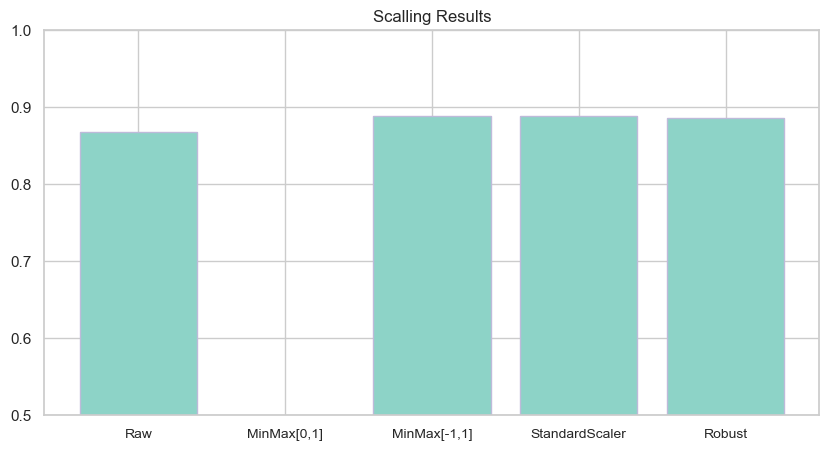

[0.8675603593486805, 0.1315272318921954, 0.8884053902302077, 0.8884053902302077, 0.8848961257720381]


In [225]:
#classifier = MLPClassifier(random_state = 42).fit(X_train, y_train['readmitted_binary'])

# Min Max [0, 1]
#min_max = MinMaxScaler().fit(X_train)
#min_max_X_train = min_max.transform(X_train)
#min_max_X_val = min_max.transform(X_val)
#model_min_max = classifier.fit(min_max_X_train, y_train['readmitted_binary'])

# Min Max [-1, 1]
#min_max2 = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
#min_max2_X_train = min_max2.transform(X_train)
#min_max2_X_val = min_max2.transform(X_val)
#model_min_max2 = classifier.fit(min_max2_X_train, y_train['readmitted_binary'])

# Standard Scaler
#standard = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
#standard_X_train = standard.transform(X_train)
#standard_X_val = standard.transform(X_val)
#model_standard = classifier.fit(standard_X_train, y_train['readmitted_binary'])

# Robust
#robust = RobustScaler().fit(X_train)
#robust_X_train = robust.transform(X_train)
#robust_X_val = robust.transform(X_val)
#model_robust = classifier.fit(robust_X_train, y_train['readmitted_binary'])

# Scoring
#x = ['Raw','MinMax[0,1]','MinMax[-1,1]','StandardScaler','Robust']
#y = [classifier.score(X_val, y_val['readmitted_binary']),
#     model_min_max.score(min_max_X_val, y_val['readmitted_binary']), 
#     model_min_max2.score(min_max2_X_val, y_val['readmitted_binary']),
#     model_standard.score(standard_X_val, y_val['readmitted_binary']),
#     model_robust.score(robust_X_val, y_val['readmitted_binary'])]
  
#plt.figure(figsize = (10,5))
#plt.bar(x, y, color = palette[0], edgecolor = palette[2])

#plt.title('Scalling Results')
#plt.xticks(fontsize = 10,)
#plt.ylim([0.5,1])

#plt.show()
#print(y)

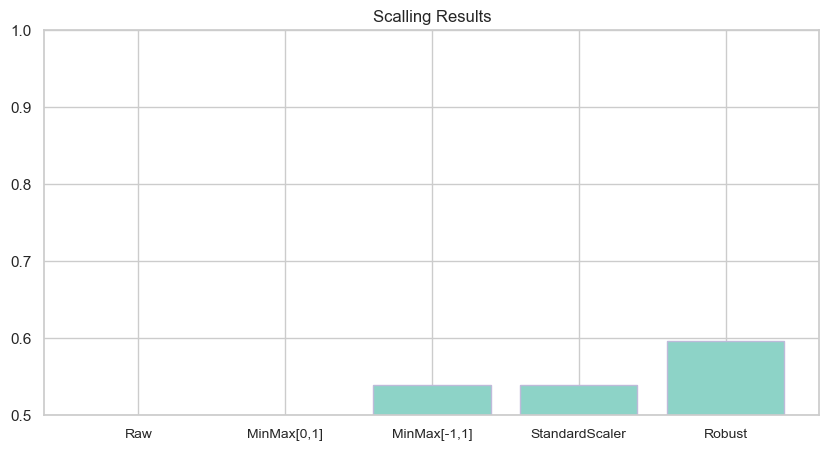

[0.4534671532846715, 0.4032846715328467, 0.539093206064009, 0.539093206064009, 0.5963644020213363]


In [226]:
#classifier = MLPClassifier().fit(X_train, y_train['readmitted_multiclass'])

# Min Max [0, 1]
#min_max = MinMaxScaler().fit(X_train)
#min_max_X_train = min_max.transform(X_train)
#min_max_X_val = min_max.transform(X_val)
#model_min_max = classifier.fit(min_max_X_train, y_train['readmitted_multiclass'])

# Min Max [-1, 1]
#min_max2 = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
#min_max2_X_train = min_max2.transform(X_train)
#min_max2_X_val = min_max2.transform(X_val)
#model_min_max2 = classifier.fit(min_max2_X_train, y_train['readmitted_multiclass'])

# Standard Scaler
#standard = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
#standard_X_train = standard.transform(X_train)
#standard_X_val = standard.transform(X_val)
#model_standard = classifier.fit(standard_X_train, y_train['readmitted_multiclass'])

# Robust
#robust = RobustScaler().fit(X_train)
#robust_X_train = robust.transform(X_train)
#robust_X_val = robust.transform(X_val)
#model_robust = classifier.fit(robust_X_train, y_train['readmitted_multiclass'])

# Scoring
#x = ['Raw','MinMax[0,1]','MinMax[-1,1]','StandardScaler','Robust']
#y = [classifier.score(X_val, y_val['readmitted_multiclass']),
#     model_min_max.score(min_max_X_val, y_val['readmitted_multiclass']), 
#     model_min_max2.score(min_max2_X_val, y_val['readmitted_multiclass']),
#     model_standard.score(standard_X_val, y_val['readmitted_multiclass']),
#     model_robust.score(robust_X_val, y_val['readmitted_multiclass'])]
  
#plt.figure(figsize = (10,5))
#plt.bar(x, y, color = palette[0], edgecolor = palette[2])

#plt.title('Scalling Results')
#plt.xticks(fontsize = 10,)
#plt.ylim([0.5,1])

#plt.show()
#print(y)

We decided to go with Robust scaler, since the result were slightly better.

In [227]:
X_train = r_train_num_scaled
X_val = r_val_num_scaled
test = r_test_num_scaled

In [228]:
#y_train

readmitted_multiclass  readmitted_binary
34735                      1                  0
16245                      2                  0
18564                      1                  0
11456                      1                  0
9623                       2                  0
...                      ...                ...
41774                      1                  0
68858                      1                  0
11943                      2                  0
36866                      2                  0
9276                       1                  0

[55330 rows x 2 columns]

In [229]:
y_train = y_train.loc[X_train.index]
y_train

readmitted_multiclass  readmitted_binary
34735                      1                  0
16245                      2                  0
18564                      1                  0
11456                      1                  0
9623                       2                  0
...                      ...                ...
41774                      1                  0
68858                      1                  0
11943                      2                  0
36866                      2                  0
9276                       1                  0

[55330 rows x 2 columns]

## Feature Selection

### Corelation Matrix

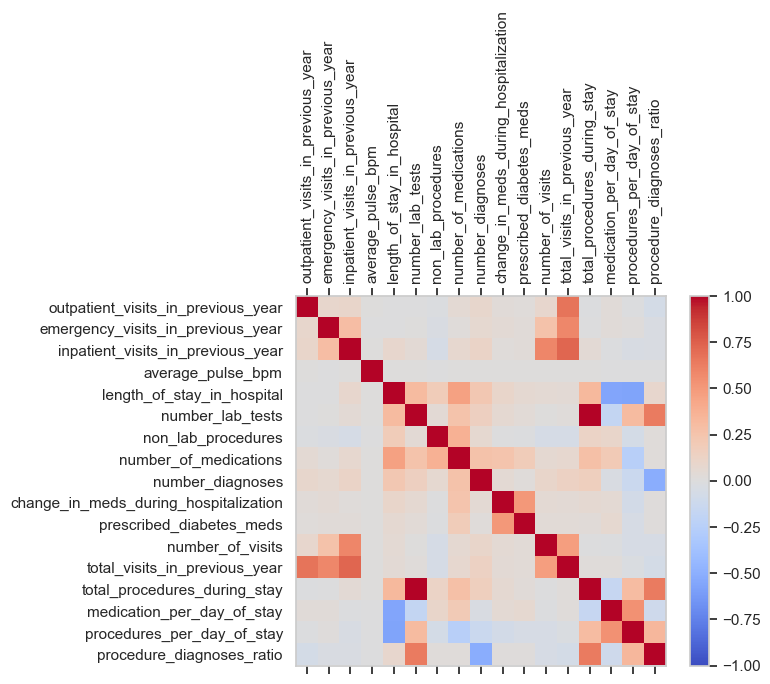

In [230]:
#corr = X_train_num.corr()

#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
#fig.colorbar(cax)

#ax.grid(False)

#ticks = np.arange(0,len(X_train_num.columns),1)
#ax.set_xticks(ticks)
#plt.xticks(rotation=90)
#ax.set_yticks(ticks)
#ax.set_xticklabels(X_train_num.columns)
#ax.set_yticklabels(X_train_num.columns)

#plt.show()

We can observe that outpatient_visits_in_previous_year, emergency_visits_in_previous_year and inpatient_visits_in_previous_year is highly correlated with total_visits_in_previous_year, so it's possible that we discard the 3 and keep this one.  

### Chi-Square for Categorical Data

In [231]:
#def TestIndependenceBinary(X,y,var,alpha=0.05):        
#    dfObserved = pd.crosstab(y,X) 
#    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
#    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
#    if p<alpha:
#        result="{0} is IMPORTANT for Prediction".format(var)
#    else:
#        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
#    print(result)

#for var in X_train_cat:
#    TestIndependenceBinary(X_train_cat[var],y_train['readmitted_binary'], var)

race is NOT an important predictor. (Discard race from model)
gender is NOT an important predictor. (Discard gender from model)
age is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is NOT an important predictor. (Discard admission_type from model)
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
medication is IMPORTANT for Prediction


In [232]:
#def TestIndependenceMultiClass(X,y,var,alpha=0.05):        
#    dfObserved = pd.crosstab(y,X) 
#    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
#    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
#    if p<alpha:
#        result="{0} is IMPORTANT for Prediction".format(var)
#    else:
#        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
#    print(result)

#for var in X_train_cat:
#    TestIndependenceMultiClass(X_train_cat[var],y_train['readmitted_multiclass'], var)

race is IMPORTANT for Prediction
gender is IMPORTANT for Prediction
age is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
medication is IMPORTANT for Prediction


### RFE (LogisticRegression)

By using the code provided in class, let's see the best number of features for logistic regression.

In [233]:
#nof_list=np.arange(1,8)            
#high_score=0

#nof=0           
#train_score_list =[]
#val_score_list = []

#for n in range(len(nof_list)):
#    model = LogisticRegression()
    
#    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
#    X_train_rfe = rfe.fit_transform(X_train_num,y_train.readmitted_binary)
#    X_val_rfe = rfe.transform(X_val_num)
#    model.fit(X_train_rfe,y_train.readmitted_binary)

#    train_score = model.score(X_train_rfe,y_train.readmitted_binary)
#    train_score_list.append(train_score)

#    val_score = model.score(X_val_rfe,y_val.readmitted_binary)
#    val_score_list.append(val_score)

#   if(val_score >= high_score):
#       high_score = val_score
#       nof = nof_list[n]
#print("Optimum number of features: %d" %nof)
#print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.888405


In [234]:
#modelLR = LogisticRegression()
#rfeLR = RFE(estimator = modelLR, n_features_to_select = 7)

In [235]:
#X_rfeLR_binary = rfeLR.fit_transform(X = X_train_num, y = y_train.readmitted_binary)

#X_rfeLR_multiclass = rfeLR.fit_transform(X = X_train_num, y = y_train.readmitted_multiclass)

In [236]:
#binary_selected_features_LR = pd.Series(rfeLR.support_, index = X_train_num.columns)
#binary_selected_features_LR = binary_selected_features_LR[binary_selected_features_LR == True].index
#print(binary_selected_features_LR)

#multiclass_selected_features_LR = pd.Series(rfeLR.support_, index = X_train_num.columns)
#multiclass_selected_features_LR = multiclass_selected_features_LR[multiclass_selected_features_LR == True].index
#print(multiclass_selected_features_LR)

Index(['emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'number_diagnoses',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'number_of_visits', 'total_visits_in_previous_year'],
      dtype='object')
Index(['emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'number_diagnoses',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'number_of_visits', 'total_visits_in_previous_year'],
      dtype='object')


### RFE (GradientBoostingClassifier)

By using the code provided in class, let's see the best number of features for GradientBoostingClassifier.

In [237]:
#nof_list=np.arange(1,10)            
#high_score=0

#nof=0           
#train_score_list =[]
#val_score_list = []

#for n in range(len(nof_list)):
#    model = GradientBoostingClassifier()
    
#    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
#    X_train_rfe = rfe.fit_transform(X_train_num,y_train.readmitted_binary)
#   X_val_rfe = rfe.transform(X_val_num)
#    model.fit(X_train_rfe,y_train.readmitted_binary)

#    train_score = model.score(X_train_rfe,y_train.readmitted_binary)
#    train_score_list.append(train_score)

#    val_score = model.score(X_val_rfe,y_val.readmitted_binary)
#    val_score_list.append(val_score)

#    if(val_score >= high_score):
#        high_score = val_score
#        nof = nof_list[n]
#print("Optimum number of features: %d" %nof)
#print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.888616


2 features a very low number os features, so let's use the same amount as for LogisticRegression

In [238]:
#modelGBC = GradientBoostingClassifier()
#rfeGBC = RFE(estimator = modelGBC, n_features_to_select = 7)

In [239]:
#X_rfeGBC_binary = rfeGBC.fit_transform(X = X_train_num, y = y_train.readmitted_binary)

#X_rfeGBC_multiclass = rfeGBC.fit_transform(X = X_train_num, y = y_train.readmitted_multiclass)

In [240]:
#binary_selected_features_GBC = pd.Series(rfeGBC.support_, index = X_train_num.columns)
#binary_selected_features_GBC = binary_selected_features_GBC[binary_selected_features_GBC == True].index
#print(binary_selected_features_GBC)

#multiclass_selected_features_GBC = pd.Series(rfeGBC.support_, index = X_train_num.columns)
#multiclass_selected_features_GBC = multiclass_selected_features_GBC[multiclass_selected_features_GBC == True].index
#print(multiclass_selected_features_GBC)

Index(['inpatient_visits_in_previous_year', 'number_of_medications',
       'number_diagnoses', 'number_of_visits', 'total_visits_in_previous_year',
       'total_procedures_during_stay', 'procedures_per_day_of_stay'],
      dtype='object')
Index(['inpatient_visits_in_previous_year', 'number_of_medications',
       'number_diagnoses', 'number_of_visits', 'total_visits_in_previous_year',
       'total_procedures_during_stay', 'procedures_per_day_of_stay'],
      dtype='object')


### RFE (DecisionTree)

By using the code provided in class, let's see the best number of features for DecisionTree.

In [241]:
#nof_list=np.arange(1,10)            
#high_score=0

#nof=0           
#train_score_list =[]
#val_score_list = []

#for n in range(len(nof_list)):
#    model = RandomForestClassifier()
    
#    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
#    X_train_rfe = rfe.fit_transform(X_train_num,y_train.readmitted_binary)
#    X_val_rfe = rfe.transform(X_val_num)
#    model.fit(X_train_rfe,y_train.readmitted_binary)

#    train_score = model.score(X_train_rfe,y_train.readmitted_binary)
#    train_score_list.append(train_score)

#    val_score = model.score(X_val_rfe,y_val.readmitted_binary)
#    val_score_list.append(val_score)

#    if(val_score >= high_score):
#        high_score = val_score
#        nof = nof_list[n]
#print("Optimum number of features: %d" %nof)
#print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.888265


Same as before, the best value was to small, so we decided to go it the same amount as LogisticRegression.

In [242]:
#modelDT = DecisionTreeClassifier()
#rfeDT = RFE(estimator = modelDT, n_features_to_select = 7)

In [243]:
#X_rfeDT_binary = rfeDT.fit_transform(X = X_train_num, y = y_train.readmitted_binary)

#X_rfeDT_multiclass = rfeDT.fit_transform(X = X_train_num, y = y_train.readmitted_multiclass)#

In [244]:
#binary_selected_features_DT = pd.Series(rfeDT.support_, index = X_train_num.columns)
#binary_selected_features_DT = binary_selected_features_DT[binary_selected_features_DT == True].index
#print(binary_selected_features_DT)

#multiclass_selected_features_DT = pd.Series(rfeDT.support_, index = X_train_num.columns)
#multiclass_selected_features_DT = multiclass_selected_features_DT[multiclass_selected_features_DT == True].index
#print(multiclass_selected_features_DT)

Index(['average_pulse_bpm', 'number_lab_tests', 'number_of_medications',
       'number_of_visits', 'medication_per_day_of_stay',
       'procedures_per_day_of_stay', 'procedure_diagnoses_ratio'],
      dtype='object')
Index(['average_pulse_bpm', 'number_lab_tests', 'number_of_medications',
       'number_of_visits', 'medication_per_day_of_stay',
       'procedures_per_day_of_stay', 'procedure_diagnoses_ratio'],
      dtype='object')


### Lasso Regression

In [245]:
#reg = LassoCV()

In [246]:
#reg.fit(X_train_num, y_train.readmitted_binary)
#coef_binary = pd.Series(reg.coef_, index = X_train_num.columns)
#print("Lasso picked " 
#      + str(sum(coef_binary != 0)) 
#      + " variables and eliminated the other " 
#      +  str(sum(coef_binary == 0)) 
#      + " variables")

Lasso picked 16 variables and eliminated the other 1 variables


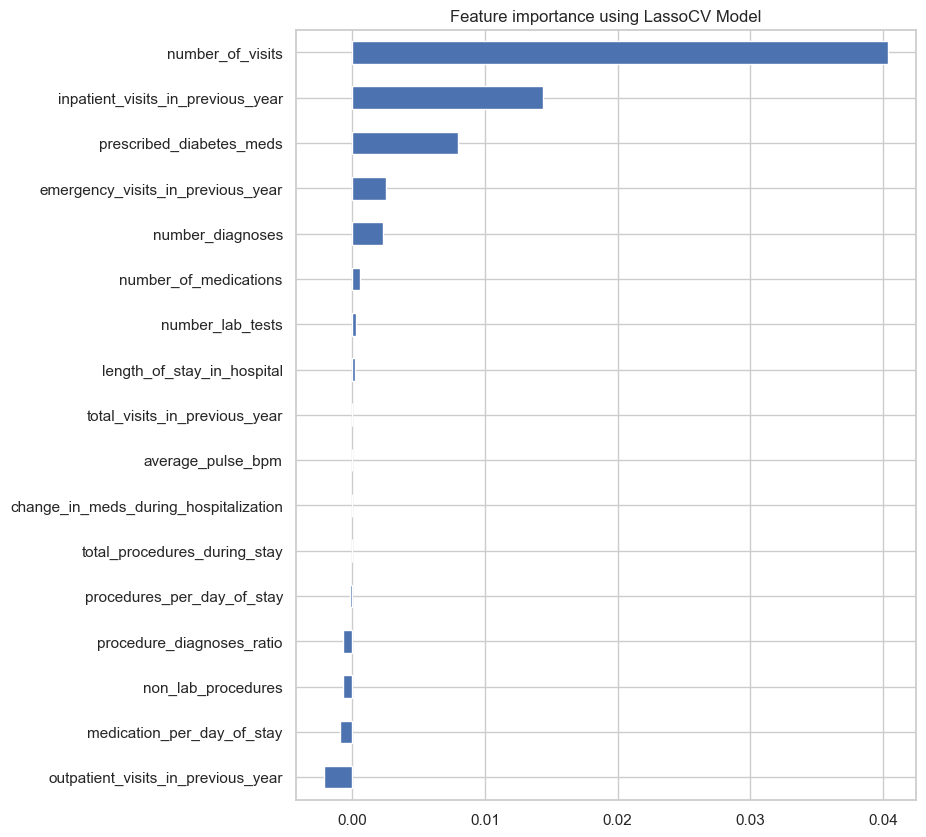

In [247]:
#imp_coef = coef_binary.sort_values()
#plt.figure(figsize=(8,10))
#imp_coef.plot(kind = "barh")
#plt.title("Feature importance using " + 'LassoCV' + " Model")
#plt.show()

### Numerical Data

|                             Predictor | Pearson | RFE LR | RFE GBC | RFE DT | LassoCV | Decisons |
|--------------------------------------:|---------|--------|---------|--------|---------|----------|
| outpatient_visits_in_previous_year    | Drop    | Keep   | Drop    | Drop   | Keep    | Drop     |
| emergency_visits_in_previous_year     | Drop    | Keep   | Drop    | Drop   | Keep    | Drop     |
| inpatient_visits_in_previous_year     | Drop    | Keep   | Keep    | Drop   | Keep    | Keep     |
| average_pulse_bpm                     | Keep    | Drop   | Drop    | Keep   | Drop    | Keep     |
| length_of_stay_in_hospital            | Keep    | Drop   | Drop    | Drop   | Drop    | Drop     |
| number_lab_tests                      | Drop?   | Drop   | Drop    | Keep   | Drop    | Drop?    |
| non_lab_procedures                    | Keep    | Drop   | Drop    | Drop   | Drop    | Drop     |
| number_of_medications                 | Keep    | Drop   | Keep    | Keep   | Keep    | Keep     |
| number_diagnoses                      | Keep    | Keep   | Keep    | Drop   | Keep    | Keep     |
| change_in_meds_during_hospitalization | Keep?   | Drop   | Drop    | Drop   | Drop    | Drop     |
| prescribed_diabetes_meds              | Keep?   | Drop   | Drop    | Drop   | Drop    | Drop     |
| total_visits_in_previous_year         | Keep    | Keep   | Keep    | Drop   | Drop    | Keep     |
| total_procedures_during_stay          | Keep    | Drop   | Keep    | Drop   | Drop    | Drop     |
| medication_per_day_of_stay            | Keep    | Keep   | Drop    | Keep   | Keep    | Keep     |
| procedures_per_day_of_stay            | Keep    | Drop   | Keep    | Keep   | Keep    | Keep     |
| procedure_diagnosis_ratio             | Keep?   | Drop   | Drop    | Keep   | Drop    | Keep?    |  
| number_of_vistis                      | Keep    | Keep   | Keep    | Keep   | Keep    | Keep     |  

### Categorical Data

|       Predictor       | Chi-Square |
|:---------------------:|:----------:|
| race                  | Drop       |
| gender                | Drop       |
| age                   | Keep       |
| payer_code            | Keep       |
| admission_type        | Drop       |
| discharge_disposition | Keep       |
| admission_source      | Keep       |
| primary_diagnosis     | Keep       |
| secondary_diagnosis   | Keep       |
| additional_diagnosis  | Keep       |
| glucose_test_result   | Keep       |
| a1c_test_result       | Keep       |
| medication            | Keep       |

<hr>

### The Final Drop And Last Prep

In [248]:
X_train.drop(['race', 'gender', 'payer_code','outpatient_visits_in_previous_year','emergency_visits_in_previous_year',
             'length_of_stay_in_hospital','number_lab_tests','non_lab_procedures','change_in_meds_during_hospitalization',
              'prescribed_diabetes_meds','total_procedures_during_stay','admission_type'], axis=1, inplace=True)

X_val.drop(['race', 'gender', 'payer_code','outpatient_visits_in_previous_year','emergency_visits_in_previous_year',
             'length_of_stay_in_hospital','number_lab_tests','non_lab_procedures','change_in_meds_during_hospitalization',
              'prescribed_diabetes_meds','total_procedures_during_stay','admission_type'], axis=1, inplace=True)

test.drop(['race', 'gender', 'payer_code','outpatient_visits_in_previous_year','emergency_visits_in_previous_year',
             'length_of_stay_in_hospital','number_lab_tests','non_lab_procedures','change_in_meds_during_hospitalization',
              'prescribed_diabetes_meds','total_procedures_during_stay','admission_type'], axis=1, inplace=True)

In [249]:
#X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55330 entries, 34735 to 9276
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   inpatient_visits_in_previous_year  55330 non-null  float64
 1   average_pulse_bpm                  55330 non-null  float64
 2   number_of_medications              55330 non-null  float64
 3   number_diagnoses                   55330 non-null  float64
 4   number_of_visits                   55330 non-null  float64
 5   total_visits_in_previous_year      55330 non-null  float64
 6   medication_per_day_of_stay         55330 non-null  float64
 7   procedures_per_day_of_stay         55330 non-null  float64
 8   procedure_diagnoses_ratio          55330 non-null  float64
 9   age                                55330 non-null  float64
 10  discharge_disposition              55330 non-null  float64
 11  admission_source                   55330 non-null  float

In [250]:
int64_columns = X_train.select_dtypes(include='int64').columns

X_train[int64_columns] = X_train[int64_columns].astype('int16')
X_val[int64_columns] = X_val[int64_columns].astype('int16')
test[int64_columns] = test[int64_columns].astype('int16')

In [251]:
float64_columns = X_train.select_dtypes(include='float64').columns

X_train[float64_columns] = X_train[float64_columns].astype('float16')
X_val[float64_columns] = X_val[float64_columns].astype('float16')
test[float64_columns] = test[float64_columns].astype('float16')

In [252]:
#X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55330 entries, 34735 to 9276
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   inpatient_visits_in_previous_year  55330 non-null  float16
 1   average_pulse_bpm                  55330 non-null  float16
 2   number_of_medications              55330 non-null  float16
 3   number_diagnoses                   55330 non-null  float16
 4   number_of_visits                   55330 non-null  float16
 5   total_visits_in_previous_year      55330 non-null  float16
 6   medication_per_day_of_stay         55330 non-null  float16
 7   procedures_per_day_of_stay         55330 non-null  float16
 8   procedure_diagnoses_ratio          55330 non-null  float16
 9   age                                55330 non-null  float16
 10  discharge_disposition              55330 non-null  float16
 11  admission_source                   55330 non-null  float

In [253]:
#X_train

inpatient_visits_in_previous_year  average_pulse_bpm  \
34735                                0.0          -0.199951   
16245                                3.0           0.125000   
18564                                0.0          -0.099976   
11456                                0.0          -0.700195   
9623                                 0.0          -0.625000   
...                                  ...                ...   
41774                                0.0          -0.049988   
68858                                0.0           0.674805   
11943                                0.0          -0.049988   
36866                                0.0          -0.600098   
9276                                 0.0           0.725098   

       number_of_medications  number_diagnoses  number_of_visits  \
34735               0.799805          0.333252               1.0   
16245              -0.399902         -0.333252               2.0   
18564               0.500000          0.333252               0.0   
11456               0.199951          0.333252               1.0   
9623               -0.099976          0.333252               0.0   
...                      ...               ...               ...   
41774               0.500000         -1.000000               1.0   
68858              -0.700195         -1.666992               4.0   
11943               1.200195         -1.000000               0.0   
36866               0.000000         -1.000000               0.0   
9276               -0.700195         -1.000000               0.0   

       total_visits_in_previous_year  medication_per_day_of_stay  \
34735                            0.0                    0.167847   
16245                            2.0                   -0.349609   
18564                            0.0                    0.000000   
11456                            0.0                    0.466309   
9623                             0.0                    0.839355   
...                              ...                         ...   
41774                            0.0                   -0.419678   
68858                            0.5                   -0.373047   
11943                            0.0                    1.398438   
36866                            0.0                   -0.419678   
9276                             0.0                    1.119141   

       procedures_per_day_of_stay  procedure_diagnoses_ratio  age  \
34735                   -0.061096                  -0.062500 -1.0   
16245                   -0.131958                  -0.146484  0.0   
18564                    0.222168                   0.437500  0.0   
11456                   -0.916504                  -1.591797 -1.0   
9623                    -0.694336                  -1.445312  0.0   
...                           ...                        ...  ...   
41774                   -0.527832                   0.496338 -1.0   
68858                    0.333252                   2.437500 -1.0   
11943                    0.416748                   0.972656  0.0   
36866                   -0.069458                   1.713867 -1.0   
9276                    -0.111084                  -1.091797 -1.0   

       discharge_disposition  admission_source  primary_diagnosis  \
34735               0.000000              1.00          -0.069519   
16245               0.399902              1.50           1.166016   
18564               1.799805              0.00           0.876953   
11456               0.000000              0.00           1.166016   
9623                0.000000              1.00          -0.213867   
...                      ...               ...                ...   
41774               0.000000              1.75          -0.946289   
68858               0.000000              0.00          -0.946289   
11943               0.000000              1.00           0.668457   
36866               0.000000              1.75           0.470703   
9276                0.000000

In [254]:
#print(X_train.shape)
#print(y_train.shape)
#print(X_val.shape)
#print(y_val.shape)
#print(test.shape)


(55330, 18)
(55330, 2)
(14248, 18)
(14248, 2)
(30530, 18)


# Models

## Binary Classification

In [255]:
X_train_binary = X_train
y_train_binary = y_train['readmitted_binary']

X_val_binary = X_val
y_val_binary = y_val['readmitted_binary']

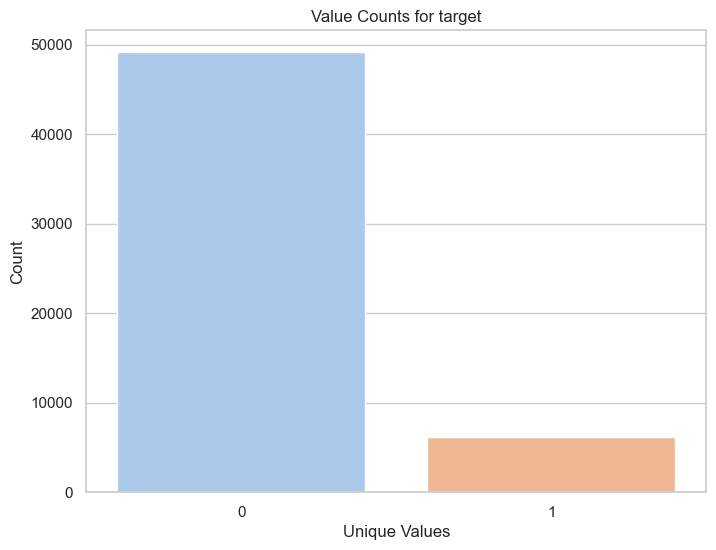

In [256]:
#plt.figure(figsize=(8, 6))
#sns.countplot(x = y_train_binary, palette='pastel')
#plt.title('Value Counts for target')
#plt.xlabel('Unique Values')
#plt.ylabel('Count')
#plt.show()

In [257]:
oversampler = SMOTE(random_state = 42)
X_train_res, y_train_res = oversampler.fit_resample(X_train_binary, y_train_binary)

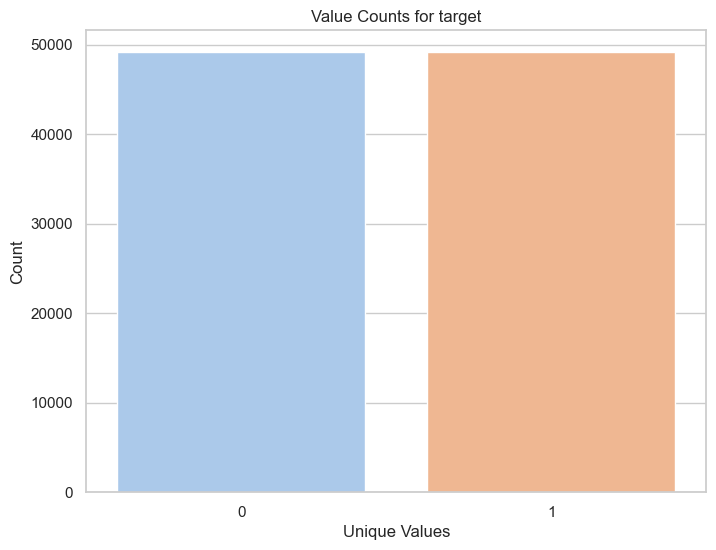

In [258]:
#plt.figure(figsize=(8, 6))
#sns.countplot(x = y_train_res, palette='pastel')
#plt.title('Value Counts for target')
#plt.xlabel('Unique Values')
#plt.ylabel('Count')
#plt.show()

### Functions

In [259]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))


In [260]:
def avg_score(model):
    
    skf = StratifiedKFold(n_splits=10)

    score_train = []
    score_val = []
    timer = []
    n_iter = []
    
    for train_index, val_index in skf.split(X_train_res,y_train_res):

        X_train, X_val = X_train_res.iloc[train_index], X_train_res.iloc[val_index]
        y_train, y_val = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

        begin = time.perf_counter()

        model.fit(X_train_res, y_train_res)

        end = time.perf_counter()

        value_train = f1_score(y_train_res, model.predict(X_train_res), pos_label=1)
 
        value_val = f1_score(y_val_binary, model.predict(X_val_binary), pos_label=1)

        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
 
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    
    for arg in args:
        time, avg_train, avg_val, avg_iter = avg_score(arg)
        df.iloc[count] = time, avg_train, avg_val, avg_iter
        count+=1
    return df

In [261]:
oversamplers = [SMOTE(random_state=42), 
                BorderlineSMOTE(random_state=42), 
                ADASYN(random_state=42), 
                RandomOverSampler(random_state=42)
               ]

undersamplers = [RandomUnderSampler(random_state=42), 
                 NearMiss(version=1, n_neighbors=3), 
                 NearMiss(version=3, n_neighbors=3), 
                 OneSidedSelection(random_state=42),
                 SMOTETomek(random_state=42), 
                 ]

In [262]:
def avg_oversampling_score(model, oversampler):

    skf = StratifiedKFold(n_splits=10)

    score_train = []
    score_val = []
    timer = []
    n_iter = []
    
    for train_index, val_index in skf.split(X_train_binary,y_train_binary):

        X_train, X_val = X_train_binary.iloc[train_index], X_train_binary.iloc[val_index]
        y_train, y_val = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

        begin = time.perf_counter()
    
        X_train_res, y_train_res = oversampler.fit_resample(X_train, y_train)
        model.fit(X_train_res, y_train_res)

        end = time.perf_counter()
        
        value_train = f1_score(y_train_res, model.predict(X_train_res))
        
        value_val = f1_score(y_val, model.predict(X_val))
        
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)

    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

def show_oversampling_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0

    for arg in args:
        print("starting", arg[1])
 
        time, avg_train, avg_val, avg_iter = avg_oversampling_score(arg[0], arg[1])

        df.iloc[count] = time, avg_train, avg_val, avg_iter

        count+=1
    return df

In [263]:
def model_df(model_list,scaled_X_val, y_val):
    model_str = [str(model) for model in model_list]
    model_str = [model.split('(', 1)[0] for model in model_str]
    model_name = [' '.join(re.findall('[A-Z][^A-Z]*', model)) for model in model_str]
    
    df = pd.DataFrame(columns = ['Model', 'F1-Score', 'Accuracy', 'Precision', 'Recall', 'AUC', 'Matthews', 'F1-Score.kaggle'])

    for model in range(len(model_list)):
        print(model_list[model], 'is starting...')
        instance = model_list[model]
        y_pred = instance.predict(scaled_X_val)

        f1 = f1_score(y_val, y_pred, average = 'weighted')
        accuracy = balanced_accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average = 'weighted')
        recall = recall_score(y_val, y_pred, average = 'weighted')
        roc = roc_auc_score(y_val, y_pred, average = 'weighted')
        matthews = matthews_corrcoef(y_val, y_pred)
        f1k = f1_score(y_val, y_pred)

        df.loc[model] = [model_name[model], f1, accuracy, precision, recall, roc, matthews, f1k]
        print(model_list[model], '...done')

    df.sort_values(by='F1-Score.kaggle', ascending=False, inplace=True)
    df.set_index('Model', inplace = True)
    
    return df

### Benchmark Binary

In [264]:
#seed = 42

#DT_model = DecisionTreeClassifier(random_state=seed).fit(X_train_res, y_train_res)
#print('DT_model running...')
#RF_model = RandomForestClassifier(random_state=seed).fit(X_train_res, y_train_res)
#print('RF_model running...')
#LR_model = LogisticRegression(random_state=seed).fit(X_train_res, y_train_res)
#print('LR_model running...')
#KNN_model = KNeighborsClassifier().fit(X_train_res, y_train_res)
#print('KNN_model running...')
#Gaussian_model = GaussianNB().fit(X_train_res, y_train_res)
#print('Gaussian_model running...')
#NN_model = MLPClassifier(random_state=seed).fit(X_train_res, y_train_res)
#print('NN_model running...')

#estimators = [
#    ('LR', LogisticRegression(random_state = seed)), 
#    ('KNN', KNeighborsClassifier()),
#    ('Gaussian', GaussianNB()), 
#    ('NN', MLPClassifier(max_iter = 5000, random_state = seed))
#              ]
#print('V_model running')
#V_model = VotingClassifier(estimators, verbose = 4).fit(X_train_res, y_train_res)
#print('All models are done, bamm!')

#models = [DT_model, RF_model, LR_model, KNN_model,Gaussian_model, 
#          NN_model, V_model]

DT_model running...
RF_model running...
LR_model running...
KNN_model running...
Gaussian_model running...
NN_model running...
V_model running
[Voting] ....................... (1 of 4) Processing LR, total=   0.1s
[Voting] ...................... (2 of 4) Processing KNN, total=   0.0s
[Voting] ................. (3 of 4) Processing Gaussian, total=   0.1s
[Voting] ....................... (4 of 4) Processing NN, total= 1.7min
All models are done, bamm!


In [265]:
#base_model = model_df(models, X_val_binary, y_val_binary)
#base_model

DecisionTreeClassifier(random_state=42) is starting...
DecisionTreeClassifier(random_state=42) ...done
RandomForestClassifier(random_state=42) is starting...
RandomForestClassifier(random_state=42) ...done
LogisticRegression(random_state=42) is starting...
LogisticRegression(random_state=42) ...done
KNeighborsClassifier() is starting...
KNeighborsClassifier() ...done
GaussianNB() is starting...
GaussianNB() ...done
MLPClassifier(random_state=42) is starting...
MLPClassifier(random_state=42) ...done
VotingClassifier(estimators=[('LR', LogisticRegression(random_state=42)),
                             ('KNN', KNeighborsClassifier()),
                             ('Gaussian', GaussianNB()),
                             ('NN',
                              MLPClassifier(max_iter=5000, random_state=42))],
                 verbose=4) is starting...
VotingClassifier(estimators=[('LR', LogisticRegression(random_state=42)),
                             ('KNN', KNeighborsClassifier()),
         

F1-Score  Accuracy  Precision    Recall       AUC  \
Model                                                                         
Logistic Regression       0.783924  0.579509   0.827728  0.752176  0.579509   
M L P Classifier          0.765185  0.563595   0.822310  0.725365  0.563595   
K Neighbors Classifier    0.743288  0.551123   0.818256  0.693922  0.551123   
Decision Tree Classifier  0.743901  0.519397   0.807987  0.698133  0.519397   
Random Forest Classifier  0.834222  0.534179   0.820003  0.852400  0.534179   
Voting Classifier         0.840485  0.531359   0.823618  0.867420  0.531359   
Gaussian N B              0.835905  0.500000   0.789264  0.888405  0.500000   

                          Matthews  F1-Score.kaggle  
Model                                                
Logistic Regression       0.121680         0.243411  
M L P Classifier          0.093460         0.224073  
K Neighbors Classifier    0.071982         0.211250  
Decision Tree Classifier  0.028031         0.176211  
Random Forest Classifier  0.088070         0.158463  
Voting Classifier         0.097322         0.142533  
Gaussian N B              0.000000         0.000000

### Neural Networks (MLPClassifier)

#### Hidden layers
__Some rule of thumb:__
-	The number of hidden neurons should be between the size of the input layer and the size of the output layer
-	The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
-	The number of hidden neurons should be less than twice the size of the input layer

In [266]:
#model_simple = MLPClassifier(hidden_layer_sizes=(8), random_state=42)
#model_medium = MLPClassifier(hidden_layer_sizes=(8,8), random_state=42)
#model_complex = MLPClassifier(hidden_layer_sizes=(8,8,8), random_state=42)

#df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Simple','Medium','Complex'])
#show_results(df, model_simple, model_medium, model_complex)

Time        Train   Validation   Iterations
Simple   12.093+/-0.07  0.721+/-0.0  0.264+/-0.0  165.0+/-0.0
Medium   17.475+/-0.15  0.734+/-0.0  0.272+/-0.0  181.0+/-0.0
Complex  26.533+/-0.21  0.741+/-0.0  0.261+/-0.0  200.0+/-0.0

####  Learning Rate

In [267]:
#model_low = MLPClassifier(learning_rate_init = 0.01, random_state=42)
#model_medium = MLPClassifier(learning_rate_init = 0.05, random_state=42)
#model_high = MLPClassifier(learning_rate_init = 0.1, random_state=42)

#df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Low','Medium','High'])
#show_results(df, model_low, model_medium, model_high)

Time        Train   Validation   Iterations
Low     47.366+/-2.25  0.817+/-0.0  0.215+/-0.0  148.0+/-0.0
Medium   56.03+/-3.93  0.757+/-0.0  0.245+/-0.0   79.0+/-0.0
High      6.38+/-0.57  0.731+/-0.0  0.271+/-0.0   25.0+/-0.0

#### Solver Function

In [268]:
#model_adam = MLPClassifier(solver='adam', random_state=42)
#model_sgd = MLPClassifier(solver='sgd', random_state=42)

#df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['sgd','adam'])
#show_results(df, model_sgd, model_adam)

Time        Train         Test   Iterations
sgd   63.654+/-5.12  0.739+/-0.0  0.248+/-0.0  200.0+/-0.0
adam  64.511+/-3.33  0.817+/-0.0  0.224+/-0.0  200.0+/-0.0

#### Learning Rate (SGD Only)

In [269]:
#model_constant = MLPClassifier(solver = 'sgd', learning_rate = 'constant', random_state=42)
#model_invscaling = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling', random_state=42)
#model_adaptive = MLPClassifier(solver = 'sgd', learning_rate = 'adaptive', random_state=42)

#df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['constant','invscaling','adaptive'])
#show_results(df, model_constant, model_invscaling, model_adaptive)

Time        Train         Test   Iterations
constant    59.192+/-1.08  0.739+/-0.0  0.248+/-0.0  200.0+/-0.0
invscaling   3.899+/-0.33  0.614+/-0.0  0.242+/-0.0   13.0+/-0.0
adaptive    63.922+/-3.27  0.739+/-0.0  0.248+/-0.0  200.0+/-0.0

#### Power_t (SGD with inverse scaling only)

In [270]:
#model_low = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling', power_t = 0.25,random_state=42)
#model_mid = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling', power_t = 0.5,random_state=42)
#model_high = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling', power_t = 0.75,random_state=42)

#df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['0.25','0.50','0.75'])
#show_results(df, model_low, model_mid, model_high)

Time        Train         Test  Iterations
0.25  23.713+/-2.04  0.628+/-0.0  0.258+/-0.0  76.0+/-0.0
0.50     3.8+/-0.11  0.614+/-0.0  0.242+/-0.0  13.0+/-0.0
0.75    3.811+/-0.1  0.615+/-0.0  0.242+/-0.0  13.0+/-0.0

#### Optimized Model

In [271]:
#mlp_model = MLPClassifier(max_iter=1000,alpha=0.0001, early_stopping=False, hidden_layer_sizes=(15,15,15), 
#                            learning_rate='constant', learning_rate_init=0.05, power_t=0.25, solver='adam')

#mlp_model.fit(X_train_res, y_train_res)

#y_pred_train = mlp_model.predict(X_train_res)

#y_pred_val = mlp_model.predict(X_val_binary)

#f1_score(y_val_binary, y_pred_val)

0.2610491532424618

In [272]:
#metrics(y_train_res, y_pred_train , y_val_binary, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     49144
           1       0.72      0.76      0.74     49144

    accuracy                           0.74     98288
   macro avg       0.74      0.74      0.73     98288
weighted avg       0.74      0.74      0.73     98288

[[34913 14231]
 [11804 37340]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Oversampling

In [273]:
#df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], 
#                  index = ['SMOTE','BorderlineSMOTE','ADASYN','RandomOverSampler'])

#show_oversampling_results(df, 
#                          [mlp_model, oversamplers[0]], 
#                          [mlp_model, oversamplers[1]],
#                          [mlp_model, oversamplers[2]], 
#                          [mlp_model, oversamplers[3]])

starting SMOTE(random_state=42)
starting BorderlineSMOTE(random_state=42)
starting ADASYN(random_state=42)
starting RandomOverSampler(random_state=42)


Time         Train    Validation Iterations
SMOTE               7.743+/-6.38  0.735+/-0.01  0.303+/-0.01  nan+/-nan
BorderlineSMOTE    10.641+/-1.54  0.765+/-0.01  0.305+/-0.01  nan+/-nan
ADASYN             11.399+/-2.59  0.734+/-0.01  0.293+/-0.01  nan+/-nan
RandomOverSampler   4.743+/-1.77  0.692+/-0.02  0.312+/-0.01  nan+/-nan

### Undersampling

In [274]:
#df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'],
#                  index = ['RandomUnderSampler','NearMiss1','NearMiss3','OneSidedSelection', 'SMOTETomek'])

#show_oversampling_results(df, 
#                          [mlp_model, undersamplers[0]], 
#                          [mlp_model, undersamplers[1]], 
#                          [mlp_model, undersamplers[2]], 
#                          [mlp_model, undersamplers[3]], 
#                          [mlp_model, undersamplers[4]], 
#                          )

starting RandomUnderSampler(random_state=42)
starting NearMiss()
starting NearMiss(version=3)
starting OneSidedSelection(random_state=42)
starting SMOTETomek(random_state=42)


Time         Train    Validation Iterations
RandomUnderSampler   0.885+/-0.26   0.69+/-0.01   0.31+/-0.01  nan+/-nan
NearMiss1            3.512+/-0.17  0.879+/-0.01    0.22+/-0.0  nan+/-nan
NearMiss3            4.262+/-0.31  0.561+/-0.02  0.157+/-0.01  nan+/-nan
OneSidedSelection   28.899+/-0.56     0.0+/-0.0     0.0+/-0.0  nan+/-nan
SMOTETomek          85.019+/-6.11   0.73+/-0.01  0.305+/-0.01  nan+/-nan

### KNN Classifier

In [275]:
#knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='manhattan',n_neighbors=3, p=1, weights='distance')

In [276]:
#knn_model.fit(X_train_res, y_train_res)

#y_pred = knn_model.predict(X_val_binary)

#f1_score(y_val_binary, y_pred)

0.20068886337543054

### RandomForestClassifier

In [277]:
'''
random_forest_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None, 10, 20, 30, 50, 100],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_leaf_nodes': [10, 20, 50, None]
}

rf_model = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(estimator = rf_model, param_grid = random_forest_params, cv = 3, verbose=3, n_jobs = -1, scoring='f1')

rf_grid.fit(X_train_res, y_train_res)
'''

"\nrandom_forest_params = {\n    'n_estimators': [10, 50, 100, 200],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [None, 10, 20, 30, 50, 100],\n    'criterion' :['gini', 'entropy', 'log_loss'],\n    'max_leaf_nodes': [10, 20, 50, None]\n}\n\nrf_model = RandomForestClassifier(random_state=42)\n\nrf_grid = GridSearchCV(estimator = rf_model, param_grid = random_forest_params, cv = 3, verbose=3, n_jobs = -1, scoring='f1')\n\nrf_grid.fit(X_train_res, y_train_res)\n"

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'n_estimators': 10}

In [278]:
rf_classifier = RandomForestClassifier(random_state=42, criterion = 'gini', max_depth = 15,
                                       max_features = 'sqrt', max_leaf_nodes = 200, n_estimators = 200,
                                      min_samples_split = 200, min_samples_leaf = 100)

rf_classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42)

In [279]:
#labels_train_rf_final = rf_classifier.predict(X_train_res)
#labels_val_rf_final = rf_classifier.predict(X_val_binary)

#metrics(y_train_res, labels_train_rf_final, y_val_binary, labels_val_rf_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     49144
           1       0.84      0.83      0.84     49144

    accuracy                           0.84     98288
   macro avg       0.84      0.84      0.84     98288
weighted avg       0.84      0.84      0.84     98288

[[41317  7827]
 [ 8144 41000]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [280]:
#feature_scores = pd.Series(rf_classifier.feature_importances_, index=X_train_binary.columns).sort_values(ascending=False)
#feature_scores

number_of_visits                     0.315556
discharge_disposition                0.153579
total_visits_in_previous_year        0.108485
inpatient_visits_in_previous_year    0.091229
medication                           0.074529
number_diagnoses                     0.072775
age                                  0.047813
additional_diagnosis                 0.040429
secondary_diagnosis                  0.016774
number_of_medications                0.014401
admission_source                     0.013798
primary_diagnosis                    0.010505
a1c_test_result                      0.008683
average_pulse_bpm                    0.008081
medication_per_day_of_stay           0.007870
procedure_diagnoses_ratio            0.007743
procedures_per_day_of_stay           0.007695
glucose_test_result                  0.000055
dtype: float64

In [281]:
#X_train_multi_opt = X_train_res.drop(['glucose_test_result','a1c_test_result','age','admission_source','discharge_disposition','number_diagnoses','medication'], axis=1)

#X_val_multi_opt = X_val_binary.drop(['glucose_test_result','a1c_test_result','age','admission_source','discharge_disposition','number_diagnoses','medication'], axis=1)

In [282]:
#rf_classifier.fit(X_train_multi_opt, y_train_res)

RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42)

In [283]:
#labels_train_rf = rf_classifier.predict(X_train_multi_opt)
#labels_val_rf = rf_classifier.predict(X_val_multi_opt)

#metrics(y_train_res, labels_train_rf, y_val_binary, labels_val_rf)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     49144
           1       0.82      0.79      0.80     49144

    accuracy                           0.81     98288
   macro avg       0.81      0.81      0.81     98288
weighted avg       0.81      0.81      0.81     98288

[[40633  8511]
 [10552 38592]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

We can see that removing the not important features, give a slight worst result, so the best model to fit, will be with the features we add before.

### LogisticRegression

#### Default Model

In [284]:
#modelLR = LogisticRegression(max_iter=1000, random_state=42)

In [285]:
#modelLR.fit(X_train_res,y_train_res)
#labels_train_LR = modelLR.predict(X_train_res)
#labels_val_LR = modelLR.predict(X_val_binary)

#metrics(y_train_res, labels_train_LR, y_val_binary, labels_val_LR)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.75      0.68     49144
           1       0.68      0.54      0.60     49144

    accuracy                           0.65     98288
   macro avg       0.65      0.65      0.64     98288
weighted avg       0.65      0.65      0.64     98288

[[36937 12207]
 [22603 26541]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

#### Multiple Solver

In [286]:
#solver_values = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
#results = {'solver': [], 'train_f1': [], 'val_f1': []}

#for solver in solver_values:
#    modelLR_tuned = LogisticRegression(random_state=42, solver = solver)

#    modelLR_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, modelLR_tuned.predict(X_train_res))

#    val_f1_tree = f1_score(y_val_binary, modelLR_tuned.predict(X_val_binary))
    
#    results['solver'].append(solver)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

            solver  train_f1    val_f1
0            lbfgs  0.603946  0.243411
1        liblinear  0.603962  0.243411
2        newton-cg  0.603984  0.243411
3  newton-cholesky  0.603984  0.243411
4              sag  0.603930  0.243411
5             saga  0.603978  0.243411


#### Multiple Penalty

In [287]:
#penalty_values = ['l1', 'l2']
#results = {'penalty': [], 'train_f1': [], 'val_f1': []}

#for penalty in penalty_values:
#    modelLR_tuned = LogisticRegression(random_state=42, solver = 'liblinear' , penalty = penalty)

#    modelLR_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, modelLR_tuned.predict(X_train_res))

#    val_f1_tree = f1_score(y_val_binary, modelLR_tuned.predict(X_val_binary))
    
#    results['penalty'].append(penalty)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

  penalty  train_f1    val_f1
0      l1  0.603971  0.243787
1      l2  0.603962  0.243411


#### Final Model

In [288]:
#modelLR = LogisticRegression(max_iter=1000, random_state=42, solver = 'liblinear', penalty = 'l2')
#modelLR.fit(X_train_res,y_train_res)
#labels_train_LR = modelLR.predict(X_train_res)
#labels_val_LR = modelLR.predict(X_val_binary)

#metrics(y_train_res, labels_train_LR, y_val_binary, labels_val_LR)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.75      0.68     49144
           1       0.68      0.54      0.60     49144

    accuracy                           0.65     98288
   macro avg       0.65      0.65      0.64     98288
weighted avg       0.65      0.65      0.64     98288

[[36937 12207]
 [22602 26542]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Gaussian Naive Bayes

In [289]:
#model_NB = GaussianNB()

In [290]:
#model_NB.fit(X_train_res, y_train_res)

#labels_train_NB = model_NB.predict(X_train_res)
#labels_val_NB = model_NB.predict(X_val_binary)

#metrics(y_train_res, labels_train_NB, y_val_binary, labels_val_NB)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     49144
           1       0.00      0.00      0.00     49144

    accuracy                           0.50     98288
   macro avg       0.25      0.50      0.33     98288
weighted avg       0.25      0.50      0.33     98288

[[49144     0]
 [49144     0]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Ensemble Methods

In [291]:
#voting_model = VotingClassifier(estimators=[('mlp', mlp_model), ('knn', knn_model), ('rf', rf_classifier), 
#                                            ('lr', modelLR), ('gaussian', model_NB)], voting='soft')
#voting_model

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(hidden_layer_sizes=(15, 15, 15),
                                            learning_rate_init=0.05,
                                            max_iter=1000, power_t=0.25)),
                             ('knn',
                              KNeighborsClassifier(leaf_size=10,
                                                   metric='manhattan',
                                                   n_neighbors=3, p=1,
                                                   weights='distance')),
                             ('rf',
                              RandomForestClassifier(max_depth=15,
                                                     max_leaf_nodes=200,
                                                     min_samples_leaf=100,
                                                     min_samples_split=200,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear')),
                             ('gaussian', GaussianNB())],
                 voting='soft')

In [292]:
#voting_model.fit(X_train_res, y_train_res)

#y_pred_train = voting_model.predict(X_train_res)
#y_pred_val = voting_model.predict(X_val_binary)

#metrics(y_train_res, y_pred_train, y_val_binary, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     49144
           1       0.00      0.00      0.00     49144

    accuracy                           0.50     98288
   macro avg       0.25      0.50      0.33     98288
weighted avg       0.25      0.50      0.33     98288

[[49144     0]
 [49144     0]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [293]:
#voting_model = VotingClassifier(estimators=[('mlp', mlp_model), ('knn', knn_model), ('rf', rf_classifier), 
#                                            ('lr', modelLR), ('gaussian', model_NB)], voting='hard')
#voting_model

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(hidden_layer_sizes=(15, 15, 15),
                                            learning_rate_init=0.05,
                                            max_iter=1000, power_t=0.25)),
                             ('knn',
                              KNeighborsClassifier(leaf_size=10,
                                                   metric='manhattan',
                                                   n_neighbors=3, p=1,
                                                   weights='distance')),
                             ('rf',
                              RandomForestClassifier(max_depth=15,
                                                     max_leaf_nodes=200,
                                                     min_samples_leaf=100,
                                                     min_samples_split=200,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear')),
                             ('gaussian', GaussianNB())])

In [294]:
#voting_model.fit(X_train_res, y_train_res)

#y_pred_train = voting_model.predict(X_train_res)
#y_pred_val = voting_model.predict(X_val_binary)

#metrics(y_train_res, y_pred_train, y_val_binary, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     49144
           1       0.86      0.78      0.82     49144

    accuracy                           0.83     98288
   macro avg       0.83      0.83      0.83     98288
weighted avg       0.83      0.83      0.83     98288

[[43066  6078]
 [10616 38528]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Final Model

In [295]:
#seed = 42

#DT_model = DecisionTreeClassifier(max_depth = 4, min_samples_split =529, random_state = seed).fit(X_train_res, y_train_res)
#print('DT_model running...')

#RF_model = RandomForestClassifier(random_state=seed, criterion = 'gini', max_depth = 15,
#                                       max_features = 'sqrt', max_leaf_nodes = 200, n_estimators = 200,
#                                      min_samples_split = 200, min_samples_leaf = 100).fit(X_train_res, y_train_res)
#print('RF_model running...')

#LR_model = LogisticRegression(max_iter=1000, random_state=seed, solver = 'liblinear',
#                              penalty = 'l2').fit(X_train_res, y_train_res)
#print('LR_model running...')

#KNN_model = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='manhattan',n_neighbors=3, p=1,
#                                 weights='distance').fit(X_train_res, y_train_res)
#print('KNN_model running...')

#Gaussian_model = GaussianNB().fit(X_train_res, y_train_res).fit(X_train_res, y_train_res)
#print('Gaussian_model running...')

#NN_model = MLPClassifier(max_iter=1000,alpha=0.0001, early_stopping=False, hidden_layer_sizes=(15,15,15), 
#                         learning_rate='constant', learning_rate_init=0.05, power_t=0.25, 
#                         solver='adam').fit(X_train_res, y_train_res)
#print('NN_model running...')

#estimators = [
#    ('LR', LogisticRegression(max_iter=1000, random_state=seed, solver = 'liblinear', penalty = 'l2')), 
#    ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='manhattan',n_neighbors=3, p=1, weights='distance')),
#    ('Gaussian', GaussianNB()), 
#    ('NN', MLPClassifier(max_iter=1000,alpha=0.0001, early_stopping=False, hidden_layer_sizes=(15,15,15), 
#                         learning_rate='constant', learning_rate_init=0.05, power_t=0.25, 
#                         solver='adam'))
#              ]

#print('V_model running')
#V_model = VotingClassifier(estimators, verbose = 4, voting = 'hard').fit(X_train_res, y_train_res)
#print('All models are done, bamm!')

#models = [DT_model, RF_model, LR_model, KNN_model,Gaussian_model, 
#          NN_model, V_model]

DT_model running...
RF_model running...
LR_model running...
KNN_model running...
Gaussian_model running...
NN_model running...
V_model running
[Voting] ....................... (1 of 4) Processing LR, total=   0.2s
[Voting] ...................... (2 of 4) Processing KNN, total=   0.0s
[Voting] ................. (3 of 4) Processing Gaussian, total=   0.1s
[Voting] ....................... (4 of 4) Processing NN, total=   3.4s
All models are done, bamm!


In [296]:
#base_model = model_df(models, X_val_binary, y_val_binary)
#base_model

DecisionTreeClassifier(max_depth=4, min_samples_split=529, random_state=42) is starting...
DecisionTreeClassifier(max_depth=4, min_samples_split=529, random_state=42) ...done
RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42) is starting...
RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42) ...done
LogisticRegression(max_iter=1000, random_state=42, solver='liblinear') is starting...
LogisticRegression(max_iter=1000, random_state=42, solver='liblinear') ...done
KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=3, p=1,
                     weights='distance') is starting...
KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=3, p=1,
                     weights='distance') ...done
GaussianNB() is 

F1-Score  Accuracy  Precision    Recall       AUC  \
Model                                                                         
M L P Classifier          0.764352  0.593788   0.832025  0.720873  0.593788   
Random Forest Classifier  0.816572  0.584385   0.831534  0.803832  0.584385   
Logistic Regression       0.783924  0.579509   0.827728  0.752176  0.579509   
K Neighbors Classifier    0.782698  0.545464   0.816838  0.755685  0.545464   
Decision Tree Classifier  0.838884  0.545386   0.825801  0.856190  0.545386   
Voting Classifier         0.840547  0.540455   0.825670  0.862086  0.540455   
Gaussian N B              0.835905  0.500000   0.789264  0.888405  0.500000   

                          Matthews  F1-Score.kaggle  
Model                                                
M L P Classifier          0.134061         0.255940  
Random Forest Classifier  0.148033         0.255659  
Logistic Regression       0.121680         0.243411  
K Neighbors Classifier    0.072394         0.200689  
Decision Tree Classifier  0.116235         0.183990  
Voting Classifier         0.112195         0.169835  
Gaussian N B              0.000000         0.000000

In [297]:
#base_model.sort_values(by='Matthews', ascending=False)

F1-Score  Accuracy  Precision    Recall       AUC  \
Model                                                                         
Random Forest Classifier  0.816572  0.584385   0.831534  0.803832  0.584385   
M L P Classifier          0.764352  0.593788   0.832025  0.720873  0.593788   
Logistic Regression       0.783924  0.579509   0.827728  0.752176  0.579509   
Decision Tree Classifier  0.838884  0.545386   0.825801  0.856190  0.545386   
Voting Classifier         0.840547  0.540455   0.825670  0.862086  0.540455   
K Neighbors Classifier    0.782698  0.545464   0.816838  0.755685  0.545464   
Gaussian N B              0.835905  0.500000   0.789264  0.888405  0.500000   

                          Matthews  F1-Score.kaggle  
Model                                                
Random Forest Classifier  0.148033         0.255659  
M L P Classifier          0.134061         0.255940  
Logistic Regression       0.121680         0.243411  
Decision Tree Classifier  0.116235         0.183990  
Voting Classifier         0.112195         0.169835  
K Neighbors Classifier    0.072394         0.200689  
Gaussian N B              0.000000         0.000000

In [298]:
rf_classifier

RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42)

In [299]:
rf_classifier.fit(X_train_res,y_train_res)
labels_train_LR = rf_classifier.predict(X_train_res)
labels_val_LR = rf_classifier.predict(X_val_binary)

metrics(y_train_res, labels_train_LR, y_val_binary, labels_val_LR)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     49144
           1       0.84      0.83      0.84     49144

    accuracy                           0.84     98288
   macro avg       0.84      0.84      0.84     98288
weighted avg       0.84      0.84      0.84     98288

[[41317  7827]
 [ 8144 41000]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

## Multiclass Classification

In [300]:
X_train_multiclass = X_train
y_train_multiclass = y_train['readmitted_multiclass']

X_val_multiclass = X_val
y_val_multiclass = y_val['readmitted_multiclass']

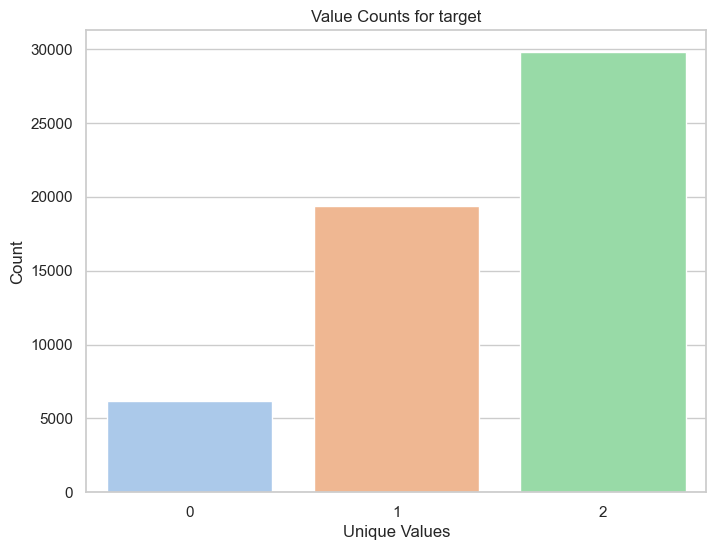

In [301]:
#plt.figure(figsize=(8, 6))
#sns.countplot(x = y_train_multiclass, palette='pastel')
#plt.title('Value Counts for target')
#plt.xlabel('Unique Values')
#plt.ylabel('Count')
#plt.show()

In [302]:
oversampler = SMOTE(random_state = 42)
X_train_res, y_train_res = oversampler.fit_resample(X_train_multiclass, y_train_multiclass)

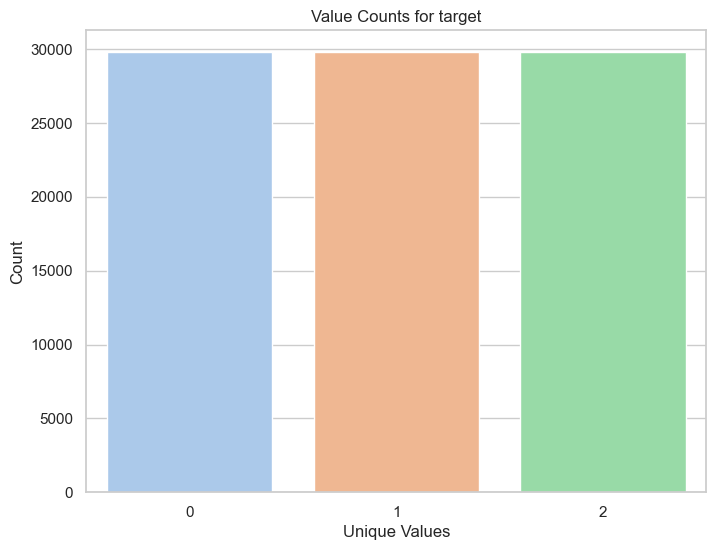

In [303]:
#plt.figure(figsize=(8, 6))
#sns.countplot(x = y_train_res, palette='pastel')
#plt.title('Value Counts for target')
#plt.xlabel('Unique Values')
#plt.ylabel('Count')
#plt.show()

### Functions

In [304]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(multilabel_confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(multilabel_confusion_matrix(y_val, pred_val))


In [305]:
def avg_score(model):
    
    skf = StratifiedKFold(n_splits=10)
     
    score_train = []
    score_val = []
    timer = []
    for train_index, val_index in skf.split(X_train_res,y_train_res):
        
        X_train_multiclass, X_val_multiclass = X_train_res.iloc[train_index], X_train_res.iloc[val_index]
        y_train_multiclass, y_val_multiclass = y_train_res.iloc[train_index], y_train_res.iloc[val_index]
        
        begin = time.perf_counter()
        
        model.fit(X_train_multiclass, y_train_multiclass)
       
        end = time.perf_counter()

        value_train = model.score(X_train_multiclass, y_train_multiclass)
        value_val = model.score(X_val_multiclass, y_val_multiclass)
  
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
    
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val)

In [306]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train_res.columns,  
                               class_names=["< 30 days", "No", "> 30 days"], 
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

In [307]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    for arg in args:
        time, avg_train, avg_test = avg_score(arg)
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

In [308]:
def return_results_DT(interval):
    skf = StratifiedKFold(n_splits= 10)
    avg_train_scores = []
    avg_val_scores = []
    for value in interval:
        model = DecisionTreeClassifier(max_depth = value)
        train_scores = []
        val_scores = []
        for train_index, val_index in skf.split(X_train_res, y_train_res):
            X_train_multiclass, X_val_multiclass = X_train_res.iloc[train_index], X_train_res.iloc[val_index]
            y_train_multiclass, y_val_multiclass = y_train_res.iloc[train_index], y_train_res.iloc[val_index]
            
            model.fit(X_train_multiclass, y_train_multiclass)
            
            train_scores.append(f1_score(y_train_multiclass, model.predict(X_train_multiclass), average = 'weighted'))
            val_scores.append(f1_score(y_val_multiclass, model.predict(X_val_multiclass), average = 'weighted'))

        avg_train_scores.append(round(np.mean(train_scores), 3))
        avg_val_scores.append(round(np.mean(val_scores), 3))
        
    print("The best train score is", str(max(avg_train_scores)), "with a depth of", str(avg_train_scores.index(max(avg_train_scores))+1))
    print("The best test score is", str(max(avg_val_scores)), "with a depth of", str(avg_val_scores.index(max(avg_val_scores))+1))

    plt.plot(interval, avg_train_scores, label = 'Train')
    plt.plot(interval, avg_val_scores, label = 'Validation')
    plt.legend()
    plt.xlabel("Depth")
    plt.ylabel("f1 score")
    plt.show()

In [309]:
def calculate_max_depth(num_leaves):
    max_depth = math.ceil(math.log2(num_leaves))
    return max_depth

In [310]:
def calculate_min_samples_split(total_samples, fraction=0.01):
    min_samples_split = round(fraction * total_samples)
    return min_samples_split

In [311]:
def return_results_RF(interval):
    skf = StratifiedKFold(n_splits= 10)
    avg_train_scores = []
    avg_val_scores = []
    for value in interval:
        model = RandomForestClassifier(max_depth = value)
        train_scores = []
        val_scores = []
        for train_index, val_index in skf.split(X_train_res, y_train_res):
            X_train_multiclass, X_val_multiclass = X_train_res.iloc[train_index], X_train_res.iloc[val_index]
            y_train_multiclass, y_val_multiclass = y_train_res.iloc[train_index], y_train_res.iloc[val_index]
            
            model.fit(X_train_multiclass, y_train_multiclass)
            
            train_scores.append(f1_score(y_train_multiclass, model.predict(X_train_multiclass), average = 'weighted'))
            val_scores.append(f1_score(y_val_multiclass, model.predict(X_val_multiclass), average = 'weighted'))

        avg_train_scores.append(round(np.mean(train_scores), 3))
        avg_val_scores.append(round(np.mean(val_scores), 3))
        
    print("The best train score is", str(max(avg_train_scores)), "with a depth of", str(avg_train_scores.index(max(avg_train_scores))+1))
    print("The best test score is", str(max(avg_val_scores)), "with a depth of", str(avg_val_scores.index(max(avg_val_scores))+1))

    plt.plot(interval, avg_train_scores, label = 'Train')
    plt.plot(interval, avg_val_scores, label = 'Validation')
    plt.legend()
    plt.xlabel("Depth")
    plt.ylabel("f1 score")
    plt.show()

In [312]:
def model_df_multiclass(model_list,scaled_X_val, y_val):
    model_str = [str(model) for model in model_list]
    model_str = [model.split('(', 1)[0] for model in model_str]
    model_name = [' '.join(re.findall('[A-Z][^A-Z]*', model)) for model in model_str]
    
    df = pd.DataFrame(columns = ['Model', 'F1-Score', 'Accuracy', 'Precision','Recall', 'Matthews'])

    for model in range(len(model_list)):
        print(model_list[model], 'is starting...')
        instance = model_list[model]
        y_pred = instance.predict(scaled_X_val)

        f1 = f1_score(y_val, y_pred, average = 'weighted')
        accuracy = balanced_accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average = 'weighted')
        recall = recall_score(y_val, y_pred, average = 'weighted')
        matthews = matthews_corrcoef(y_val, y_pred)

        df.loc[model] = [model_name[model], f1, accuracy, precision, recall, matthews]
        print(model_list[model], '...done')

    df.sort_values(by='F1-Score', ascending=False, inplace=True)
    df.set_index('Model', inplace = True)
    
    return df

Classification Problems to keep in mind when analysing models:
 - The confusion matrix
 - The accuracy Score
 - The precision
 - The recall
 - The F1 Score


### Benchmark Multiclass

In [313]:
#seed = 42

#DT_model = DecisionTreeClassifier(random_state=seed).fit(X_train_res, y_train_res)
#print('DT_model running...')
#RF_model = RandomForestClassifier(random_state=seed).fit(X_train_res, y_train_res)
#print('RF_model running...')
#LR_model = LogisticRegression(random_state=seed).fit(X_train_res, y_train_res)
#print('LR_model running...')
#KNN_model = KNeighborsClassifier().fit(X_train_res, y_train_res)
#print('KNN_model running...')
#Gaussian_model = GaussianNB().fit(X_train_res, y_train_res)
#print('Gaussian_model running...')
#NN_model = MLPClassifier(random_state=seed).fit(X_train_res, y_train_res)
#print('NN_model running...')
#SVC_model = SVC(cache_size = 1000, random_state=seed).fit(X_train_res, y_train_res)
#print('SVC_model running...')
#NuSVC_model = NuSVC(cache_size = 1000, random_state = seed).fit(X_train_res, y_train_res)
#print('NuSVC_model running...')

#estimators = [
#    ('LR', LogisticRegression(random_state = seed)), 
#    ('KNN', KNeighborsClassifier()),
#    ('Gaussian', GaussianNB()), 
#    ('NN', MLPClassifier(max_iter = 5000, random_state = seed))
#              ]
#print('V_model running')
#V_model = VotingClassifier(estimators, verbose = 4).fit(X_train_res, y_train_res)
#print('All models are done, double bamm!')

#models = [DT_model, RF_model, LR_model, KNN_model,Gaussian_model, 
#          NN_model, V_model, SVC_model, NuSVC_model]

DT_model running...
RF_model running...
LR_model running...
KNN_model running...
Gaussian_model running...
NN_model running...
SVC_model running...
NuSVC_model running...
V_model running
[Voting] ....................... (1 of 4) Processing LR, total=   0.4s
[Voting] ...................... (2 of 4) Processing KNN, total=   0.0s
[Voting] ................. (3 of 4) Processing Gaussian, total=   0.1s
[Voting] ....................... (4 of 4) Processing NN, total= 1.5min
All models are done, double bamm!


In [314]:
#base_model_multiclass = model_df_multiclass(models, X_val_multiclass, y_val_multiclass)
#base_model_multiclass

DecisionTreeClassifier(random_state=42) is starting...
DecisionTreeClassifier(random_state=42) ...done
RandomForestClassifier(random_state=42) is starting...
RandomForestClassifier(random_state=42) ...done
LogisticRegression(random_state=42) is starting...
LogisticRegression(random_state=42) ...done
KNeighborsClassifier() is starting...
KNeighborsClassifier() ...done
GaussianNB() is starting...
GaussianNB() ...done
MLPClassifier(random_state=42) is starting...
MLPClassifier(random_state=42) ...done
VotingClassifier(estimators=[('LR', LogisticRegression(random_state=42)),
                             ('KNN', KNeighborsClassifier()),
                             ('Gaussian', GaussianNB()),
                             ('NN',
                              MLPClassifier(max_iter=5000, random_state=42))],
                 verbose=4) is starting...
VotingClassifier(estimators=[('LR', LogisticRegression(random_state=42)),
                             ('KNN', KNeighborsClassifier()),
         

F1-Score  Accuracy  Precision    Recall  Matthews
Model                                                                      
Random Forest Classifier  0.552062  0.436137   0.551104  0.584573  0.228076
Nu S V C                  0.541311  0.440169   0.547784  0.562114  0.215866
S V C                     0.536116  0.441363   0.567090  0.579730  0.235598
M L P Classifier          0.531199  0.438080   0.551672  0.557061  0.210821
Logistic Regression       0.489016  0.420075   0.566793  0.566887  0.204621
K Neighbors Classifier    0.476900  0.411973   0.510717  0.456485  0.129418
Decision Tree Classifier  0.459925  0.376133   0.473808  0.449326  0.078969
Voting Classifier         0.455003  0.434269   0.557295  0.473610  0.166004
Gaussian N B              0.022406  0.333333   0.012453  0.111595  0.000000

### LogisticRegression

#### Default Model

In [315]:
#modelLR = LogisticRegression(max_iter=1000, random_state=42, multi_class = 'multinomial')

In [316]:
#modelLR.fit(X_train_res,y_train_res)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [317]:
#labels_train_LR = modelLR.predict(X_train_res)
#labels_val_LR = modelLR.predict(X_val_multiclass)

In [318]:
#metrics(y_train_res, labels_train_LR, y_val_multiclass, labels_val_LR)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.40      0.45     29782
           1       0.46      0.27      0.34     29782
           2       0.52      0.84      0.64     29782

    accuracy                           0.51     89346
   macro avg       0.50      0.51      0.48     89346
weighted avg       0.50      0.51      0.48     89346

[[[48403 11161]
  [17726 12056]]

 [[50158  9406]
  [21635  8147]]

 [[36087 23477]
  [ 4683 25099]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

#### Multiple Solver

In [319]:
#solver_values = ['lbfgs','saga','sag','newton-cg']
#results = {'solver': [], 'train_f1': [], 'val_f1': []}

#for solver in solver_values:
#    modelLR_tuned = LogisticRegression(random_state=42, solver = solver,  multi_class = 'multinomial')

#    modelLR_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, modelLR_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, modelLR_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['solver'].append(solver)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

      solver  train_f1    val_f1
0      lbfgs  0.479934  0.489016
1       saga  0.479957  0.488787
2        sag  0.479965  0.488787
3  newton-cg  0.479955  0.488787


#### Multiple Penalties

In [320]:
#penalty_values = ['l2',None]
#results = {'penalty': [], 'train_f1': [], 'val_f1': []}

#for penalty in penalty_values:
#    modelLR_tuned = LogisticRegression(random_state = 42, solver = 'newton-cg'  ,penalty = penalty,  multi_class = 'multinomial')

#    modelLR_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, modelLR_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, modelLR_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['penalty'].append(penalty)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

  penalty  train_f1    val_f1
0      l2  0.479955  0.488787
1    None  0.479969  0.488787


In [321]:
#modelLR = LogisticRegression(random_state = 42, solver = 'newton-cg', penalty = 'l2', multi_class = 'multinomial', max_iter = 1000)
#modelLR

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42,
                   solver='newton-cg')

In [322]:
#modelLR.fit(X_train_res, y_train_res)

#labels_train_LR = modelLR.predict(X_train_res)
#label_val_LR = modelLR.predict(X_val_multiclass)

#metrics(y_train_res, labels_train_LR, y_val_multiclass, label_val_LR)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.40      0.45     29782
           1       0.46      0.27      0.34     29782
           2       0.52      0.84      0.64     29782

    accuracy                           0.51     89346
   macro avg       0.50      0.51      0.48     89346
weighted avg       0.50      0.51      0.48     89346

[[[48403 11161]
  [17726 12056]]

 [[50157  9407]
  [21633  8149]]

 [[36089 23475]
  [ 4684 25098]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

### RandomForestClassifier

#### Default Model

In [323]:
#rf_classifier_mult = RandomForestClassifier(random_state=42)

In [324]:
#rf_classifier_mult.fit(X_train_res, y_train_res)

#labels_train_RF = rf_classifier_mult.predict(X_train_res)
#label_val_RF = rf_classifier_mult.predict(X_val_multiclass)

#metrics(y_train_res, labels_train_RF, y_val_multiclass, label_val_RF)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29782
           1       1.00      1.00      1.00     29782
           2       1.00      1.00      1.00     29782

    accuracy                           1.00     89346
   macro avg       1.00      1.00      1.00     89346
weighted avg       1.00      1.00      1.00     89346

[[[59564     0]
  [    0 29782]]

 [[59564     0]
  [    0 29782]]

 [[59564     0]
  [    0 29782]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

In [325]:
#results = {'train_f1': [], 'val_f1': []}

#rf_classifier_mult.fit(X_train_res, y_train_res)

#train_f1_tree = f1_score(y_train_res, rf_classifier_mult.predict(X_train_res), average = 'weighted')
#val_f1_tree = f1_score(y_val_multiclass, rf_classifier_mult.predict(X_val_multiclass), average = 'weighted')

#results['train_f1'].append(train_f1_tree)
#results['val_f1'].append(val_f1_tree)

#results_df = pd.DataFrame(results)
#print(results_df)

   train_f1    val_f1
0       1.0  0.552062


#### Multiple Depth Values

The best train score is 0.945 with a depth of 19
The best test score is 0.722 with a depth of 19


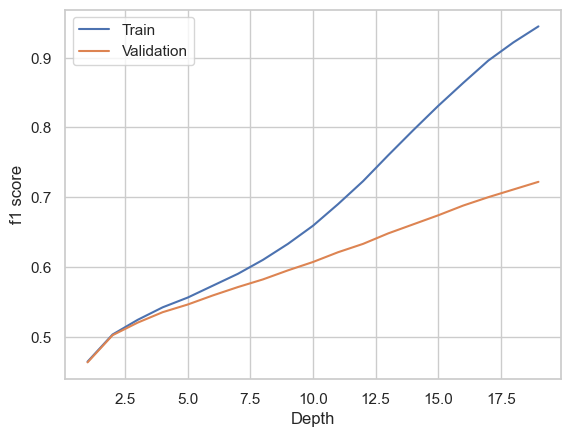

In [326]:
#interval = np.arange(1, 20)

#return_results_RF(interval)

In [327]:
#max_depth_values = [5, 10, 15, 19, 20, 25]
#results = {'max_depth': [], 'train_f1': [], 'val_f1': []}

#for max_depth in max_depth_values:
#    rf_classifier_tuned = RandomForestClassifier(random_state=42, max_depth = max_depth)

#    rf_classifier_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, rf_classifier_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, rf_classifier_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['max_depth'].append(max_depth)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

   max_depth  train_f1    val_f1
0          5  0.555278  0.541591
1         10  0.656573  0.551991
2         15  0.826002  0.553052
3         19  0.939424  0.553554
4         20  0.959954  0.552003
5         25  0.997361  0.552425


#### Multiple Criterion

In [328]:
#criterion_values = ['gini', 'entropy', 'log_loss']
#results = {'criterion': [], 'train_f1': [], 'val_f1': []}

#for criterion in criterion_values:
#    rf_classifier_tuned = RandomForestClassifier(random_state=42, criterion = criterion)

#    rf_classifier_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, rf_classifier_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, rf_classifier_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['criterion'].append(criterion)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

  criterion  train_f1    val_f1
0      gini       1.0  0.552062
1   entropy       1.0  0.548310
2  log_loss       1.0  0.548310


#### Multiple Split

In [329]:
#total_samples = len(X_train_res) 
#min_samples_split = calculate_min_samples_split(total_samples)

#print("The recommended min_samples_split is", min_samples_split)

The recommended min_samples_split is 893


In [330]:
#split_values = [100, 200, 500, 800, 893, 1000]
#results = {'split': [], 'train_f1': [], 'val_f1': []}

#for split in split_values:
#    rf_classifier_tuned = RandomForestClassifier(random_state=42, min_samples_split = split)

#    rf_classifier_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, rf_classifier_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, rf_classifier_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['split'].append(split)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

   split  train_f1    val_f1
0    100  0.731374  0.557278
1    200  0.683348  0.552673
2    500  0.639405  0.553033
3    800  0.621618  0.550164
4    893  0.616630  0.554230
5   1000  0.610506  0.549338


#### Multiple Leaf Node

In [331]:
#leaf_values = [50, 100, 200, 500, 800, 1000]
#results = {'leaf': [], 'train_f1': [], 'val_f1': []}

#for leaf in leaf_values:
#    rf_classifier_tuned = RandomForestClassifier(random_state=42, min_samples_leaf = leaf)

#    rf_classifier_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, rf_classifier_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, rf_classifier_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['leaf'].append(leaf)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

   leaf  train_f1    val_f1
0    50  0.683116  0.554303
1   100  0.644912  0.549784
2   200  0.613750  0.549595
3   500  0.576483  0.541774
4   800  0.562985  0.538824
5  1000  0.556446  0.541218


#### Multiple Max Features

In [332]:
#max_features = [50, 100, 200, 500, 800, 1000, 'sqrt', 'log2',None]
#results = {'features': [], 'train_f1': [], 'val_f1': []}

#for features in max_features:
#    rf_classifier_tuned = RandomForestClassifier(random_state=42, max_features = features)

#    rf_classifier_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, rf_classifier_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, rf_classifier_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['features'].append(features)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

  features  train_f1    val_f1
0       50       1.0  0.535962
1      100       1.0  0.535962
2      200       1.0  0.535962
3      500       1.0  0.535962
4      800       1.0  0.535962
5     1000       1.0  0.535962
6     sqrt       1.0  0.552062
7     log2       1.0  0.552062
8     None       1.0  0.535962


#### Multiple Leaf Nodes

In [333]:
#max_nodes = [50, 100, 200, 500, 800, 1000]
#results = {'leaf nodes': [], 'train_f1': [], 'val_f1': []}

#for nodes in max_nodes:
#    rf_classifier_tuned = RandomForestClassifier(random_state=42, max_leaf_nodes = nodes)

#    rf_classifier_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, rf_classifier_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, rf_classifier_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['leaf nodes'].append(nodes)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

   leaf nodes  train_f1    val_f1
0          50  0.583609  0.544338
1         100  0.610438  0.552111
2         200  0.639697  0.554140
3         500  0.684260  0.553356
4         800  0.714746  0.556319
5        1000  0.731304  0.555341


#### Multiple Estimators

In [334]:
#n_estimators = [50, 100, 200, 500, 800, 1000]
#results = {'estimators': [], 'train_f1': [], 'val_f1': []}

#for n in n_estimators:
#    rf_classifier_tuned = RandomForestClassifier(random_state=42, n_estimators = n)

#    rf_classifier_tuned.fit(X_train_res, y_train_res)

#    train_f1_tree = f1_score(y_train_res, rf_classifier_tuned.predict(X_train_res), average = 'weighted')

#    val_f1_tree = f1_score(y_val_multiclass, rf_classifier_tuned.predict(X_val_multiclass), average = 'weighted')
    
#    results['estimators'].append(n)
#    results['train_f1'].append(train_f1_tree)
#    results['val_f1'].append(val_f1_tree)
    
#results_df = pd.DataFrame(results)
#print(results_df)

   estimators  train_f1    val_f1
0          50  0.999955  0.547702
1         100  1.000000  0.552062
2         200  1.000000  0.553785
3         500  1.000000  0.556427
4         800  1.000000  0.556355
5        1000  1.000000  0.555937


#### Grid Search

In [335]:
'''
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 15, 20, 30],
    'n_estimators': [10, 100, 150, 200],
    'max_leaf_nodes':[10, 20, 30, 100, 200]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, scoring='f1_weighted', cv=2)

grid_search.fit(X_train_res, y_train_res)

print("Best Parameters: ", grid_search.best_params_)
print("Best Train F1 Score: ", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

val_f1_tree = f1_score(y_val_multiclass, best_rf_model.predict(X_val_multiclass), average='micro')
print("Validation F1 Score: ", val_f1_tree)
'''

'\nparam_grid = {\n    \'criterion\': [\'gini\', \'entropy\', \'log_loss\'],\n    \'max_depth\': [10, 15, 20, 30],\n    \'n_estimators\': [10, 100, 150, 200],\n    \'max_leaf_nodes\':[10, 20, 30, 100, 200]\n}\n\nrf_classifier = RandomForestClassifier(random_state=42)\n\ngrid_search = GridSearchCV(rf_classifier, param_grid, scoring=\'f1_weighted\', cv=2)\n\ngrid_search.fit(X_train_res, y_train_res)\n\nprint("Best Parameters: ", grid_search.best_params_)\nprint("Best Train F1 Score: ", grid_search.best_score_)\n\nbest_rf_model = grid_search.best_estimator_\n\nval_f1_tree = f1_score(y_val_multiclass, best_rf_model.predict(X_val_multiclass), average=\'micro\')\nprint("Validation F1 Score: ", val_f1_tree)\n'

#### 6.2.2.5. Optimized Model

In [336]:
results = {'train_f1': [], 'val_f1': []}
rf_classifier_mult = RandomForestClassifier(random_state=42, criterion = 'gini', max_depth = 15,
                                       max_features = 'sqrt', max_leaf_nodes = 200, n_estimators = 200,
                                      min_samples_split = 200, min_samples_leaf = 100)


rf_classifier_mult.fit(X_train_res, y_train_res)

train_f1_tree = f1_score(y_train_res, rf_classifier_mult.predict(X_train_res), average = 'weighted')
val_f1_tree = f1_score(y_val_multiclass, rf_classifier_mult.predict(X_val_multiclass), average = 'weighted')

results['train_f1'].append(train_f1_tree)
results['val_f1'].append(val_f1_tree)

results_df = pd.DataFrame(results)
print(results_df)

   train_f1    val_f1
0  0.630327  0.550303


In [337]:
#feature_scores = pd.Series(rf_classifier_mult.feature_importances_, 
#                           index=X_train_multiclass.columns).sort_values(ascending=False)
#feature_scores

number_of_visits                     0.439894
total_visits_in_previous_year        0.117811
discharge_disposition                0.105332
inpatient_visits_in_previous_year    0.091173
number_diagnoses                     0.052093
medication                           0.043763
age                                  0.030602
additional_diagnosis                 0.021866
admission_source                     0.017650
number_of_medications                0.016126
secondary_diagnosis                  0.012889
primary_diagnosis                    0.011662
procedure_diagnoses_ratio            0.010530
procedures_per_day_of_stay           0.008830
medication_per_day_of_stay           0.008255
average_pulse_bpm                    0.007024
a1c_test_result                      0.004375
glucose_test_result                  0.000124
dtype: float64

In [338]:
#X_train_multi_opt = X_train_res.drop(['glucose_test_result','a1c_test_result','age','admission_source','discharge_disposition',
#                                      'number_diagnoses','medication'], axis=1)

#X_val_multi_opt = X_val_multiclass.drop(['glucose_test_result','a1c_test_result','age','admission_source',
#                                         'discharge_disposition','number_diagnoses','medication'], axis=1)

In [339]:
#results = {'train_f1': [], 'val_f1': []}
#rf_classifier_mult = RandomForestClassifier(random_state=42, criterion = 'gini', max_depth = 15,
#                                       max_features = 'sqrt', max_leaf_nodes = 200, n_estimators = 200,
#                                      min_samples_split = 200, min_samples_leaf = 100)

#rf_classifier_mult.fit(X_train_multi_opt, y_train_res)

#train_f1_tree = f1_score(y_train_res, rf_classifier_mult.predict(X_train_multi_opt), average = 'weighted')
#val_f1_tree = f1_score(y_val_multiclass, rf_classifier_mult.predict(X_val_multi_opt), average = 'weighted')

#results['train_f1'].append(train_f1_tree)
#results['val_f1'].append(val_f1_tree)

#results_df = pd.DataFrame(results)
#print(results_df)

   train_f1    val_f1
0  0.603881  0.520721


If we remove the non importat features the model wont perform so well

In [340]:
#rf_classifier_mult.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42)

In [341]:
#labels_train_rf_final = rf_classifier_mult.predict(X_train_res)
#labels_val_rf_final = rf_classifier_mult.predict(X_val_multiclass)

In [342]:
#metrics(y_train_res, labels_train_rf_final, y_val_multiclass, labels_val_rf_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.71      0.70     29782
           1       0.59      0.39      0.47     29782
           2       0.64      0.84      0.72     29782

    accuracy                           0.64     89346
   macro avg       0.64      0.64      0.63     89346
weighted avg       0.64      0.64      0.63     89346

[[[49927  9637]
  [ 8667 21115]]

 [[51624  7940]
  [18195 11587]]

 [[45399 14165]
  [ 4880 24902]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

### SVC

In [343]:
#results = {'train_f1': [], 'val_f1': []} 
#svc_poly = SVC(kernel='poly', degree=3, C=1, cache_size = 1000, random_state=42)

#svc_poly.fit(X_train_res, y_train_res)

#train_f1_poly = f1_score(y_train_res, svc_poly.predict(X_train_res), average='weighted')
#val_f1_poly = f1_score(y_val_multiclass, svc_poly.predict(X_val_multiclass), average='weighted')

#results['train_f1'].append(train_f1_poly)
#results['val_f1'].append(val_f1_poly)

#results_df = pd.DataFrame(results)
#print(results_df)

   train_f1    val_f1
0  0.506308  0.483254


In [344]:
#results = {'train_f1': [], 'val_f1': []} 
#svc_rbf = SVC(kernel='rbf', gamma=0.5, C=0.1, cache_size = 1000, random_state=42)

#svc_rbf.fit(X_train_res, y_train_res)

#train_f1_rbf = f1_score(y_train_res, svc_rbf.predict(X_train_res), average='weighted')
#val_f1_rbf = f1_score(y_val_multiclass, svc_rbf.predict(X_val_multiclass), average='weighted')

#results['train_f1'].append(train_f1_rbf)
#results['val_f1'].append(val_f1_rbf)

#results_df = pd.DataFrame(results)
#print(results_df)

   train_f1    val_f1
0  0.663886  0.553711


### NuSVC

In [345]:
#results = {'train_f1': [], 'val_f1': []} 
#nusvc = NuSVC(cache_size = 1000, random_state = 42)

#nusvc.fit(X_train_res, y_train_res)

#train_f1_svm = f1_score(y_train_res, nusvc.predict(X_train_res), average='weighted')
#val_f1_svm = f1_score(y_val_multiclass, nusvc.predict(X_val_multiclass), average='weighted')

#results['train_f1'].append(train_f1_svm)
#results['val_f1'].append(val_f1_svm)

#results_df = pd.DataFrame(results)
#print(results_df)

   train_f1    val_f1
0  0.704708  0.541311


### Gaussian Naive Bayes

In [346]:
#model_NB = GaussianNB()

In [347]:
#model_NB.fit(X_train_res, y_train_res)

GaussianNB()

In [348]:
#labels_train_NB = model_NB.predict(X_train_res)
#labels_val_NB = model_NB.predict(X_val_multiclass)

In [349]:
#model_NB.score(X_train_res, y_train_res)

0.3333333333333333

In [350]:
#model_NB.score(X_val_multiclass, y_val_multiclass)

0.11159460976979226

In [351]:
#metrics(y_train_res, labels_train_NB, y_val_multiclass, labels_val_NB)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      1.00      0.50     29782
           1       0.00      0.00      0.00     29782
           2       0.00      0.00      0.00     29782

    accuracy                           0.33     89346
   macro avg       0.11      0.33      0.17     89346
weighted avg       0.11      0.33      0.17     89346

[[[    0 59564]
  [    0 29782]]

 [[59564     0]
  [29782     0]]

 [[59564     0]
  [29782     0]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

### Instance Based Learning (KNN Classifier)

##### Number of neighbours = 5

In [352]:
#model_KNN = KNeighborsClassifier(algorithm='kd_tree')

In [353]:
#model_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(algorithm='kd_tree')

In [354]:
#labels_train_KNN = model_KNN.predict(X_train_res)
#labels_val_KNN = model_KNN.predict(X_val_multiclass)

In [355]:
#print("The mean accuracy in train is", model_KNN.score(X_train_res, y_train_res))
#print("The mean accuracy in validation is", model_KNN.score(X_val_multiclass, y_val_multiclass))

The mean accuracy in train is 0.8093143509502384
The mean accuracy in validation is 0.45648512071869735


In [356]:
#metrics(y_train_res, labels_train_KNN, y_val_multiclass, labels_val_KNN)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.99      0.87     29782
           1       0.81      0.77      0.79     29782
           2       0.87      0.67      0.75     29782

    accuracy                           0.81     89346
   macro avg       0.82      0.81      0.80     89346
weighted avg       0.82      0.81      0.80     89346

[[[50804  8760]
  [  160 29622]]

 [[54194  5370]
  [ 6904 22878]]

 [[56657  2907]
  [ 9973 19809]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

##### Number of neighbours = 28

In [357]:
#numberK_list = np.arange(1,30)

#high_score = 0                  
#neighbors_num = 0

#score_list_train = []
#score_list_val = []

#for n in numberK_list: 
#    model = KNeighborsClassifier(n_neighbors = n, algorithm='kd_tree').fit(X_train_res, y_train_res)
    
#    score_train = model.score(X_train_res, y_train_res)
#    score_val = model.score(X_val_multiclass, y_val_multiclass)
    
#    score_list_train.append(score_train)
#    score_list_val.append(score_val)

#    if (score_val > high_score):
#        high_score = score_val
#        neighbors_num = numberK_list[n - 1]


#print("The best number of neighbors is", neighbors_num)  
#print("Mean accuracy in train with", neighbors_num," neighbors is",  score_list_train[neighbors_num - 1])
#print("Mean accuracy in validation with",  neighbors_num," neighbors is", high_score)

The best number of neighbors is 1
Mean accuracy in train with 1  neighbors is 1.0
Mean accuracy in validation with 1  neighbors is 0.4843486805165637


We will choose the default, which is Euclidean distance. Manhattann distance is only preferable for high dimensional data
(number of features > observations), which is not our case, so we won't use this metric

In [358]:
#model_KNNT = KNeighborsClassifier(n_neighbors=28, algorithm='kd_tree').fit(X_train_res, y_train_res) 

In [359]:
#labels_train_KNNT = model_KNNT.predict(X_train_res)
#labels_val_KNNT = model_KNNT.predict(X_val_multiclass)

In [360]:
#print("The mean accuracy in train is", model_KNNT.score(X_train_res, y_train_res))
#print("The mean accuracy in validation is", model_KNNT.score(X_val_multiclass, y_val_multiclass))

The mean accuracy in train is 0.6474828196002059
The mean accuracy in validation is 0.4807692307692308


In [361]:
#metrics(y_train_res, labels_train_KNNT, y_val_multiclass, labels_val_KNNT)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.87      0.72     29782
           1       0.66      0.43      0.52     29782
           2       0.69      0.64      0.66     29782

    accuracy                           0.65     89346
   macro avg       0.66      0.65      0.64     89346
weighted avg       0.66      0.65      0.64     89346

[[[43045 16519]
  [ 3780 26002]]

 [[53066  6498]
  [16973 12809]]

 [[51085  8479]
  [10743 19039]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

### 6.2.7. Classification Trees

In [365]:
#dt = DecisionTreeClassifier(random_state = 42)

In [366]:
#dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [367]:
#y_pred_train = dt.predict(X_train_res)
#y_pred_val = dt.predict(X_val_multiclass)

In [368]:
#print('The defined tree has a depth of ' + str(dt.get_depth()) + ', ' + str(dt.tree_.node_count) + 
#      ' nodes and a total of ' + str(dt.get_n_leaves()) + ' leaves.')

The defined tree has a depth of 43, 38135 nodes and a total of 19068 leaves.


#### Choosing a criterion

In [369]:
#dt_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state = 42).fit(X_train_res, y_train_res)

In [370]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Gini','Entropy'])
#show_results(df,dt, dt_entropy)

Time      Train    Validation
Gini     0.834+/-0.01  1.0+/-0.0  0.625+/-0.06
Entropy  1.081+/-0.02  1.0+/-0.0  0.631+/-0.06

#### Choosing a splitter

In [371]:
#dt_random = DecisionTreeClassifier(splitter = 'random',random_state = 42).fit(X_train_res, y_train_res)

In [372]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['best','random'])
#show_results(df,dt, dt_random)

Time      Train    Validation
best    0.833+/-0.01  1.0+/-0.0  0.625+/-0.06
random   0.197+/-0.0  1.0+/-0.0  0.638+/-0.04

#### Choosing the max_depth of the tree

The best train score is 0.711 with a depth of 14
The best test score is 0.604 with a depth of 14


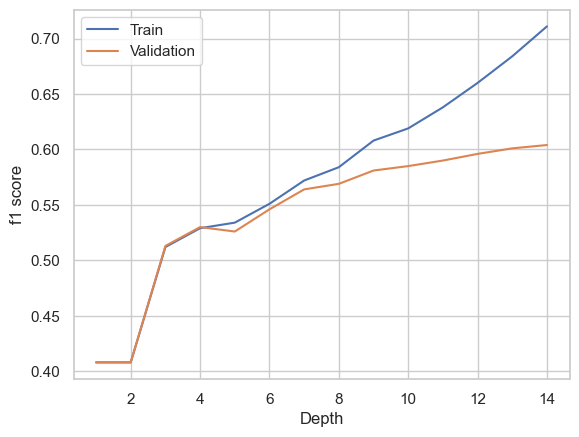

In [373]:
#interval = np.arange(1, 15)

#return_results_DT(interval)

In [374]:
#num_leaves = 2000
#max_depth = calculate_max_depth(num_leaves)

#print("The recommended maximum depth for the decision tree is", max_depth)

The recommended maximum depth for the decision tree is 11


In [375]:
#dt_depth2 = DecisionTreeClassifier(max_depth = 2,random_state = 42).fit(X_train_res, y_train_res)

In [376]:
#dt_depth4 = DecisionTreeClassifier(max_depth = 4,random_state = 42).fit(X_train_res, y_train_res)

In [377]:
#dt_depth15 = DecisionTreeClassifier(max_depth = 15,random_state = 42).fit(X_train_res, y_train_res)

In [378]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['full','depth2', 'depth4', 'depth15'])
#show_results(df,dt, dt_depth2, dt_depth4, dt_depth15)

Time         Train    Validation
full     0.833+/-0.01     1.0+/-0.0  0.625+/-0.06
depth2    0.102+/-0.0   0.512+/-0.0  0.512+/-0.01
depth4    0.194+/-0.0   0.547+/-0.0  0.547+/-0.02
depth15  0.637+/-0.01  0.744+/-0.01  0.617+/-0.05

#### Choosing the minimum number of samples required to split an internal node

In [379]:
#total_samples = len(X_train_res)
#min_samples_split = calculate_min_samples_split(total_samples)

#print("The recommended min_samples_split is", min_samples_split)

The recommended min_samples_split is 893


In [380]:
#dt_min200 = DecisionTreeClassifier(min_samples_split = 200, random_state = 42).fit(X_train_res, y_train_res)

#dt_min700 = DecisionTreeClassifier(min_samples_split = 700, random_state = 42).fit(X_train_res, y_train_res)

#dt_min529 = DecisionTreeClassifier(min_samples_split = 529, random_state = 42).fit(X_train_res, y_train_res)

#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['dt_min200','dt_min700', 'dt_min529'])
#show_results(df, dt_min200, dt_min700, dt_min529)

Time         Train    Validation
dt_min200   0.61+/-0.02  0.666+/-0.01  0.612+/-0.05
dt_min700  0.481+/-0.02  0.626+/-0.01  0.607+/-0.05
dt_min529  0.508+/-0.01  0.634+/-0.01  0.609+/-0.06

#### Choosing the minimum number of samples required to be at a leaf node

In [381]:
#dt_min_sam100 = DecisionTreeClassifier(min_samples_leaf = 100, random_state = 42).fit(X_train_res, y_train_res)

#dt_min_sam500 = DecisionTreeClassifier(min_samples_leaf = 500, random_state = 42).fit(X_train_res, y_train_res)

#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Original','dt_min_sam100','dt_min_sam500'])
#show_results(df,dt, dt_min_sam100, dt_min_sam500)

Time         Train    Validation
Original        0.83+/-0.01     1.0+/-0.0  0.625+/-0.06
dt_min_sam100  0.509+/-0.01  0.639+/-0.01  0.605+/-0.05
dt_min_sam500  0.371+/-0.01  0.592+/-0.01  0.581+/-0.04

#### Changing the number of features to consider when looking for the best split

In [382]:
#dt_none = DecisionTreeClassifier(max_features = None, random_state = 42).fit(X_train_res, y_train_res)
#dt_int = DecisionTreeClassifier(max_features = 2, random_state = 42).fit(X_train_res, y_train_res)
#dt_float = DecisionTreeClassifier(max_features = 0.5, random_state = 42).fit(X_train_res, y_train_res)
#dt_auto = DecisionTreeClassifier(max_features = 'sqrt', random_state = 42).fit(X_train_res, y_train_res)
#dt_log2 = DecisionTreeClassifier(max_features = 'log2', random_state = 42).fit(X_train_res, y_train_res)

In [383]:
#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['None (Baseline)','Int','Float','Auto','Log2'])
#show_results(df,dt_none, dt_int, dt_float, dt_auto, dt_log2)  

Time      Train          Test
None (Baseline)  0.837+/-0.01  1.0+/-0.0  0.625+/-0.06
Int               0.133+/-0.0  1.0+/-0.0  0.609+/-0.04
Float            0.434+/-0.01  1.0+/-0.0  0.625+/-0.06
Auto              0.221+/-0.0  1.0+/-0.0   0.62+/-0.05
Log2              0.221+/-0.0  1.0+/-0.0   0.62+/-0.05

#### Define the total number of leaf nodes

In [384]:
#dt_maxleaf5 = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 42).fit(X_train_res, y_train_res)

#dt_maxleaf2000 = DecisionTreeClassifier(max_leaf_nodes = 2000, random_state = 42).fit(X_train_res, y_train_res)


#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Baseline','dt_maxleaf5', 'dt_maxleaf2000'])
#show_results(df,dt, dt_maxleaf5, dt_maxleaf2000)

Time         Train    Validation
Baseline        0.847+/-0.04     1.0+/-0.0  0.625+/-0.06
dt_maxleaf5      0.15+/-0.01   0.527+/-0.0  0.526+/-0.02
dt_maxleaf2000   0.66+/-0.02  0.744+/-0.01  0.637+/-0.06

#### Decide if a node will be split according to the decrease of impurity

In [385]:
#dt_impurity02 = DecisionTreeClassifier(min_impurity_decrease=0.05, random_state = 42).fit(X_train_res, y_train_res)

#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Baseline','dt_impurity02'])
#show_results(df,dt, dt_impurity02)

Time        Train    Validation
Baseline       0.838+/-0.01    1.0+/-0.0  0.625+/-0.06
dt_impurity02   0.103+/-0.0  0.512+/-0.0  0.512+/-0.01

#### Decision tree model to use:

In [386]:
#dt_final = DecisionTreeClassifier(max_depth = 4, min_samples_split =529, random_state = 42).fit(X_train_res, y_train_res)

#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Baseline','Final'])
#show_results(df,dt, dt_final)

Time        Train    Validation
Baseline  0.834+/-0.01    1.0+/-0.0  0.625+/-0.06
Final      0.195+/-0.0  0.547+/-0.0  0.547+/-0.02

In [387]:
#labels_train_dt = dt_final.predict(X_train_res)
#labels_val_dt = dt_final.predict(X_val_multiclass)

In [388]:
#metrics(y_train_res, labels_train_dt, y_val_multiclass, labels_val_dt)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.43      0.50     29782
           1       0.44      0.40      0.42     29782
           2       0.59      0.82      0.69     29782

    accuracy                           0.55     89346
   macro avg       0.54      0.55      0.54     89346
weighted avg       0.54      0.55      0.54     89346

[[[50964  8600]
  [16950 12832]]

 [[44559 15005]
  [17982 11800]]

 [[42845 16719]
  [ 5392 24390]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

In [389]:
#plot_tree(dt_final)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Final Model

In [390]:
#seed = 42

#DT_model = DecisionTreeClassifier(max_depth = 4, min_samples_split =529, random_state = seed).fit(X_train_res, y_train_res)
#print('DT_model running...')

#RF_model = RandomForestClassifier(random_state = seed, criterion = 'gini', max_depth = 15,
#                                       max_features = 'sqrt', max_leaf_nodes = 200, n_estimators = 200,
#                                      min_samples_split = 200, min_samples_leaf = 100).fit(X_train_res, y_train_res)
#print('RF_model running...')

#LR_model = LogisticRegression(random_state = 42, solver = 'newton-cg', penalty = 'l2', multi_class = 'multinomial', 
#                              max_iter = 1000).fit(X_train_res, y_train_res)
#print('LR_model running...')

#KNN_model = KNeighborsClassifier(n_neighbors=28, algorithm='kd_tree').fit(X_train_res, y_train_res)
#print('KNN_model running...')

#Gaussian_model = GaussianNB().fit(X_train_res, y_train_res)
#print('Gaussian_model running...')

#NN_model = MLPClassifier(max_iter=1000,alpha=0.0001, early_stopping=False, hidden_layer_sizes=(15,15,15), 
#                         learning_rate='constant', learning_rate_init=0.05, power_t=0.25, 
#                         solver='adam').fit(X_train_res, y_train_res)
#print('NN_model running...')

#SVC_model = SVC(kernel='rbf', gamma=0.5, C=0.1, cache_size = 1000, random_state=seed).fit(X_train_res, y_train_res)
#print('SVC_model running...')

#NuSVC_model = NuSVC(cache_size = 1000, random_state = seed).fit(X_train_res, y_train_res)
#print('NuSVC_model running...')

#estimators = [
#    ('LR', LogisticRegression(random_state = 42, solver = 'newton-cg', penalty = 'l2', multi_class = 'multinomial', 
#                              max_iter = 1000)), 
#    ('KNN', KNeighborsClassifier(n_neighbors=28, algorithm='kd_tree')),
#    ('Gaussian', GaussianNB()), 
#    ('NN', MLPClassifier(max_iter=1000,alpha=0.0001, early_stopping=False, hidden_layer_sizes=(15,15,15), 
#                         learning_rate='constant', learning_rate_init=0.05, power_t=0.25, 
#                         solver='adam'))
#              ]
#print('V_model running')
#V_model = VotingClassifier(estimators, verbose = 4).fit(X_train_res, y_train_res)
#print('All models are done, double bamm!')

#models = [DT_model, RF_model, LR_model, KNN_model,Gaussian_model, 
#          NN_model, SVC_model, NuSVC_model ,V_model]

DT_model running...
RF_model running...
LR_model running...
KNN_model running...
Gaussian_model running...
NN_model running...
SVC_model running...
NuSVC_model running...
V_model running
[Voting] ....................... (1 of 4) Processing LR, total=   1.5s
[Voting] ...................... (2 of 4) Processing KNN, total=   0.2s
[Voting] ................. (3 of 4) Processing Gaussian, total=   0.1s
[Voting] ....................... (4 of 4) Processing NN, total=   3.0s
All models are done, double bamm!


In [391]:
#tuned_model_multiclass = model_df_multiclass(models, X_val_multiclass, y_val_multiclass)
#tuned_model_multiclass

DecisionTreeClassifier(max_depth=4, min_samples_split=529, random_state=42) is starting...
DecisionTreeClassifier(max_depth=4, min_samples_split=529, random_state=42) ...done
RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42) is starting...
RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42) ...done
LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42,
                   solver='newton-cg') is starting...
LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42,
                   solver='newton-cg') ...done
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=28) is starting...
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=28) ...done
GaussianNB() is starting...
GaussianNB()

F1-Score  Accuracy  Precision    Recall  Matthews
Model                                                                      
S V C                     0.553711  0.436359   0.547074  0.576642  0.224847
Random Forest Classifier  0.550303  0.453358   0.564927  0.583871  0.243257
Nu S V C                  0.541311  0.440169   0.547784  0.562114  0.215866
Decision Tree Classifier  0.527009  0.425459   0.563745  0.576081  0.222115
K Neighbors Classifier    0.496675  0.435450   0.535928  0.480769  0.168090
Logistic Regression       0.488787  0.419941   0.566476  0.566746  0.204365
Voting Classifier         0.412440  0.433665   0.544776  0.463714  0.158686
M L P Classifier          0.409132  0.433371   0.359714  0.486595  0.166558
Gaussian N B              0.022406  0.333333   0.012453  0.111595  0.000000

In [392]:
rf_classifier_mult.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=15, max_leaf_nodes=200, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=42)

In [393]:
labels_train_rf_final = rf_classifier_mult.predict(X_train_res)
labels_val_rf_final = rf_classifier_mult.predict(X_val_multiclass)

In [394]:
metrics(y_train_res, labels_train_rf_final, y_val_multiclass, labels_val_rf_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.71      0.70     29782
           1       0.59      0.39      0.47     29782
           2       0.64      0.84      0.72     29782

    accuracy                           0.64     89346
   macro avg       0.64      0.64      0.63     89346
weighted avg       0.64      0.64      0.63     89346

[[[49927  9637]
  [ 8667 21115]]

 [[51624  7940]
  [18195 11587]]

 [[45399 14165]
  [ 4880 24902]]]
___________________________________________________________________________________________________________
                                                VALIDATION                           

# Exporting results and model aplication

## Exporting to Kaggle (binary)

In [395]:
final_test = rf_classifier.predict(test)
final_labels_test_list = final_test.tolist()
final_labels_test_list = ['No' if x == 0.0 else 'Yes' if x == 1.0 else x for x in final_labels_test_list]

submission = pd.read_csv("sample_submission.csv", index_col = "encounter_id")
submission["readmitted_binary"] = final_labels_test_list
submission.to_csv("final_predictions_kaggle.csv", index = "encounter_id")

## Binary Prediction

In [401]:
test_bin = rf_classifier.predict(test)
labels_test_list_bin = test_bin.tolist()
labels_test_list_bin = ['No' if x == 0.0 else 'Yes' if x == 1.0 else x for x in labels_test_list_bin]

submission = pd.read_csv("sample_submission.csv", index_col = "encounter_id")
submission["readmitted_binary"] = labels_test_list_bin
submission.to_csv("final_predictions_Binary.csv", index = "encounter_id")

## Multiclass Prediction

In [411]:
test_mult = rf_classifier_mult.predict(test)
labels_test_list_mult = test_mult.tolist()
labels_test_list_mult = ['<30 Days' if x == 0.0 else '>30 Days' if x == 1.0 else 'No' if x == 2.0 else x for x in labels_test_list_mult]

submission = pd.read_csv("sample_submission.csv", index_col = "encounter_id")
submission["readmitted_binary"] = labels_test_list_mult
submission.to_csv("final_predictions_Multiclass.csv", index = "encounter_id")